# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries


### Not needed for Google Colab

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

### Basic Imports

In [3]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### imblearn pacakage

The imblearn package, short for **imbalanced-learn**, is a Python package designed to handle imbalanced datasets. It provides tools to deal with imbalanced data, which is a common issue in many real-world machine learning tasks where the number of instances in different classes is not equally distributed.

**Key Features:**

1. Resampling Techniques:
- Over-sampling: Increasing the number of instances in the minority class.
  - SMOTE (Synthetic Minority Over-sampling Technique): Generates synthetic samples for the minority class.
  - ADASYN (Adaptive Synthetic Sampling): Similar to SMOTE but focuses on harder-to-learn instances.
- Under-sampling: Reducing the number of instances in the majority class.
  - Random Under-sampling: Randomly removes samples from the majority class.
  - Tomek Links: Removes samples from the majority class that are closest to the minority class.
  - Combination: Combines over-sampling and under-sampling techniques to balance the dataset.

2. Ensemble Methods:

- BalancedBaggingClassifier: A bagging classifier that incorporates sampling to balance each bootstrap sample.
- BalancedRandomForestClassifier: A random forest classifier that balances each bootstrap sample.

In [4]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier

### SimpleImputer



- The **SimpleImputer class from the sklearn** impute module in scikit-learn is used to **handle missing values in a dataset**. It provides basic strategies for imputing missing values, such as replacing them with the mean, median, most frequent value, or a constant value.

In [5]:
from sklearn.impute import SimpleImputer

### StratifiedkFold


- StratifiedKFold: A cross-validator that splits the dataset into k folds while preserving the class distribution in each fold.
- cross_val_score: A utility that automates cross-validation, returning evaluation metrics for each fold, and is often used to evaluate the performance of a model.

Both tools are essential for evaluating the performance of machine learning models in a robust and reliable manner, ensuring that the model is not overfitting and that the evaluation is representative of the entire dataset.

### Difference between stratify & StratifiedkFold
- train_test_split with stratify: Ensures a single stratified split of the dataset into training and testing sets.
- StratifiedKFold: Ensures stratified splits for k-fold cross-validation, allowing for a more comprehensive evaluation of model performance.

In [6]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

### Other Package Imports to be used

In [7]:
# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)


# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV # RandomizedSearchCV tests a fixed number of random parameter combinations, making it faster than an exhaustive grid search.

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
#pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

## Mount Google Drive

In [10]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [11]:
import os
os.chdir('/content/drive/MyDrive/GL-Projects/Project3-Ensemble-TheraBank/')
os.listdir()

['BankChurners.csv',
 'AML_Project_LearnerNotebook_FullCode.ipynb',
 'SM-AML_Project_LearnerNotebook_FullCode.ipynb',
 'V2-SM-AML_Project_LearnerNotebook_FullCode.html',
 'V2-SM-AML_Project_LearnerNotebook_FullCode.ipynb',
 'copy-before-mod-V3-SM-AML_Project_LearnerNotebook_FullCode.ipynb',
 'LowCode-AML_Project_LearnerNotebook_LowCode.ipynb',
 'old1-V3-SM-AML_Project_LearnerNotebook_FullCode.ipynb',
 'pair_plot.png',
 'V3-SM-AML_Project_LearnerNotebook_FullCode.ipynb',
 'V4-SM-AML_Project_LearnerNotebook_FullCode.html',
 'V4-SM-AML_Project_LearnerNotebook_FullCode.ipynb',
 'pair_plot_group_1.png',
 'pair_plot_group_2.png',
 'pair_plot_group_3.png',
 'pair_plot_group_4.png',
 'pair_plot_group_5.png',
 'pair_plot_group_6.png',
 'best_xgb.joblib',
 'best_ada.joblib',
 'best_gb.joblib',
 'best_rf.joblib',
 'best_bagging.joblib',
 'chosen_model.joblib',
 'V5-SM-AML_Project_LearnerNotebook_FullCode.html',
 'V5-SM-AML_Project_LearnerNotebook_FullCode.ipynb']

## Loading the dataset

In [12]:
data = pd.read_csv("BankChurners.csv")

## Data Overview

- Observations
- Sanity checks

In [13]:
print("Observations: \n")
print(f"Total Rows in dataset: {data.shape[0]}")
print(f"Total Columns in dataset: {data.shape[1]}")

Observations: 

Total Rows in dataset: 10127
Total Columns in dataset: 21


In [14]:
print("Observations: \n")
print("First 5 rows of dataset")
display(data.head(5))
print("\n\n")
print("Last 5 rows of dataset")
display(data.tail(5))

Observations: 

First 5 rows of dataset


CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000




Last 5 rows of dataset


CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [16]:
print("Observations:\n\nThe following columns are of object dtypes: \n")
for i, value in enumerate(data.select_dtypes(object).columns):
    print(f"{i+1}. {value}")

Observations:

The following columns are of object dtypes: 

1. Attrition_Flag
2. Gender
3. Education_Level
4. Marital_Status
5. Income_Category
6. Card_Category


In [17]:
print("Observations:\n")
print("The following columns show details of object datatype\n")
for column in data.select_dtypes("object").columns:
    print(f"- {column}" )
    print(data[column].value_counts(dropna=False))
    print("\n")

Observations:

The following columns show details of object datatype

- Attrition_Flag
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


- Gender
Gender
F    5358
M    4769
Name: count, dtype: int64


- Education_Level
Education_Level
Graduate         3128
High School      2013
NaN              1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64


- Marital_Status
Marital_Status
Married     4687
Single      3943
NaN          749
Divorced     748
Name: count, dtype: int64


- Income_Category
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64


- Card_Category
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64




**Observation Summary:**

- Total Rows in dataset: 10127
- Total Columns in dataset: 21

The following columns are of object dtypes:

1. Attrition_Flag
2. Gender
3. Education_Level
4. Marital_Status
5. Income_Category
6. Card_Category

There are missing values for:

- Education_Level: There are 1519 records of Education_Level with 1519 NaN values.  Since these are significant numbers, let's replace Nan with 'unknown'

- Marital_Status: There are 789 values that are NaN, we'll replace them with the most frequent values

- Income_Category: there are 1112 missing values categorized as abc

Before proceeding with machine learning, it is essential to address the missing values (NaN) in the "Education_Level" feature. Missing values can negatively impact the performance of the model, and handling them appropriately is crucial.

## Missing value imputation and encoding

### Need for encoding non-numeric values

#### Machine learning models require numerical input, so categorical variables need to be converted to numerical form.

**Common Choices for encoding:**


| **Aspect**                     | **OrdinalEncoder**                             | **OneHotEncoder**                                | **pd.get_dummies()**                             | **LabelEncoder**                                 |
|--------------------------------|------------------------------------------------|--------------------------------------------------|-------------------------------------------------|-------------------------------------------------|
| **Preserves Order**            | Yes                                            | No                                               | No                                              | No                                              |
| **Output**                     | Single numerical column                        | Multiple binary columns                          | Multiple binary columns                         | Single numerical column                         |
| **Integration with Pipelines** | High (can be used with `Pipeline` and `ColumnTransformer`) | High (can be used with `Pipeline` and `ColumnTransformer`) | Low (not directly integrated with `sklearn` pipelines) | Low (usually used for target variable, not features) |
| **Handling Unknown Categories**| Can handle unknown categories with `handle_unknown` parameter | Can handle unknown categories with `handle_unknown` parameter | Cannot handle unknown categories directly        | Cannot handle unknown categories directly        |
| **Dimensionality**             | Low (single column)                            | High (one column per category)                   | High (one column per category)                  | Low (single column)                             |
| **Memory Efficiency**          | High                                           | Can output sparse matrices for efficiency        | Not memory efficient with many categories       | High                                           |
| **Suitable for Tree-Based Models** | Yes (preserves order, useful for splits)         | Yes (handles categorical features well)          | Yes (handles categorical features well)         | Less (treats categories as ordinal, which may not be appropriate) |
| **Suitable for Linear Models** | Less (assumes linear relationship in order)    | Yes (no assumed order, treats categories independently) | Yes (no assumed order, treats categories independently) | Less (assumes ordinal relationship which may not exist) |
| **Example Use Case**           | Tree-based models like Decision Trees, Random Forests | Linear models, Logistic Regression, Neural Networks | Linear models, Logistic Regression, Neural Networks | Encoding target variable for classification      |
| **Implementation Complexity**  | Moderate (requires specifying category order)  | Moderate (part of `sklearn`, requires fitting)   | Simple (one function call, part of pandas)      | Simple (part of `sklearn`, requires fitting)    |

### Need for imputing missing values

Imputing missing values is essential for ensemble methods as it ensures consistency across models, enhances model performance, improves training efficiency, boosts generalization, increases robustness to data imperfections, and allows comprehensive utilization of the data. By addressing missing values, ensemble methods can function more effectively and provide more accurate and reliable predictions.

---
## **impute after splitting data to prevent data leakage**

### Let's look at the missing values of each feature

In [18]:
data['Income_Category'].value_counts(dropna=False)

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64

In [19]:
data['Education_Level'].value_counts(dropna=False)

Education_Level
Graduate         3128
High School      2013
NaN              1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

In [20]:
data['Marital_Status'].value_counts(dropna=False)

Marital_Status
Married     4687
Single      3943
NaN          749
Divorced     748
Name: count, dtype: int64

### Dropping `CLIENTNUM`

In [21]:
# First let's drop the `CLIENTNUM` feature, because it serves no purpose
data.drop(columns=['CLIENTNUM'], inplace=True)

#### change abc in Income_Category to NaN

In [22]:
# Replace 'abc' in Income_Category with NaN
data['Income_Category'].replace('abc', np.nan, inplace=True)

#### Before imputing and encoding, we split the data to train/validate/test, to prevent data leakage

#### Workflow with Training, Validation, and Test Sets
- Split the Data: Split the data into training, validation, and test sets.
- Train on Training Set: Train various models and tune hyperparameters on the training set.
- Validate on Validation Set: Use the validation set to select the best model and hyperparameters.
- Test on Test Set: After selecting the best model, evaluate its performance on the test set to get the final performance metrics.

In [23]:
# Define features (X) and target (y)
X = data.drop(columns=['Attrition_Flag'])
y = data['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)  # change to 0s and 1s for non-attrited and attrited


# Spit the data into training and testing sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

print(" Shape of data sets before creating validation test set\n")
print(f"X_temp shape before splitting up validation set: {X_temp.shape}")
print(f"X_test shape before splitting up validation set: {X_test.shape}")
print("\n")
print(f"y_temp shape before splitting up validation set: {y_temp.shape}")
print(f"y_test shape before splitting up validation set: {y_test.shape}")
print("--"*80,"\n")

# Further split the temp set into training and validation sets ( this will decrease the size of temp set)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.3, random_state=1, stratify=y_temp)

print("Shape of data sets after creating validation test set\n")
print("Note that the X_temp data set has been reduced because validation test set is extracted from it\n")
print("X_train shape after splitting up validation set:", X_train.shape[0])
print("X_val shape after splitting up validation set:", X_val.shape[0])
print("X_test shape after splitting up validation set:", X_test.shape[0])
print("\n")
print("y_train shape after splitting up validation set:", y_train.shape[0])
print("y_val shape after splitting up validation set:", y_val.shape[0])
print("y_test shape after splitting up validation set:", y_test.shape[0])



 Shape of data sets before creating validation test set

X_temp shape before splitting up validation set: (7088, 19)
X_test shape before splitting up validation set: (3039, 19)


y_temp shape before splitting up validation set: (7088,)
y_test shape before splitting up validation set: (3039,)
---------------------------------------------------------------------------------------------------------------------------------------------------------------- 

Shape of data sets after creating validation test set

Note that the X_temp data set has been reduced because validation test set is extracted from it

X_train shape after splitting up validation set: 4961
X_val shape after splitting up validation set: 2127
X_test shape after splitting up validation set: 3039


y_train shape after splitting up validation set: 4961
y_val shape after splitting up validation set: 2127
y_test shape after splitting up validation set: 3039


#### Checking class balance for whole data, train set, validation set, and test



In [24]:
# Checking class balance for whole data, train set, validation set, and test set

y_data_list = ['y', 'y_train', 'y_val', 'y_test']

# Loop to check class balance
for data_name in y_data_list:
    data_set = eval(data_name)
    print(f"Target value ratio in {data_name}:")
    print(f"Data Set Name: {data_set.value_counts(normalize=True)} \n{'-'*80}")


Target value ratio in y:
Data Set Name: Attrition_Flag
0    0.83934
1    0.16066
Name: proportion, dtype: float64 
--------------------------------------------------------------------------------
Target value ratio in y_train:
Data Set Name: Attrition_Flag
0    0.839347
1    0.160653
Name: proportion, dtype: float64 
--------------------------------------------------------------------------------
Target value ratio in y_val:
Data Set Name: Attrition_Flag
0    0.83921
1    0.16079
Name: proportion, dtype: float64 
--------------------------------------------------------------------------------
Target value ratio in y_test:
Data Set Name: Attrition_Flag
0    0.839421
1    0.160579
Name: proportion, dtype: float64 
--------------------------------------------------------------------------------


Observation:  stratify=yes worked

#### Now use SimpleImputer to impute the missing values after splitting the data

Using ravel ensures that the output of imputer.transform is a flat, one-dimensional array, which is often the expected format when assigning back to a DataFrame column or performing further operations that require a 1D array.

In [25]:
from sklearn.impute import SimpleImputer

# Initialize the SimpleImputer for categorical data with strategy 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent') # choosing mode, other values available are mean, median, constant

# Fit the imputer on the training data and transform the training and testing data
for column in ['Income_Category', 'Education_Level', 'Marital_Status']:
    # Fit the imputer on the training data
    imputer.fit(X_train[[column]])

    # Transform the training data
    X_train[column] = imputer.transform(X_train[[column]]).ravel() # The ravel function in NumPy is used to flatten a multi-dimensional array into a one-dimensional array.

    # Transform the Validation data
    X_val[column] = imputer.transform(X_val[[column]]).ravel() # The ravel function in NumPy is used to flatten a multi-dimensional array into a one-dimensional array.

    # Transform the test data
    X_test[column] = imputer.transform(X_test[[column]]).ravel() # The ravel function in NumPy is used to flatten a multi-dimensional array into a one-dimensional array.

# Display the state of the data after imputation
print("\nTraining Data After Imputation:")
display(X_train.head())
print("\nValidation Data After Imputation:")
display(X_val.head())
print("\nTest Data After Imputation:")
display(X_test.head())


Training Data After Imputation:


Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
5341            43      F                4        Graduate        Married   
8639            43      M                3        Graduate       Divorced   
8615            45      F                3     High School        Married   
2739            38      F                4         College        Married   
8332            39      F                3        Graduate        Married   

     Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
5341  Less than $40K          Blue              29                         6   
8639         $120K +          Blue              30                         3   
8615  Less than $40K          Blue              32                         2   
2739     $40K - $60K          Blue              36                         4   
8332  Less than $40K          Blue              26                         5   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
5341                       2                      3        2895.0   
8639                       1                      2       34516.0   
8615                       5                      1        2948.0   
2739                       4                      4        4913.0   
8332                       2                      5        2190.0   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
5341                    0           2895.0                 0.663   
8639                 2517          31999.0                 0.770   
8615                  968           1980.0                 0.946   
2739                 2517           2396.0                 0.348   
8332                    0           2190.0                 0.691   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
5341             2473              42                0.273   
8639             7437              86                0.623   
8615             7834              86                0.509   
2739              899              28                0.273   
8332             2338              40                0.600   

      Avg_Utilization_Ratio  
5341                  0.000  
8639                  0.073  
8615                  0.328  
2739                  0.512  
8332                  0.000


Validation Data After Imputation:


Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
5412            44      F                3      Uneducated         Single   
4208            65      M                1       Doctorate         Single   
7988            44      M                3         College        Married   
2455            55      M                0       Doctorate        Married   
2588            27      F                2         College       Divorced   

     Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
5412  Less than $40K          Blue              38                         4   
4208     $40K - $60K          Blue              56                         5   
7988     $40K - $60K          Blue              30                         2   
2455     $60K - $80K          Blue              36                         4   
2588  Less than $40K          Blue              14                         4   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
5412                       1                      3        1438.3   
4208                       2                      2        1456.0   
7988                       3                      3        9317.0   
2455                       6                      4        4980.0   
2588                       3                      3        2549.0   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
5412                    0           1438.3                 0.801   
4208                  867            589.0                 0.725   
7988                  847           8470.0                 0.765   
2455                  906           4074.0                 0.721   
2588                 2130            419.0                 0.693   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
5412             4287              80                0.667   
4208             3953              69                0.725   
7988             4121              81                0.723   
2455             2273              66                0.886   
2588             2605              61                0.794   

      Avg_Utilization_Ratio  
5412                  0.000  
4208                  0.595  
7988                  0.091  
2455                  0.182  
2588                  0.836


Test Data After Imputation:


Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
7403            38      M                0        Graduate        Married   
2005            39      M                2      Uneducated        Married   
8270            45      M                4       Doctorate        Married   
646             41      M                3        Graduate         Single   
1690            65      F                1        Graduate         Single   

     Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
7403     $60K - $80K          Blue              26                         5   
2005         $120K +          Blue              26                         2   
8270    $80K - $120K          Blue              39                         2   
646     $80K - $120K          Blue              26                         4   
1690     $40K - $60K          Blue              48                         4   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
7403                       2                      1        3809.0   
2005                       3                      4        8906.0   
8270                       3                      2        1438.3   
646                        3                      2       11806.0   
1690                       2                      4        4599.0   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
7403                 1521           2288.0                 0.692   
2005                    0           8906.0                 0.315   
8270                 1162            276.3                 0.539   
646                  1811           9995.0                 0.754   
1690                  637           3962.0                 0.622   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
7403             4666              69                0.865   
2005              809              15                0.250   
8270             4598              86                0.623   
646              1465              31                0.476   
1690             2608              78                0.592   

      Avg_Utilization_Ratio  
7403                  0.399  
2005                  0.000  
8270                  0.808  
646                   0.153  
1690                  0.139

### Checking the missing values again

In [26]:
columns = ['Income_Category', 'Education_Level', 'Marital_Status']

print("X_train:\n")
print("The following columns show details of the imputed object datatypes\n")
for column in columns:
    print(f"{column}: {X_train[column].value_counts(dropna=False)}\n")


print("X_val:\n")
print("The following columns show details of the imputed object datatypes\n")
for column in columns:
    print(f"{column}: {X_val[column].value_counts(dropna=False)}\n")

print("X_test:\n")
print("The following columns show details of the imputed object datatypes\n")
for column in columns:
    print(f"{column}: {X_test[column].value_counts(dropna=False)}\n")



X_train:

The following columns show details of the imputed object datatypes

Income_Category: Income_Category
Less than $40K    2231
$40K - $60K        869
$80K - $120K       801
$60K - $80K        688
$120K +            372
Name: count, dtype: int64

Education_Level: Education_Level
Graduate         2312
High School       995
Uneducated        725
College           485
Post-Graduate     238
Doctorate         206
Name: count, dtype: int64

Marital_Status: Marital_Status
Married     2686
Single      1928
Divorced     347
Name: count, dtype: int64

X_val:

The following columns show details of the imputed object datatypes

Income_Category: Income_Category
Less than $40K    1042
$40K - $60K        385
$60K - $80K        286
$80K - $120K       283
$120K +            131
Name: count, dtype: int64

Education_Level: Education_Level
Graduate         935
High School      430
Uneducated       306
College          224
Post-Graduate    126
Doctorate        106
Name: count, dtype: int64

Marital_S

Observation:  No more missing values

### Now let's use OrdinalEncoder to encode the required columns

#### Optionally, converting the object types to categorical variables

- When using OrdinalEncoder from scikit-learn to encode categorical variables, it's generally not necessary to explicitly convert the columns from object type to categorical type in pandas. The OrdinalEncoder can handle columns with object type directly.
- However, converting to the categorical type can sometimes be beneficial for clarity and potentially for memory efficiency.

In [27]:
from sklearn.preprocessing import OrdinalEncoder
# Initialize the OrdinalEncoder

# optionally change the columns type 'category'
columns_to_encode = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
for column in columns_to_encode:
    X_train[column] = X_train[column].astype('category')
    X_val[column] = X_val[column].astype('category')
    X_test[column] = X_test[column].astype('category')

# Define the order of categories for each column
categories = [
    ['F', 'M'],  # Gender
    ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate'],  # Education_Level
    ['Single', 'Married', 'Divorced'],  # Marital_Status
    ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +'],  # Income_Category
    ['Blue', 'Silver', 'Gold', 'Platinum']  # Card_Category
]

# Initialize the OrdinalEncoder with the specified categories
encoder = OrdinalEncoder(categories=categories)

# Fit the encoder on the training data
encoder.fit(X_train[columns_to_encode])

# Transform the training, validation, and test data
X_train[columns_to_encode] = encoder.transform(X_train[columns_to_encode])
X_val[columns_to_encode] = encoder.transform(X_val[columns_to_encode])
X_test[columns_to_encode] = encoder.transform(X_test[columns_to_encode])

# Convert the encoded values to integers as OrdinalEncoder will make them floats
X_train[columns_to_encode] = X_train[columns_to_encode].astype(int)
X_val[columns_to_encode] = X_val[columns_to_encode].astype(int)
X_test[columns_to_encode] = X_test[columns_to_encode].astype(int)



# Display the state of the data after imputation and encoding
print("\nTraining Data After Imputation and Encoding:")
display(X_train.head())
print("\nValidation Data After Imputation and Encoding:")
display(X_val.head())
print("\nTest Data After Imputation and Encoding:")
display(X_test.head())


Training Data After Imputation and Encoding:


Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  \
5341            43       0                4                3               1   
8639            43       1                3                3               2   
8615            45       0                3                1               1   
2739            38       0                4                2               1   
8332            39       0                3                3               1   

      Income_Category  Card_Category  Months_on_book  \
5341                0              0              29   
8639                4              0              30   
8615                0              0              32   
2739                1              0              36   
8332                0              0              26   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
5341                         6                       2                      3   
8639                         3                       1                      2   
8615                         2                       5                      1   
2739                         4                       4                      4   
8332                         5                       2                      5   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
5341        2895.0                    0           2895.0   
8639       34516.0                 2517          31999.0   
8615        2948.0                  968           1980.0   
2739        4913.0                 2517           2396.0   
8332        2190.0                    0           2190.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
5341                 0.663             2473              42   
8639                 0.770             7437              86   
8615                 0.946             7834              86   
2739                 0.348              899              28   
8332                 0.691             2338              40   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
5341                0.273                  0.000  
8639                0.623                  0.073  
8615                0.509                  0.328  
2739                0.273                  0.512  
8332                0.600                  0.000


Validation Data After Imputation and Encoding:


Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  \
5412            44       0                3                0               0   
4208            65       1                1                5               0   
7988            44       1                3                2               1   
2455            55       1                0                5               1   
2588            27       0                2                2               2   

      Income_Category  Card_Category  Months_on_book  \
5412                0              0              38   
4208                1              0              56   
7988                1              0              30   
2455                2              0              36   
2588                0              0              14   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
5412                         4                       1                      3   
4208                         5                       2                      2   
7988                         2                       3                      3   
2455                         4                       6                      4   
2588                         4                       3                      3   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
5412        1438.3                    0           1438.3   
4208        1456.0                  867            589.0   
7988        9317.0                  847           8470.0   
2455        4980.0                  906           4074.0   
2588        2549.0                 2130            419.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
5412                 0.801             4287              80   
4208                 0.725             3953              69   
7988                 0.765             4121              81   
2455                 0.721             2273              66   
2588                 0.693             2605              61   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
5412                0.667                  0.000  
4208                0.725                  0.595  
7988                0.723                  0.091  
2455                0.886                  0.182  
2588                0.794                  0.836


Test Data After Imputation and Encoding:


Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  \
7403            38       1                0                3               1   
2005            39       1                2                0               1   
8270            45       1                4                5               1   
646             41       1                3                3               0   
1690            65       0                1                3               0   

      Income_Category  Card_Category  Months_on_book  \
7403                2              0              26   
2005                4              0              26   
8270                3              0              39   
646                 3              0              26   
1690                1              0              48   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
7403                         5                       2                      1   
2005                         2                       3                      4   
8270                         2                       3                      2   
646                          4                       3                      2   
1690                         4                       2                      4   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
7403        3809.0                 1521           2288.0   
2005        8906.0                    0           8906.0   
8270        1438.3                 1162            276.3   
646        11806.0                 1811           9995.0   
1690        4599.0                  637           3962.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
7403                 0.692             4666              69   
2005                 0.315              809              15   
8270                 0.539             4598              86   
646                  0.754             1465              31   
1690                 0.622             2608              78   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
7403                0.865                  0.399  
2005                0.250                  0.000  
8270                0.623                  0.808  
646                 0.476                  0.153  
1690                0.592                  0.139

### Dispaly the values assigned by encoding (for future reference)

In [28]:
for i, category in enumerate(categories):
    print(f"\nCategory: {columns_to_encode[i]}")
    for j, value in enumerate(category):
        print(f"{value}: {j}")


Category: Gender
F: 0
M: 1

Category: Education_Level
Uneducated: 0
High School: 1
College: 2
Graduate: 3
Post-Graduate: 4
Doctorate: 5

Category: Marital_Status
Single: 0
Married: 1
Divorced: 2

Category: Income_Category
Less than $40K: 0
$40K - $60K: 1
$60K - $80K: 2
$80K - $120K: 3
$120K +: 4

Category: Card_Category
Blue: 0
Silver: 1
Gold: 2
Platinum: 3


### For EDA, let's combine the data frames together

In [29]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 4961 entries, 5341 to 3196
Series name: Attrition_Flag
Non-Null Count  Dtype
--------------  -----
4961 non-null   int64
dtypes: int64(1)
memory usage: 77.5 KB


In [30]:
# Reset indices before concatenating
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)



# Combine features and target for training, validation, and test data
train_data = pd.concat([X_train, y_train], axis=1)
val_data = pd.concat([X_val, y_val], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)


# Combine the training, validation, and test datasets
data_encoded = pd.concat([train_data, val_data, test_data], axis=0).reset_index(drop=True)

display(data_encoded.head())
display(data_encoded.info())


Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  \
0            43       0                4                3               1   
1            43       1                3                3               2   
2            45       0                3                1               1   
3            38       0                4                2               1   
4            39       0                3                3               1   

   Income_Category  Card_Category  Months_on_book  Total_Relationship_Count  \
0                0              0              29                         6   
1                4              0              30                         3   
2                0              0              32                         2   
3                1              0              36                         4   
4                0              0              26                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       2                      3        2895.0   
1                       1                      2       34516.0   
2                       5                      1        2948.0   
3                       4                      4        4913.0   
4                       2                      5        2190.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                    0           2895.0                 0.663   
1                 2517          31999.0                 0.770   
2                  968           1980.0                 0.946   
3                 2517           2396.0                 0.348   
4                    0           2190.0                 0.691   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             2473              42                0.273   
1             7437              86                0.623   
2             7834              86                0.509   
3              899              28                0.273   
4             2338              40                0.600   

   Avg_Utilization_Ratio  Attrition_Flag  
0                  0.000               1  
1                  0.073               0  
2                  0.328               0  
3                  0.512               1  
4                  0.000               1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Gender                    10127 non-null  int64  
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  int64  
 4   Marital_Status            10127 non-null  int64  
 5   Income_Category           10127 non-null  int64  
 6   Card_Category             10127 non-null  int64  
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

None

---
END

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [31]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    ax_hist2.legend(["Mean", "Median"])

    plt.show()
    print("Skewness: %f" % data[feature].skew())
    print("Kurtosis: %f" % data[feature].kurt())
    print('=='*60)

##### A note on Kurtosis:
**Kurtosis:** Kurtosis is a statistical measure that describes the shape of a distribution's tails in relation to its overall shape. Specifically, it indicates how heavy or light the tails of the distribution are compared to a normal distribution.

- **Positive Kurtosis** (Leptokurtic): Distributions with heavy tails and a sharp peak.
- **Negative Kurtosis** (Platykurtic): Distributions with light tails and a flatter peak.
- **Zero Kurtosis** (Mesokurtic): Distributions similar to the normal distribution.

In [32]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [33]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [34]:
# Function to plot distribution with respect to target

import matplotlib.pyplot as plt
import seaborn as sns

def distribution_plot_wrt_target(data, predictor, target):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()
    target_labels = {0: 'not-Attrited', 1: 'Attrited'}

    axs[0, 0].set_title("Distribution of target for target=" + target_labels[target_uniq[0]])
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + target_labels[target_uniq[1]])
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, hue=target, ax=axs[1, 0], palette="gist_rainbow")
    # Move the legend to the top right and customize labels
    handles, labels = axs[1, 0].get_legend_handles_labels()
    axs[1, 0].legend(handles, [target_labels[int(label)] for label in labels], loc='upper center')

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
        hue=target
    )
    # Move the legend to the top right and customize labels
    handles, labels = axs[1, 1].get_legend_handles_labels()
    axs[1, 1].legend(handles, [target_labels[int(label)] for label in labels], loc='upper center')

    plt.tight_layout()
    plt.show()


### Let's look at the data Statistics for reference:

In [35]:
data_encoded.describe(include='all').T

count         mean          std     min       25%  \
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Gender                    10127.0     0.470919     0.499178     0.0     0.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Education_Level           10127.0     2.201935     1.344995     0.0     1.000   
Marital_Status            10127.0     0.684507     0.603090     0.0     0.000   
Income_Category           10127.0     1.195517     1.346933     0.0     0.000   
Card_Category             10127.0     0.083638     0.333784     0.0     0.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   
Attrition_Flag            10127.0     0.160660     0.367235     0.0     0.000   

                               50%        75%        max  
Customer_Age                46.000     52.000     73.000  
Gender                       0.000      1.000      1.000  
Dependent_count              2.000      3.000      5.000  
Education_Level              3.000      3.000      5.000  
Marital_Status               1.000      1.000      2.000  
Income_Category              1.000      2.000      4.000  
Card_Category                0.000      0.000      3.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999  
Attrition_Flag               0.000      0.000      1.000

### Using the plotting functions defied above to get valuable insights

#### histogram_boxplot

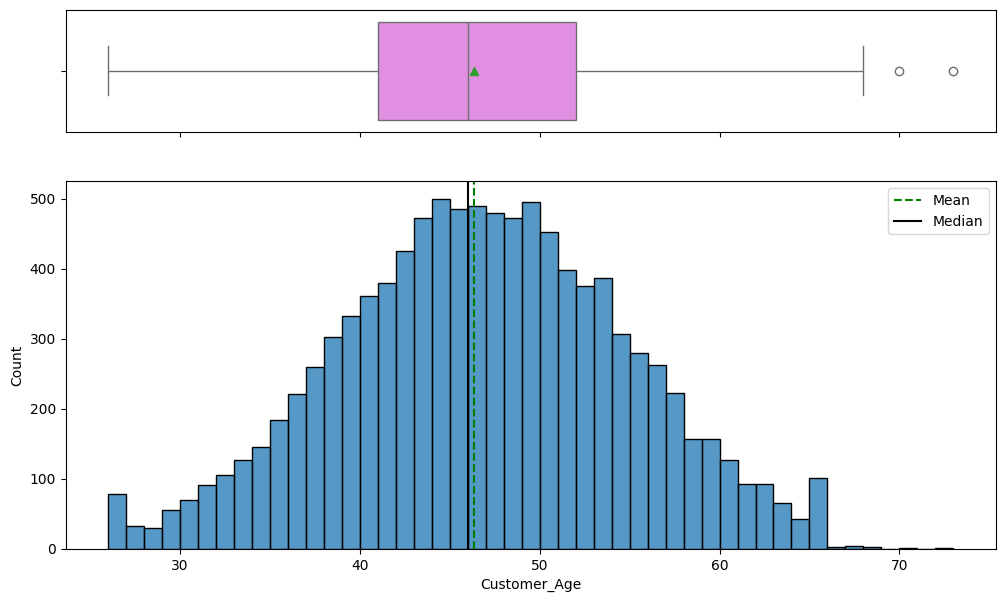

Skewness: -0.033605
Kurtosis: -0.288620


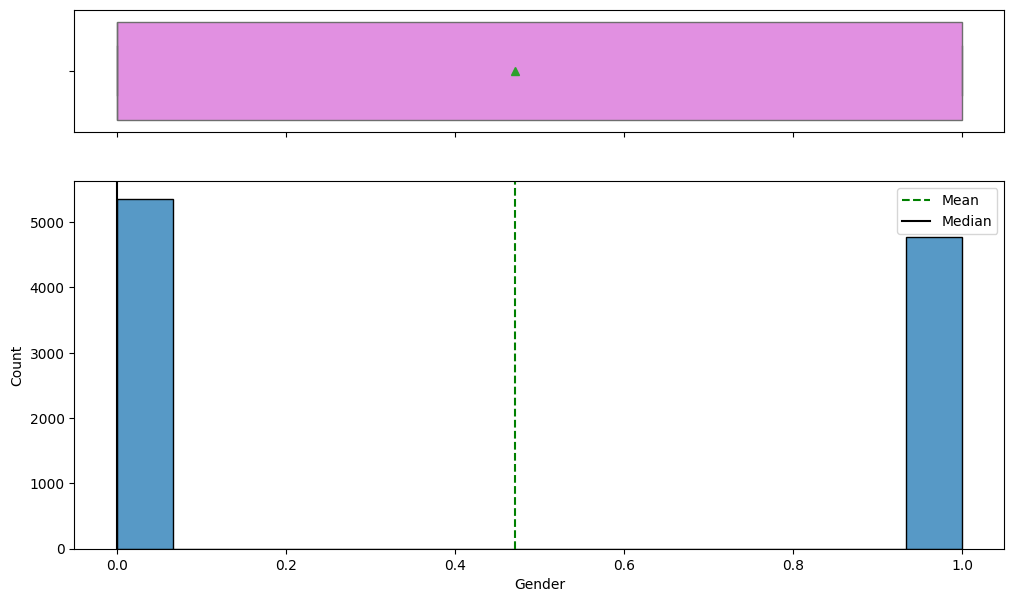

Skewness: 0.116537
Kurtosis: -1.986811


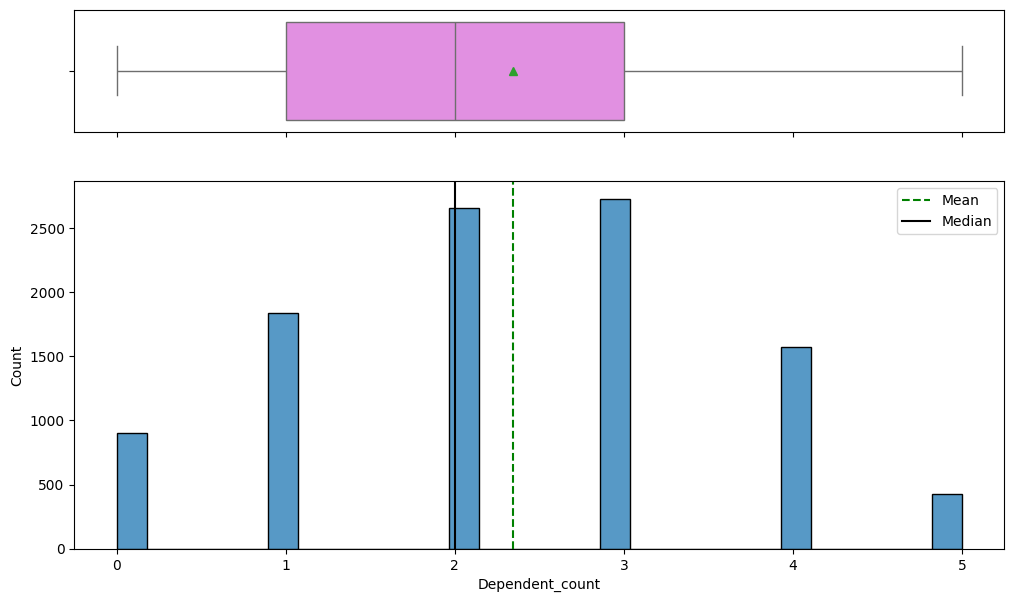

Skewness: -0.020826
Kurtosis: -0.683017


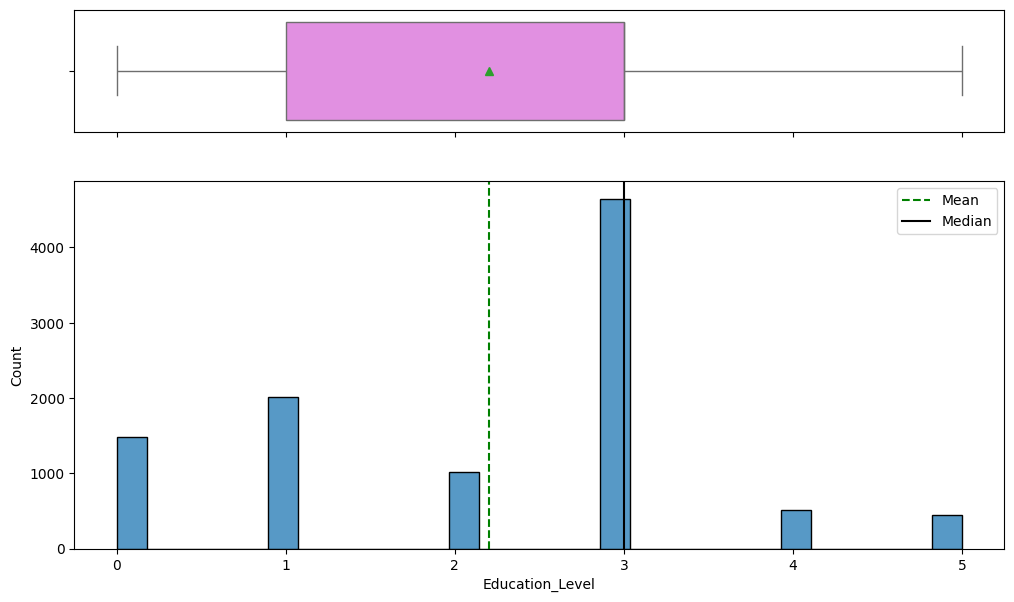

Skewness: -0.167970
Kurtosis: -0.763959


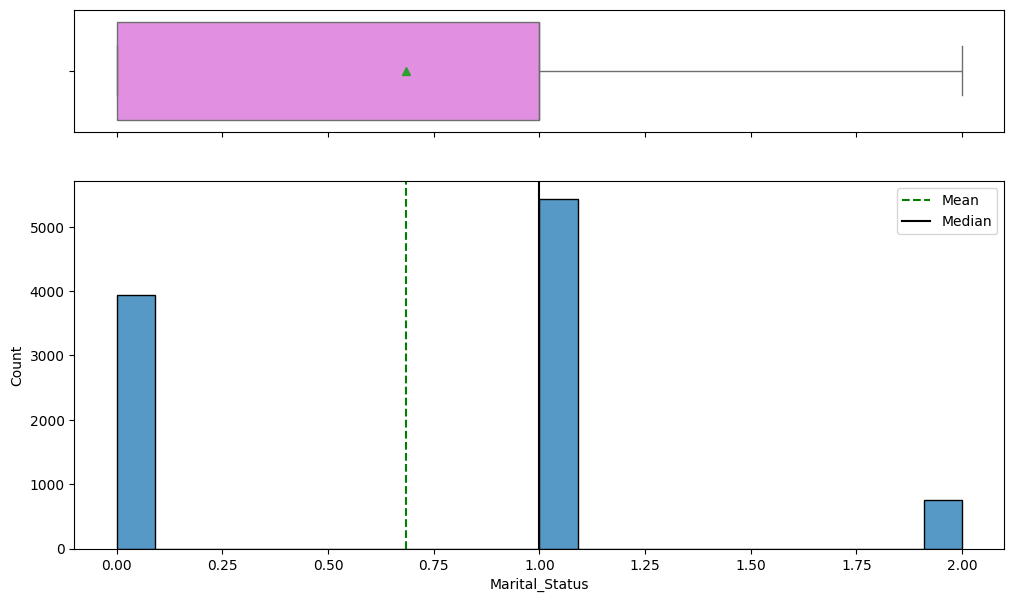

Skewness: 0.274189
Kurtosis: -0.640869


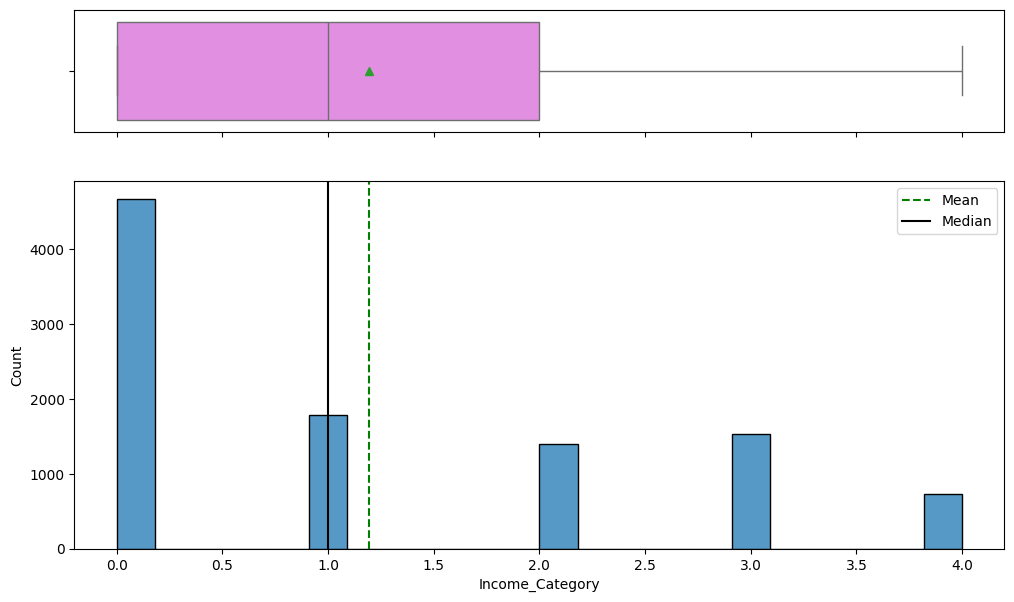

Skewness: 0.718967
Kurtosis: -0.857846


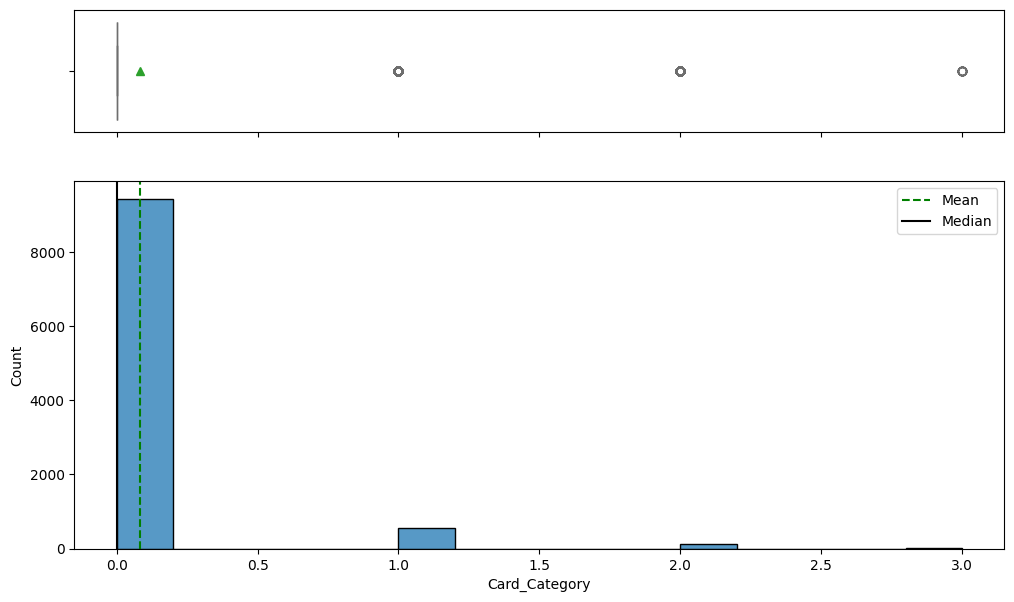

Skewness: 4.605743
Kurtosis: 24.089915


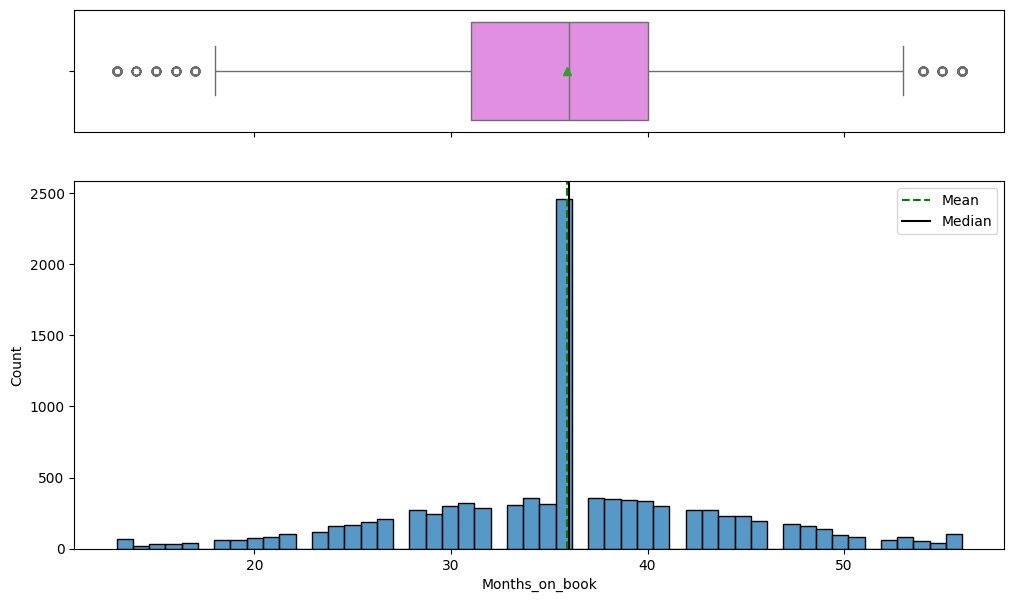

Skewness: -0.106565
Kurtosis: 0.400100


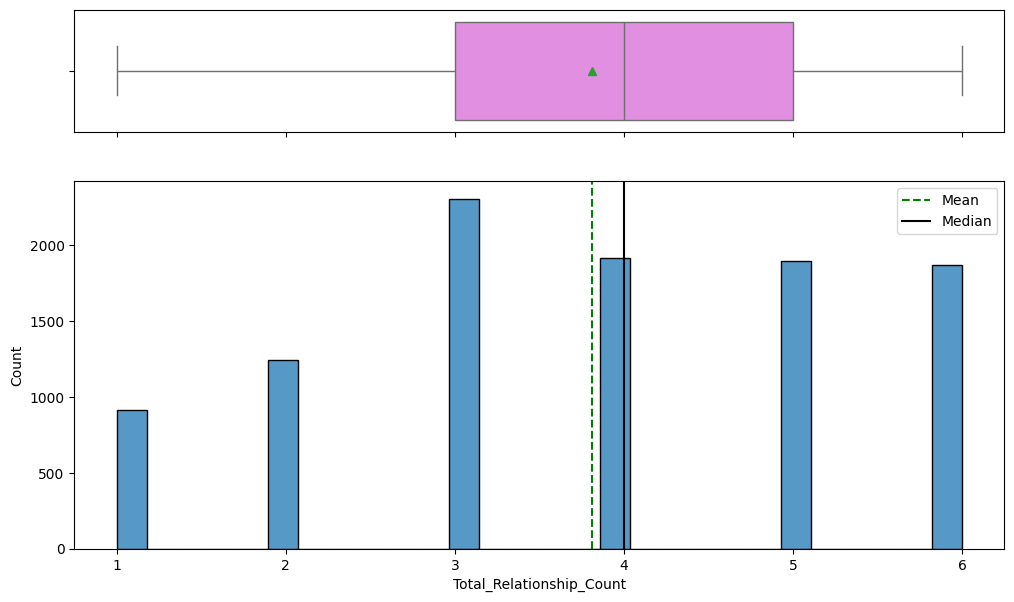

Skewness: -0.162452
Kurtosis: -1.006131


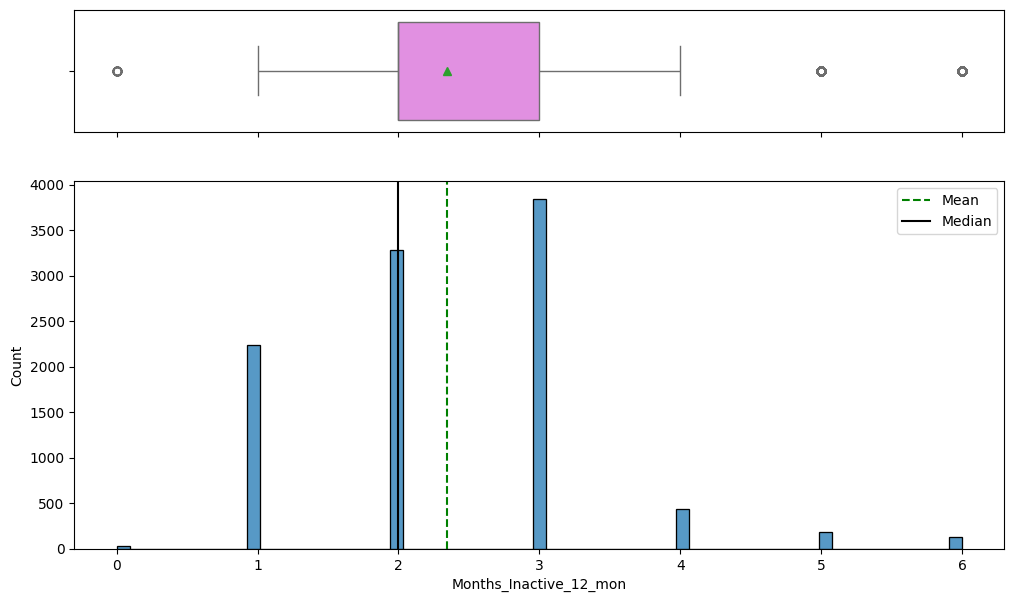

Skewness: 0.633061
Kurtosis: 1.098523


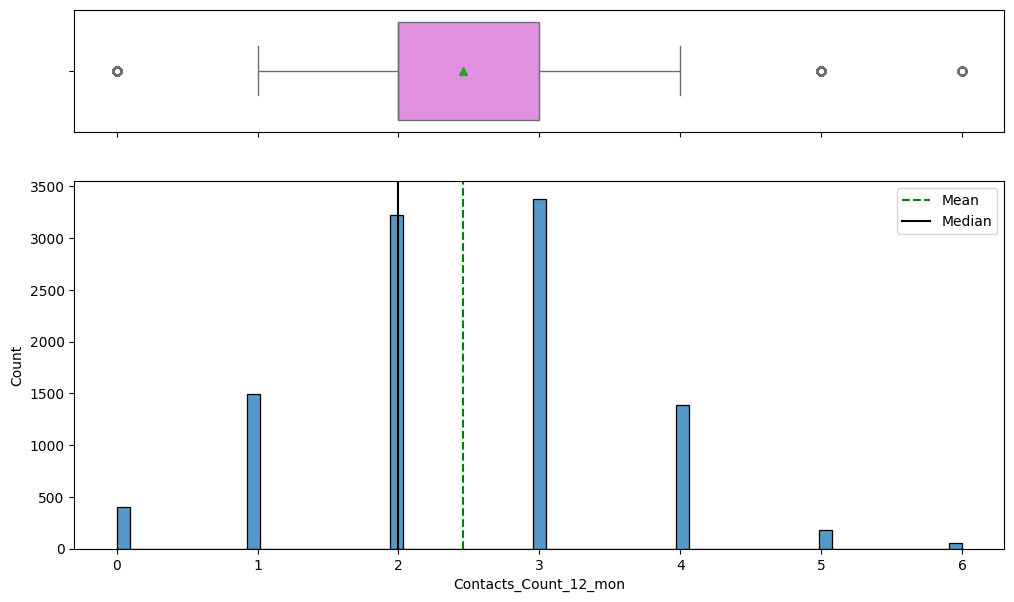

Skewness: 0.011006
Kurtosis: 0.000863


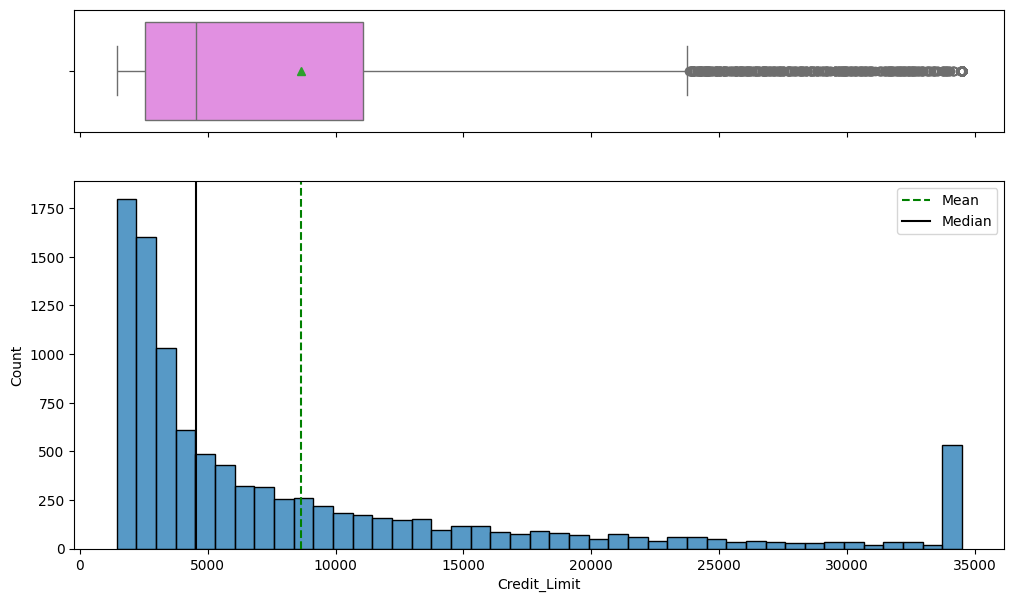

Skewness: 1.666726
Kurtosis: 1.808989


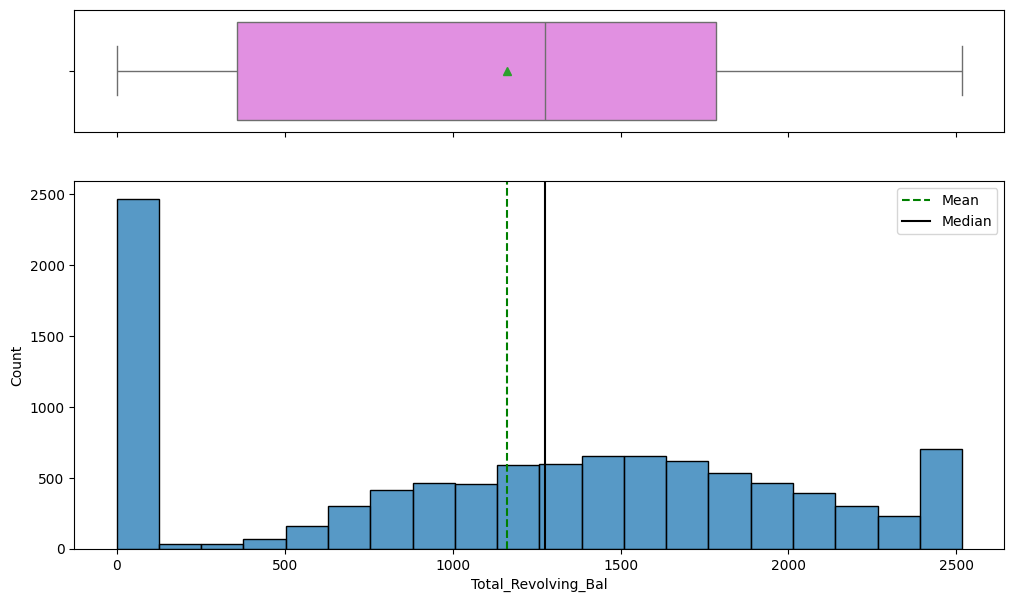

Skewness: -0.148837
Kurtosis: -1.145992


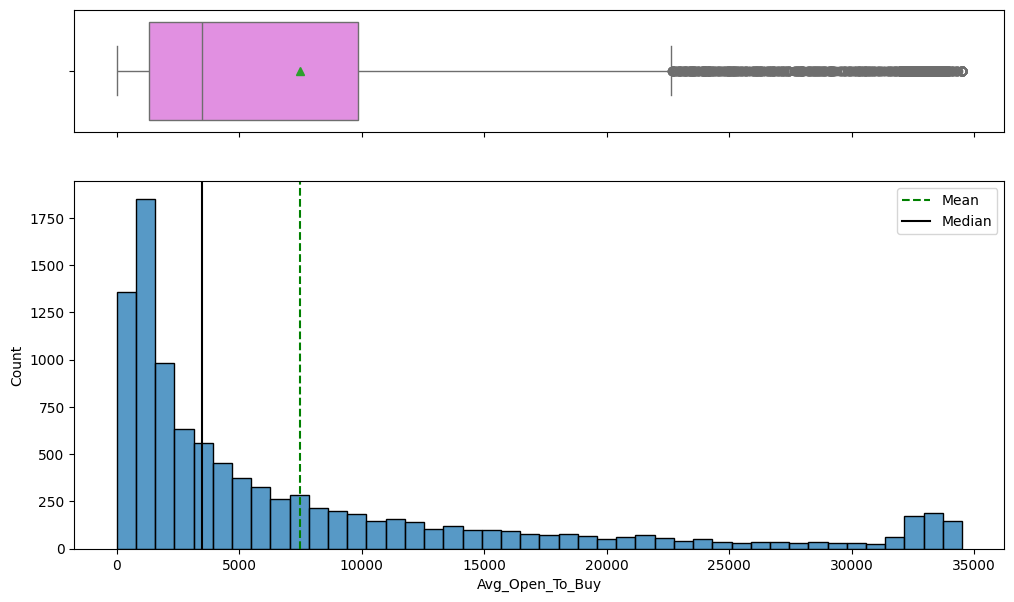

Skewness: 1.661697
Kurtosis: 1.798617


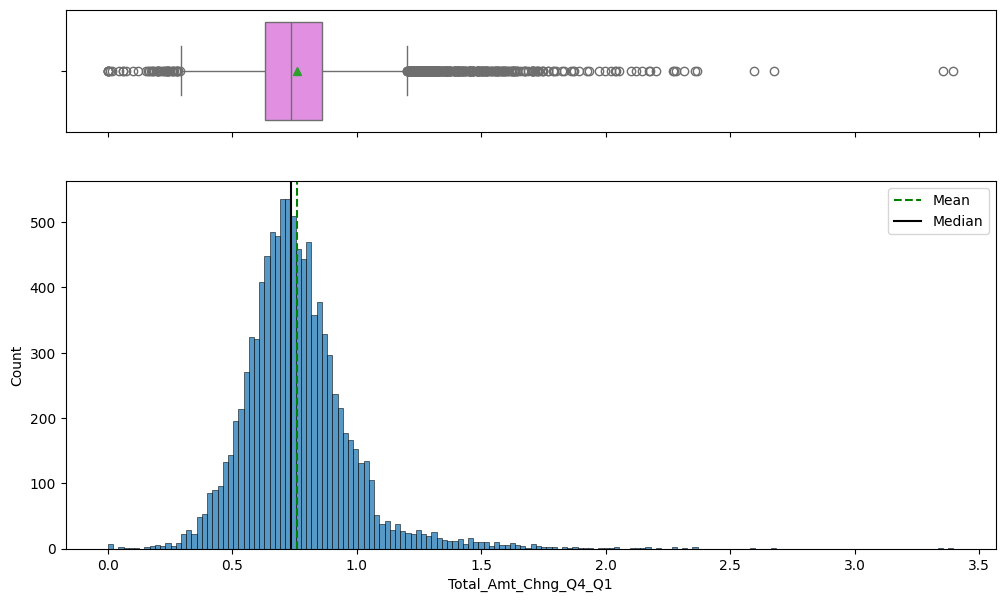

Skewness: 1.732063
Kurtosis: 9.993501


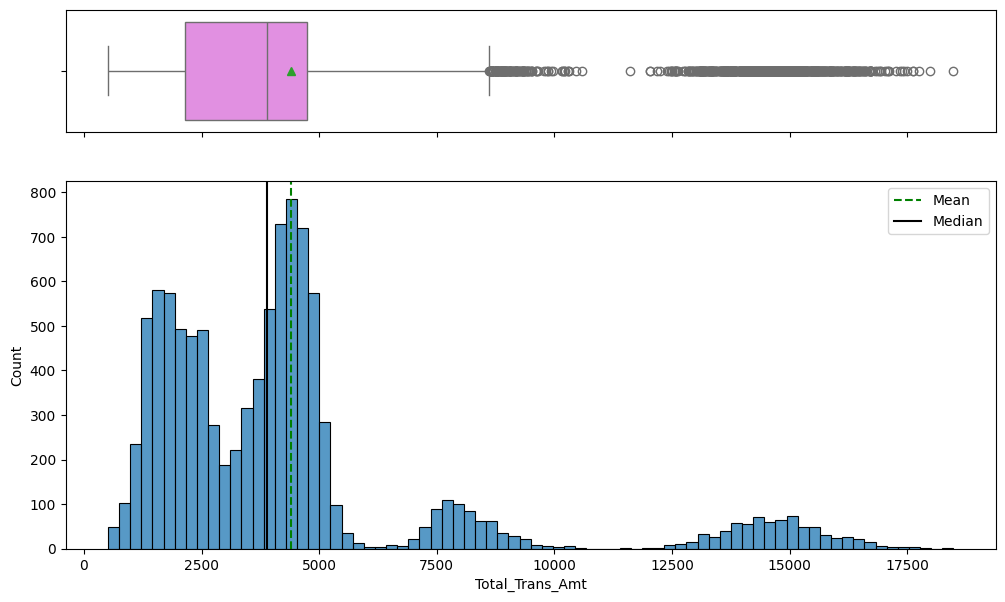

Skewness: 2.041003
Kurtosis: 3.894023


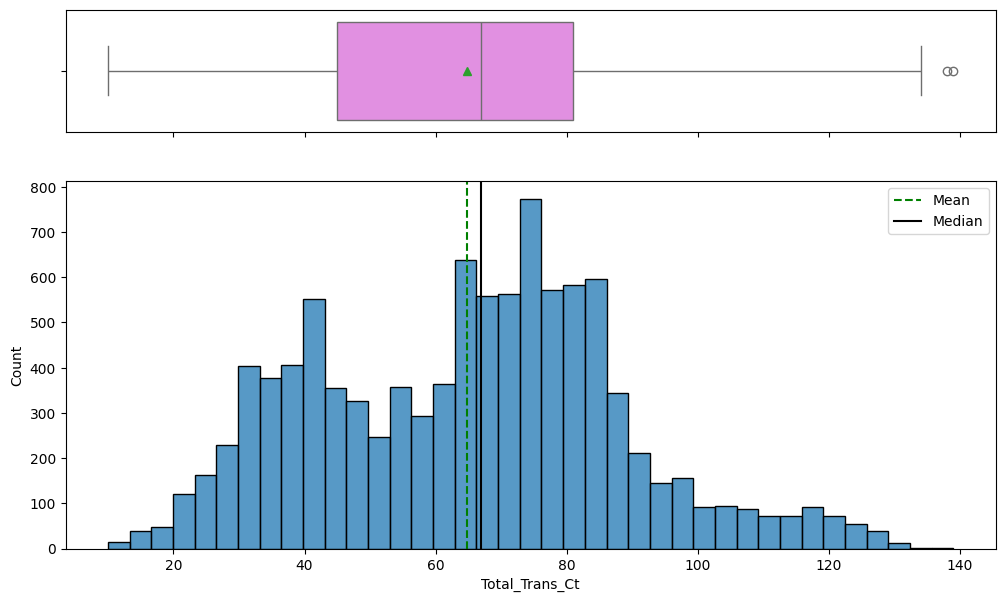

Skewness: 0.153673
Kurtosis: -0.367163


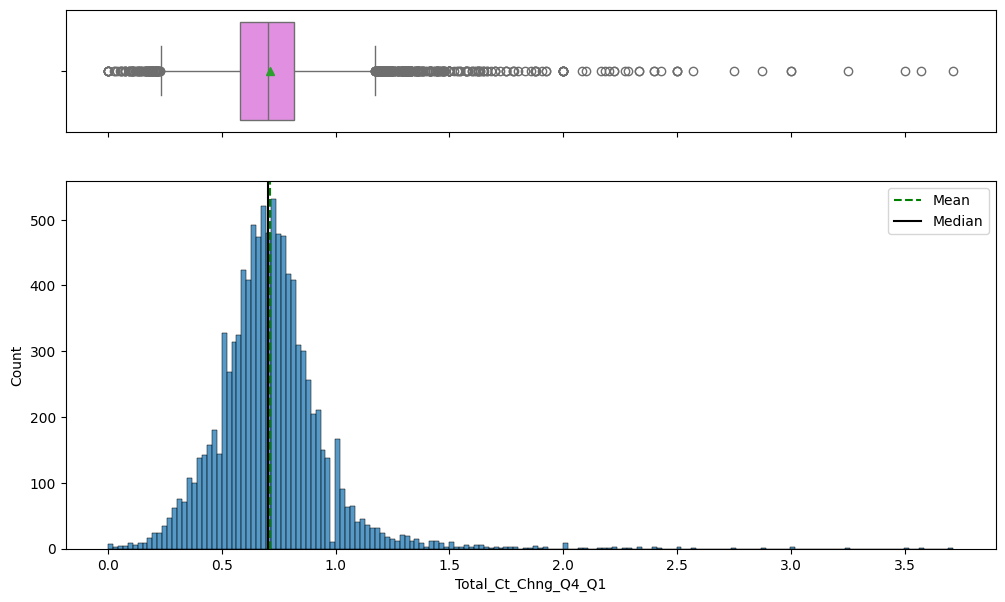

Skewness: 2.064031
Kurtosis: 15.689293


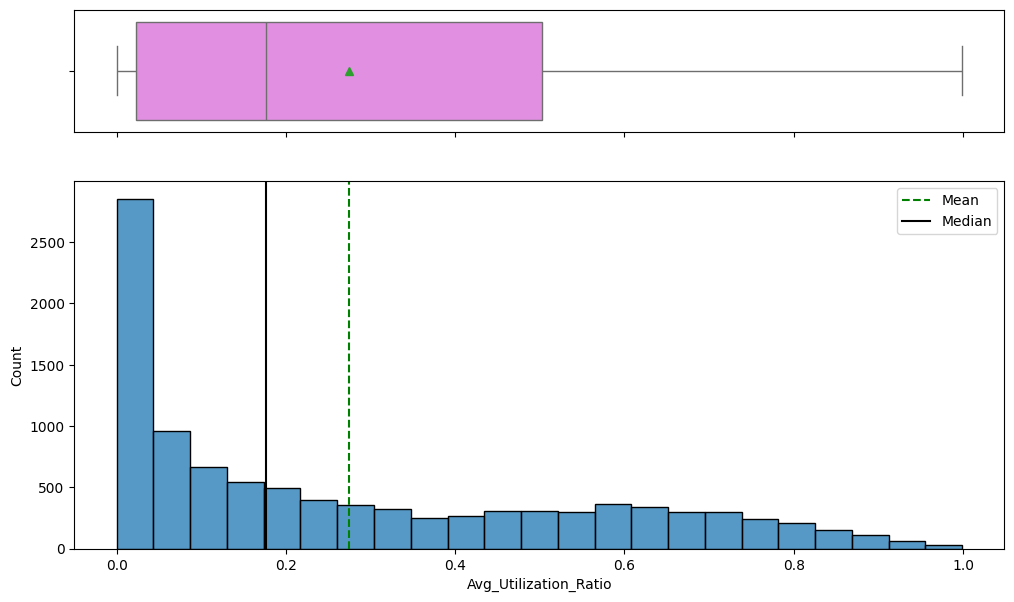

Skewness: 0.718008
Kurtosis: -0.794972


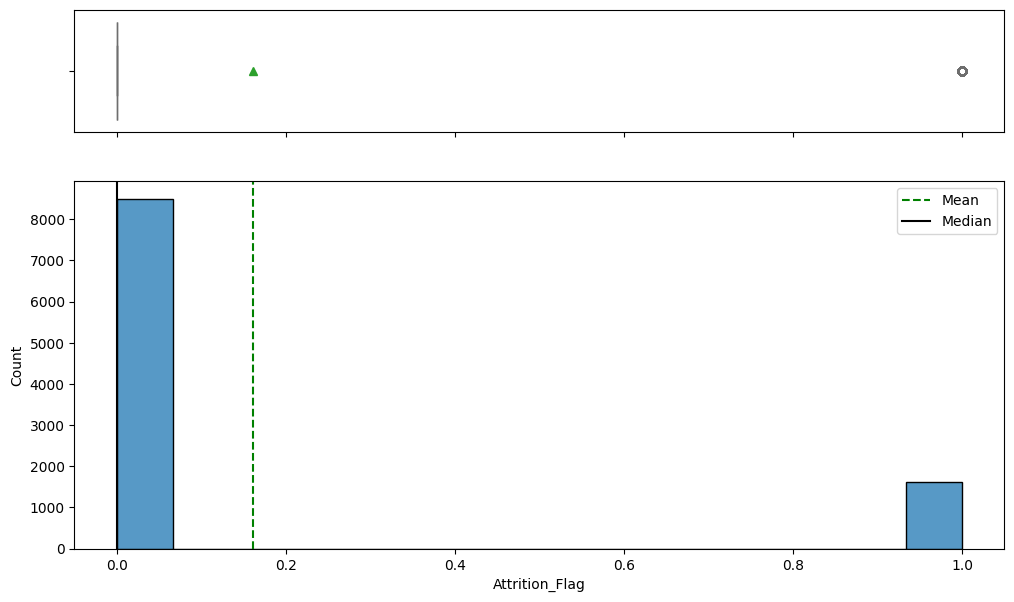

Skewness: 1.848449
Kurtosis: 1.417043


In [36]:
for i in data_encoded.columns:
    histogram_boxplot(data_encoded, i)

**Observations:**

- Mean Customer age is 45, very few outliers
- Dependent_count: average is about 2.5
- Education_Level for most customers is level4 (Graduate)
- Months_on_book: Period of relationship with the bank, majority of customers are at 3.5 years, very few outliers
- Total_Relationship_Count: Total no. of products held by the customer: average 3 products
- Months_Inactive_12_mon: No. of months inactive in the last 12 months: average about 2.3 months
- Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months: average about 2.3 months
- Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance: average about 12K
- Total_Trans_Ct: Total Transaction Count (Last 12 months): mean aroud 65
- Avg_Utilization_Ratio: Represents how much of the available credit the customer spent. aourd 0.3
- Gender: most customers are Female
- Marital Status: Moset customers are  Single, then Married and then divorced
- Income: Most customers ar in the less than 40 K range
- Card Category: most customers: Blue > Silver > Gold > Platinum

**Many Outliers:**
- **Credit_Limit:** Credit Limit on the Credit Card: **many outliers**, right skewed. Average about 8K
- **Avg_Open_To_Buy:** Open to Buy refers to the amount left on the credit card to use (Average of last 12 months): Right Skewed with **many outilers**
- **Total_Ct_Chng_Q4_Q1:** Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter: **Many outliers**
- **Total_Trans_Amt:** Total Transaction Amount (Last 12 months): meant around 4K, right skewed, **many outliers**

#### Labeled_barplot

##### Let's look at the columns

In [37]:
for i, value in enumerate(data_encoded.columns):
    print(i, value)

0 Customer_Age
1 Gender
2 Dependent_count
3 Education_Level
4 Marital_Status
5 Income_Category
6 Card_Category
7 Months_on_book
8 Total_Relationship_Count
9 Months_Inactive_12_mon
10 Contacts_Count_12_mon
11 Credit_Limit
12 Total_Revolving_Bal
13 Avg_Open_To_Buy
14 Total_Amt_Chng_Q4_Q1
15 Total_Trans_Amt
16 Total_Trans_Ct
17 Total_Ct_Chng_Q4_Q1
18 Avg_Utilization_Ratio
19 Attrition_Flag


##### Only plot from index 0 to 10

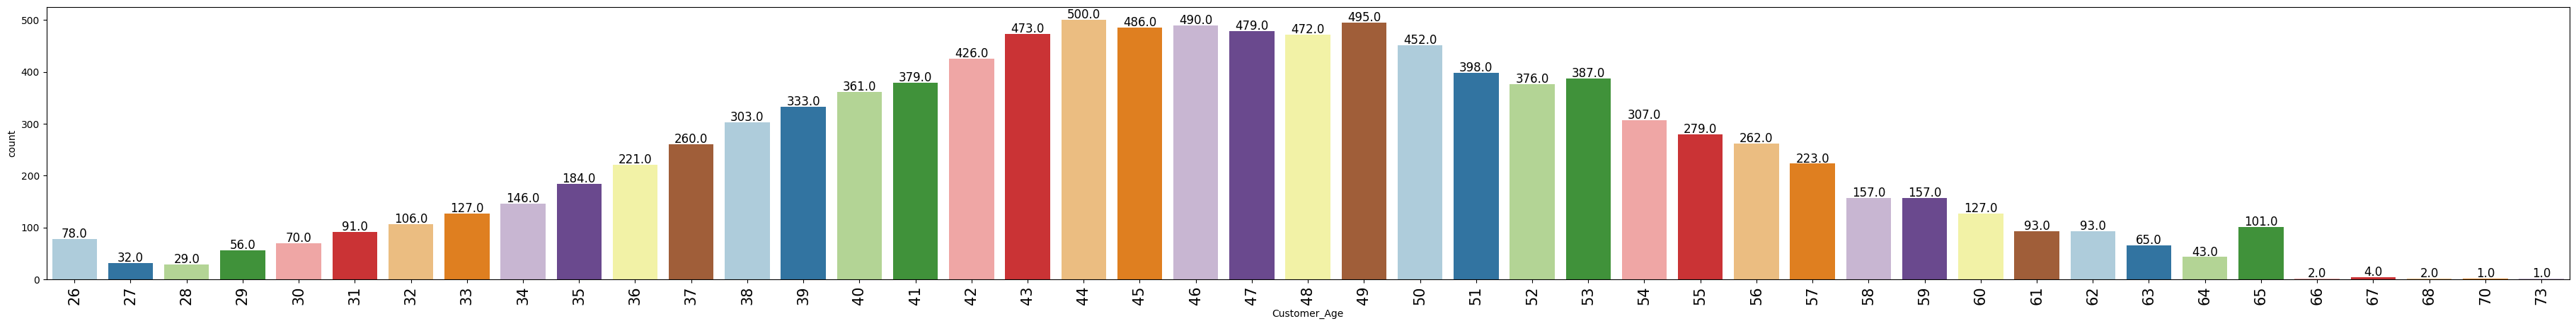

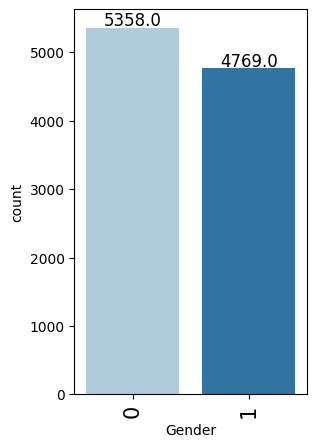

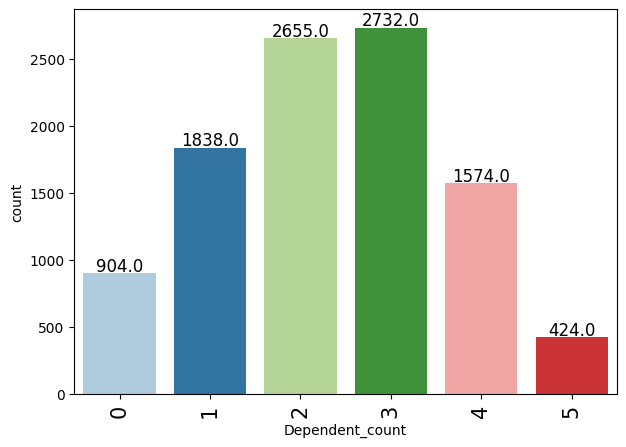

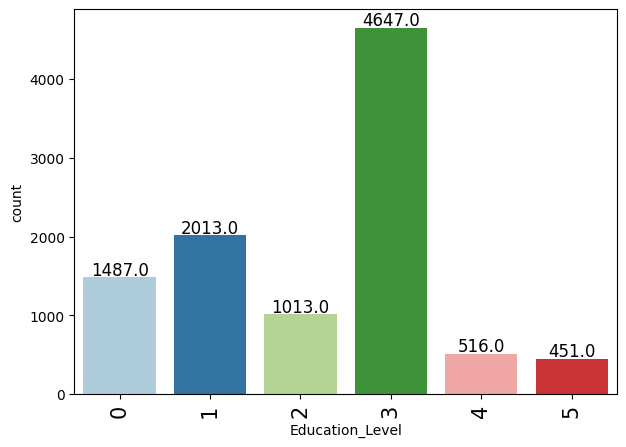

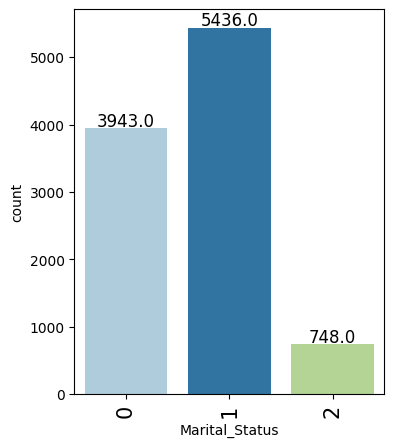

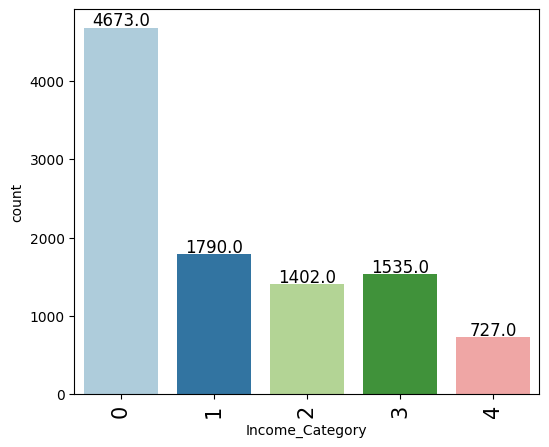

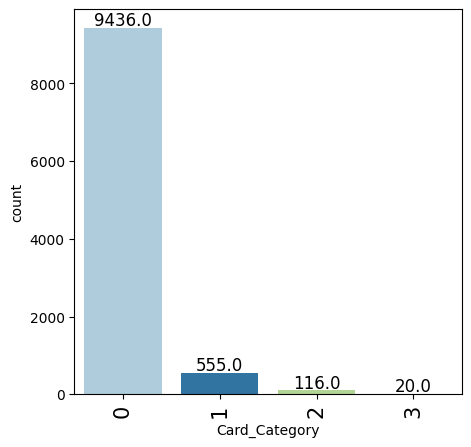

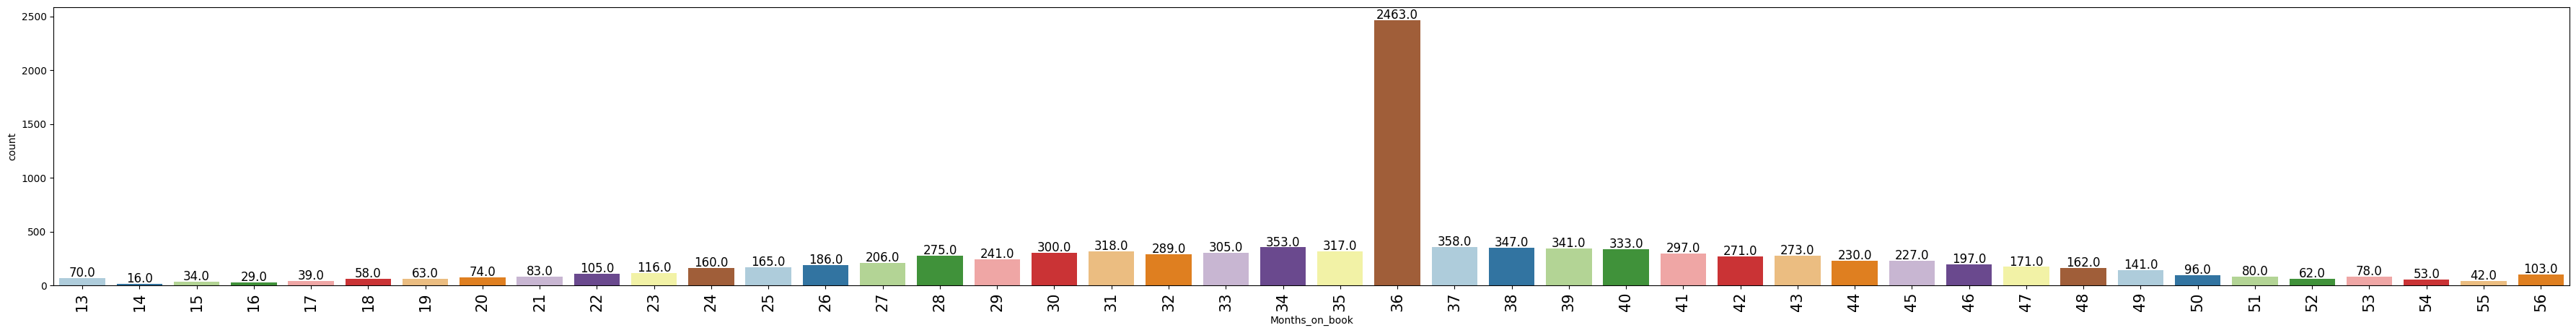

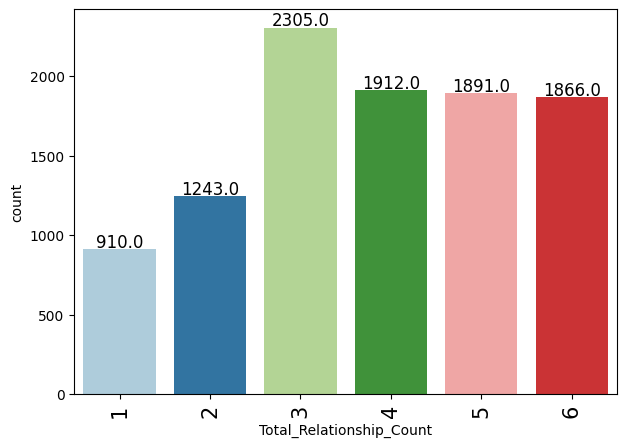

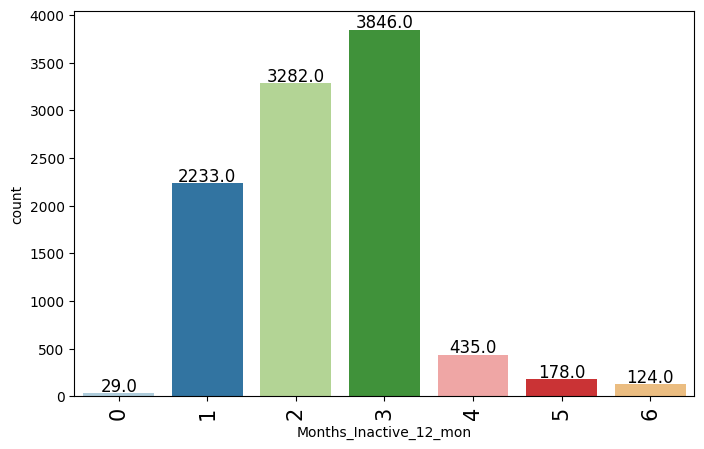

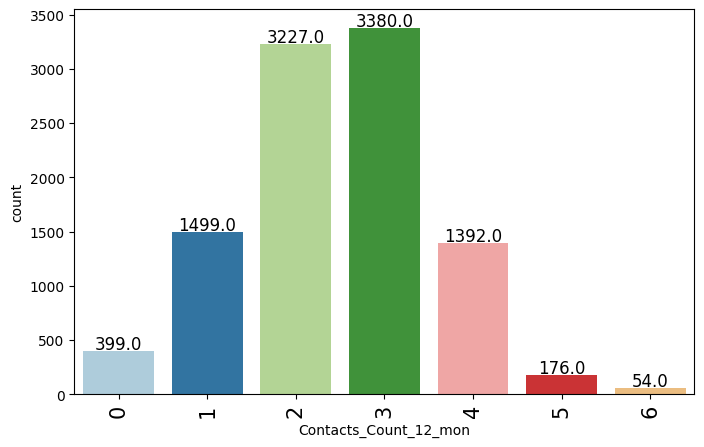

In [38]:
for i in data_encoded.columns[:11]:
    labeled_barplot(data_encoded, i)

**Observations:**
- Attrition_Flag: 1627 attrited, 8500 did not
- Customer Age: most customers age in range from 44 to 49
- Gender: Female: 5358, Male: 4769
- Dependent_Count: Most customers have between 2 to 3 dependents
- Education Level:  Most customers are at Level 4 (graduate), followed by 2 (High School)
- Marital_Status: Most customers are married, followed by single
- Income_Category: 1 (Less than $40K) & 2 ($40K - $60K) are most common
- Card_Category: 0 (Blue) and 1 (Silver) are most common
- Months_on_book - Period of relationship with the bank : 36 months (3 years) is most common
- Total_Relationship_Count: Total no. of products held by the customer: 3,4,5,6 are most common in descending order
- Months_Inactive_12_mon: No. of months inactive in the last 12 months: 3,2,1 are most common in descending order
- Contacts_Count_12_mon: No. of Contacts in the last 12 months: 3,2,1 are most common in descending order

#### stacked bar chart

In [39]:
for i, value in enumerate(data_encoded.columns):
    print(i, value)

0 Customer_Age
1 Gender
2 Dependent_count
3 Education_Level
4 Marital_Status
5 Income_Category
6 Card_Category
7 Months_on_book
8 Total_Relationship_Count
9 Months_Inactive_12_mon
10 Contacts_Count_12_mon
11 Credit_Limit
12 Total_Revolving_Bal
13 Avg_Open_To_Buy
14 Total_Amt_Chng_Q4_Q1
15 Total_Trans_Amt
16 Total_Trans_Ct
17 Total_Ct_Chng_Q4_Q1
18 Avg_Utilization_Ratio
19 Attrition_Flag


##### Only plot for columns 1 through 10

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
0               4428   930   5358
1               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


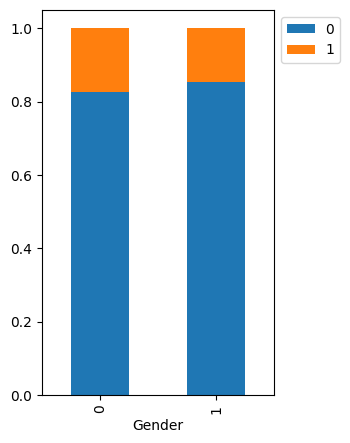

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


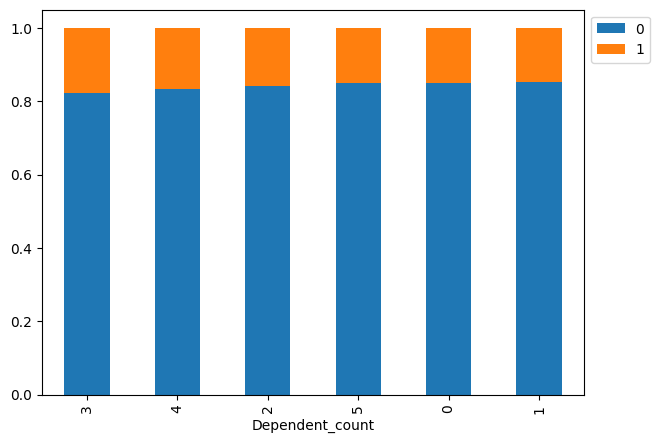

Attrition_Flag      0     1    All
Education_Level                   
All              8500  1627  10127
3                3904   743   4647
1                1707   306   2013
0                1250   237   1487
2                 859   154   1013
5                 356    95    451
4                 424    92    516
------------------------------------------------------------------------------------------------------------------------


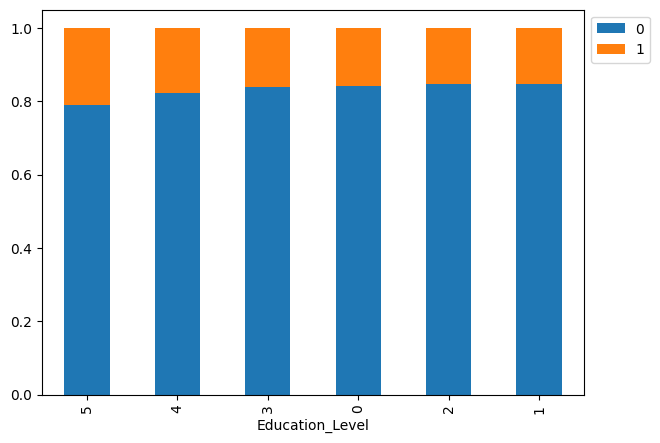

Attrition_Flag     0     1    All
Marital_Status                   
All             8500  1627  10127
1               4598   838   5436
0               3275   668   3943
2                627   121    748
------------------------------------------------------------------------------------------------------------------------


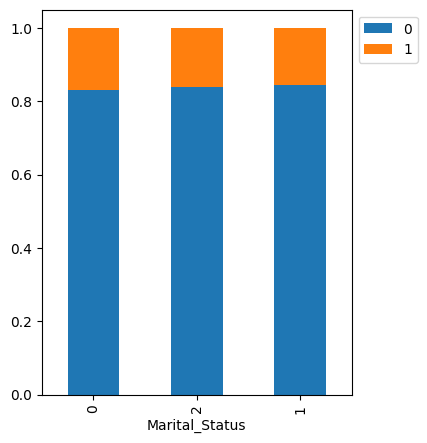

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
0                3874   799   4673
1                1519   271   1790
3                1293   242   1535
2                1213   189   1402
4                 601   126    727
------------------------------------------------------------------------------------------------------------------------


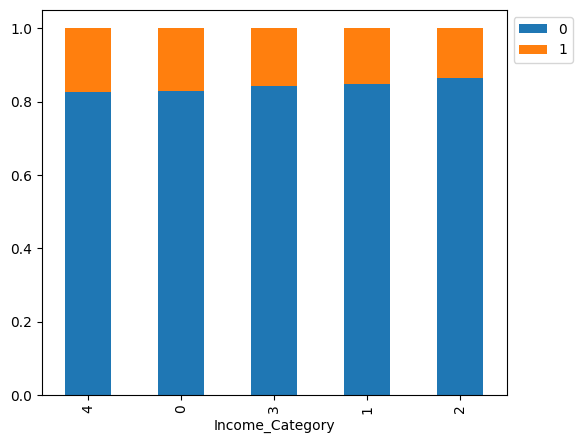

Attrition_Flag     0     1    All
Card_Category                    
All             8500  1627  10127
0               7917  1519   9436
1                473    82    555
2                 95    21    116
3                 15     5     20
------------------------------------------------------------------------------------------------------------------------


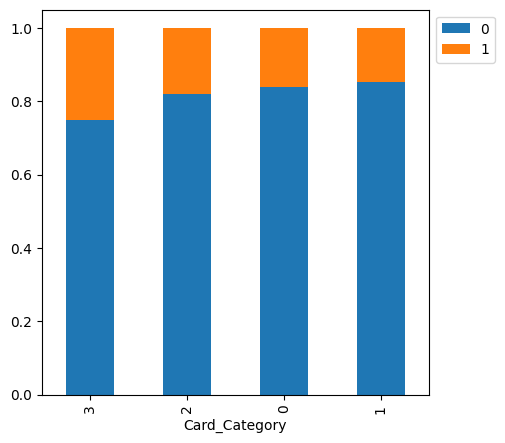

Attrition_Flag     0     1    All
Months_on_book                   
All             8500  1627  10127
36              2033   430   2463
39               277    64    341
37               296    62    358
30               242    58    300
38               290    57    347
34               296    57    353
41               246    51    297
33               257    48    305
40               288    45    333
35               272    45    317
32               245    44    289
28               232    43    275
44               188    42    230
43               231    42    273
46               161    36    197
42               235    36    271
29               207    34    241
31               284    34    318
45               194    33    227
25               134    31    165
24               132    28    160
48               135    27    162
50                71    25     96
49               117    24    141
26               162    24    186
47               147    24    171
27            

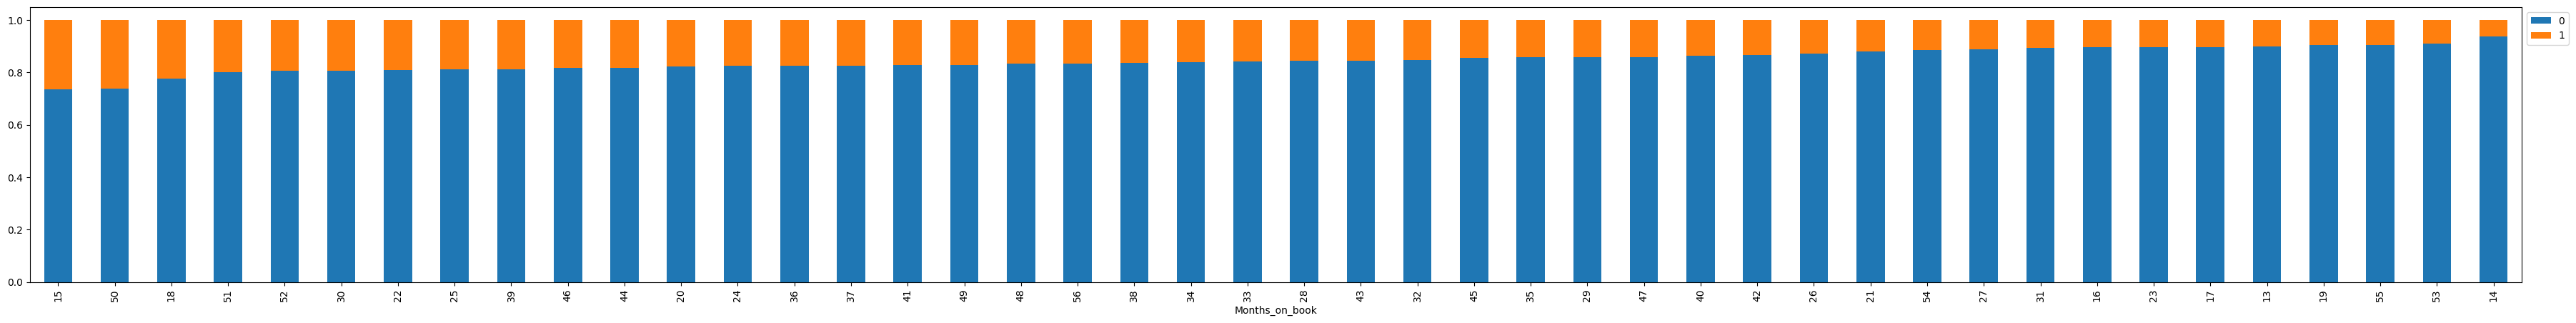

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


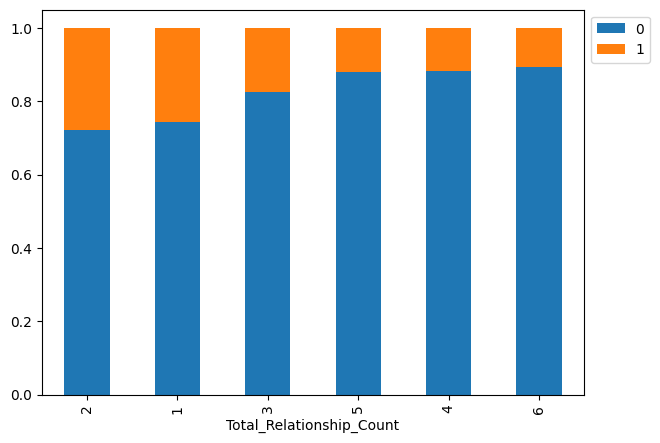

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


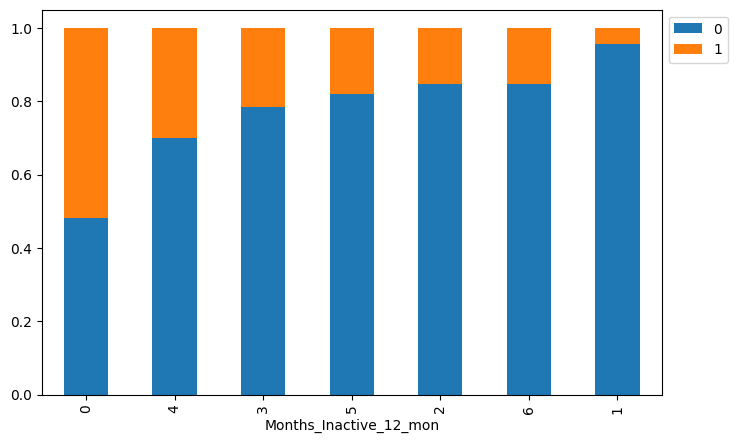

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


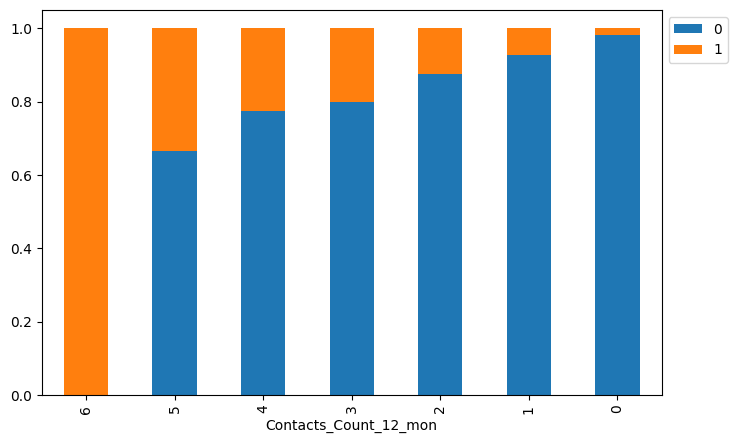

In [40]:
for i in data_encoded.columns[1:11]:
    stacked_barplot(data_encoded, i, 'Attrition_Flag')

**Observations:**

Inflence on attrition based on feature

- Age:  Older (more established customers) tend to not attrite
- Gender:  Propotionally Females attrite more (which makes sense since there are more female customers.
- Dependent_Count: does not show any propotion increase based on dependents
- Education_Level:  Level 6 (doctorate) seems to attrite a bit more proponatily
- Marital_Status:  No proption precedence
- Income_Category: No proption precedence
- Card_Category:  Higher Card levels seem to attrite more proponatiely
- Months_on_book: Long term customers seem to be more stable (not att
rite so much)
- Total_Relationship Count:  Longer Relationship seems to attrite less
- Months_Inactive: Customers who have been inactive for longer, seem to attrite more
- Contacts_Count_12_mon: No. of Contacts in the last 12 months:  Customers that made more contacts with bank in last 12 months, seem to attrite more prominently

#### distribution_plot_wrt_target

In [41]:
for i, value in enumerate(data_encoded.columns):
    print(i, value)

0 Customer_Age
1 Gender
2 Dependent_count
3 Education_Level
4 Marital_Status
5 Income_Category
6 Card_Category
7 Months_on_book
8 Total_Relationship_Count
9 Months_Inactive_12_mon
10 Contacts_Count_12_mon
11 Credit_Limit
12 Total_Revolving_Bal
13 Avg_Open_To_Buy
14 Total_Amt_Chng_Q4_Q1
15 Total_Trans_Amt
16 Total_Trans_Ct
17 Total_Ct_Chng_Q4_Q1
18 Avg_Utilization_Ratio
19 Attrition_Flag


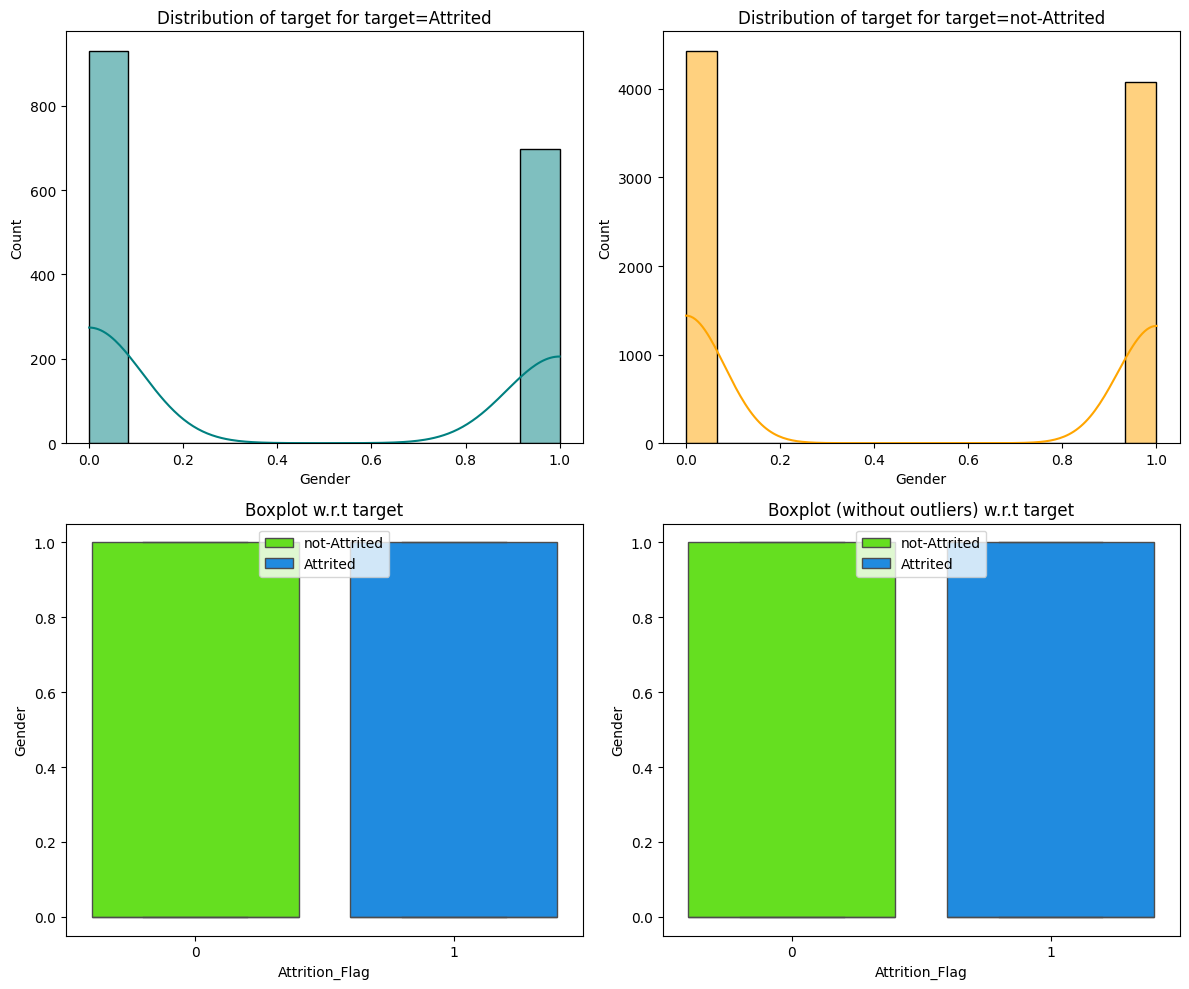

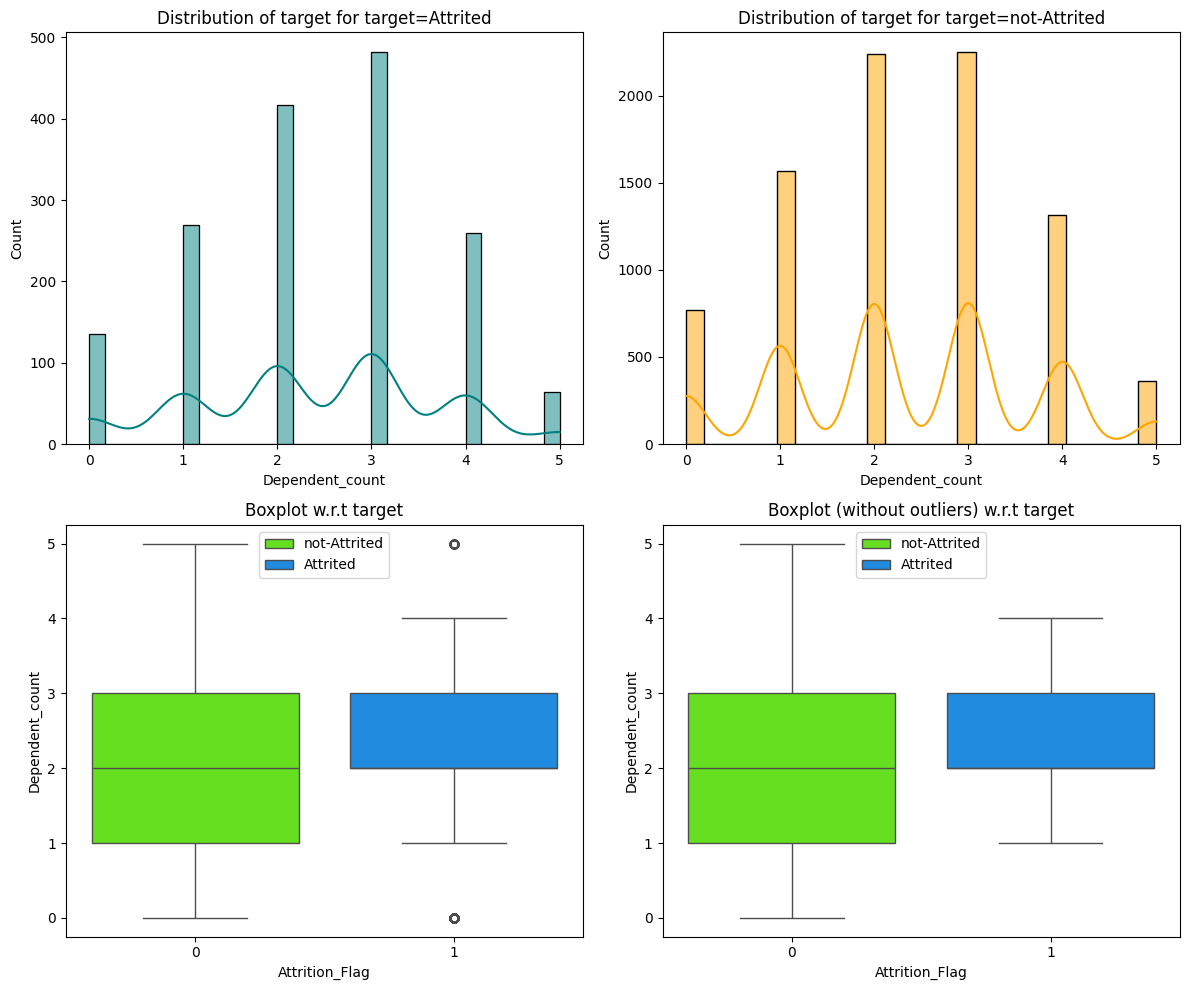

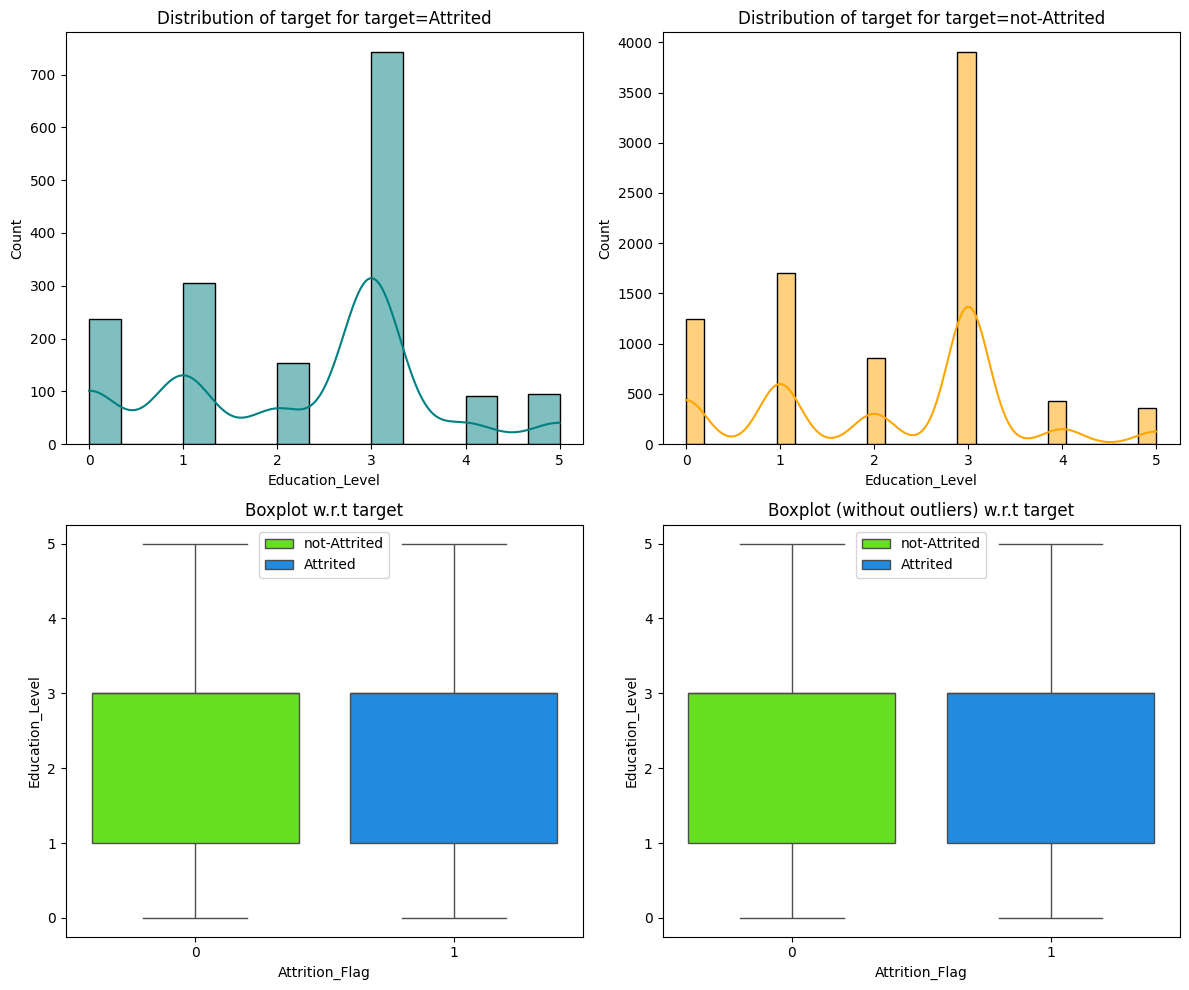

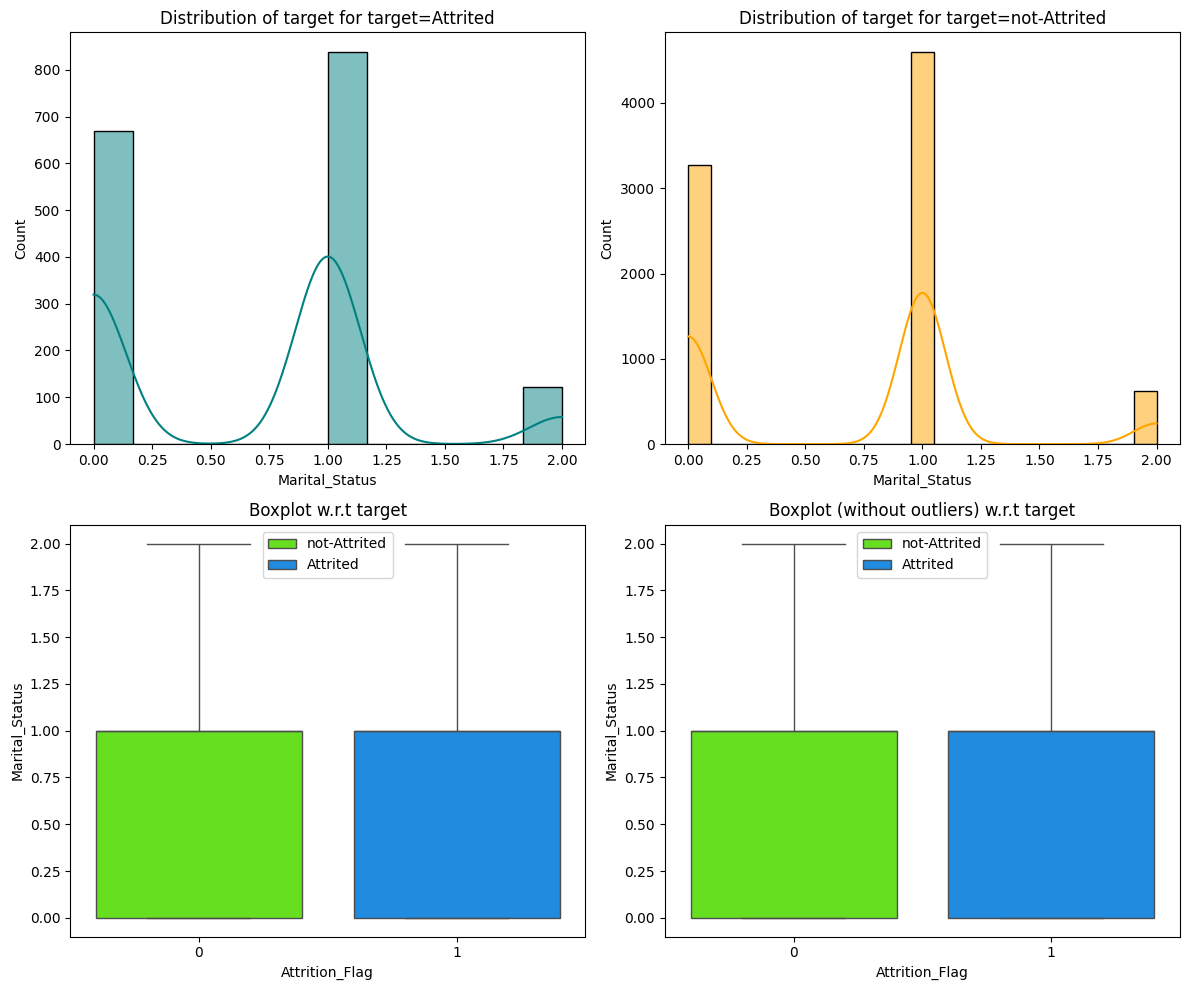

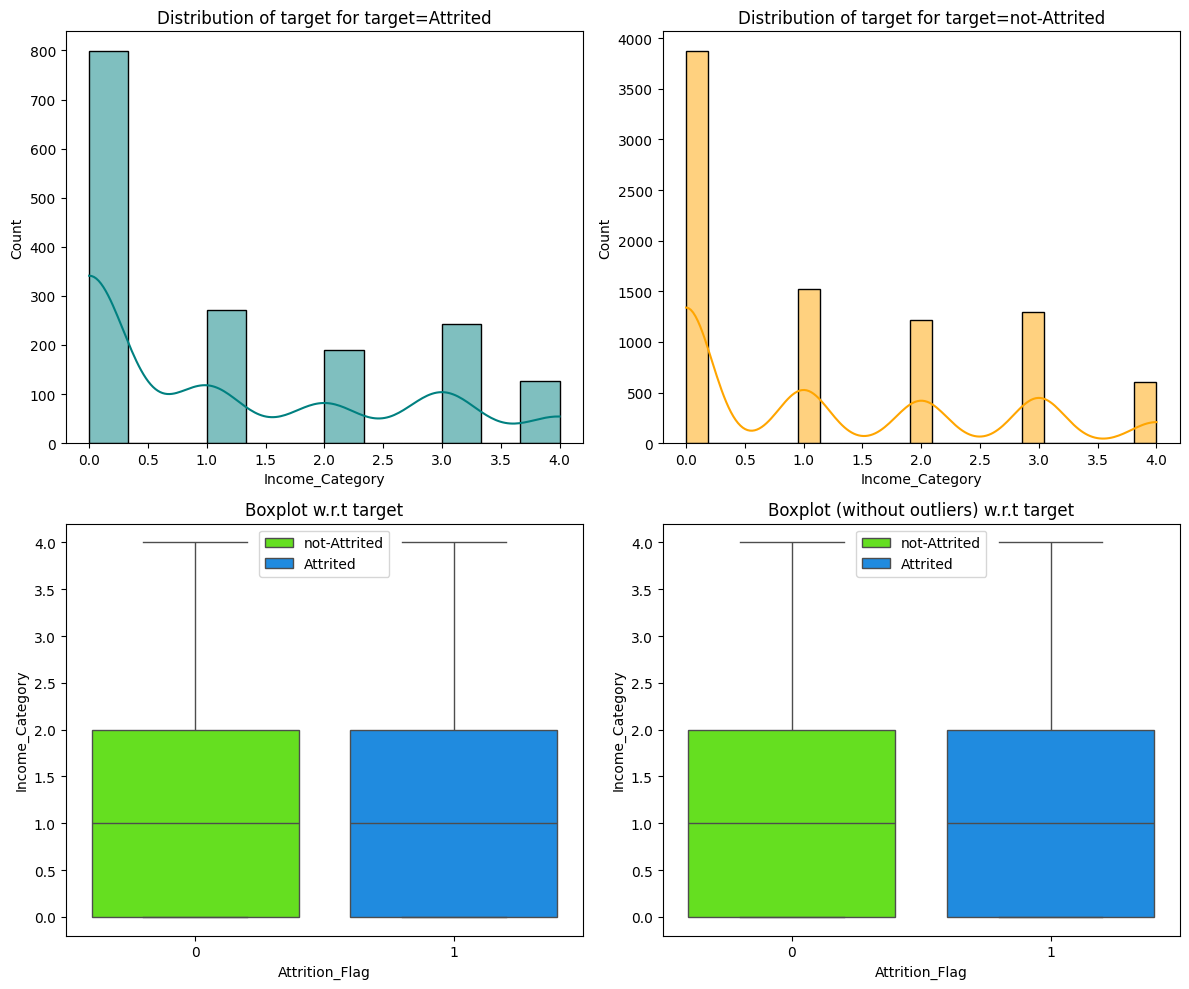

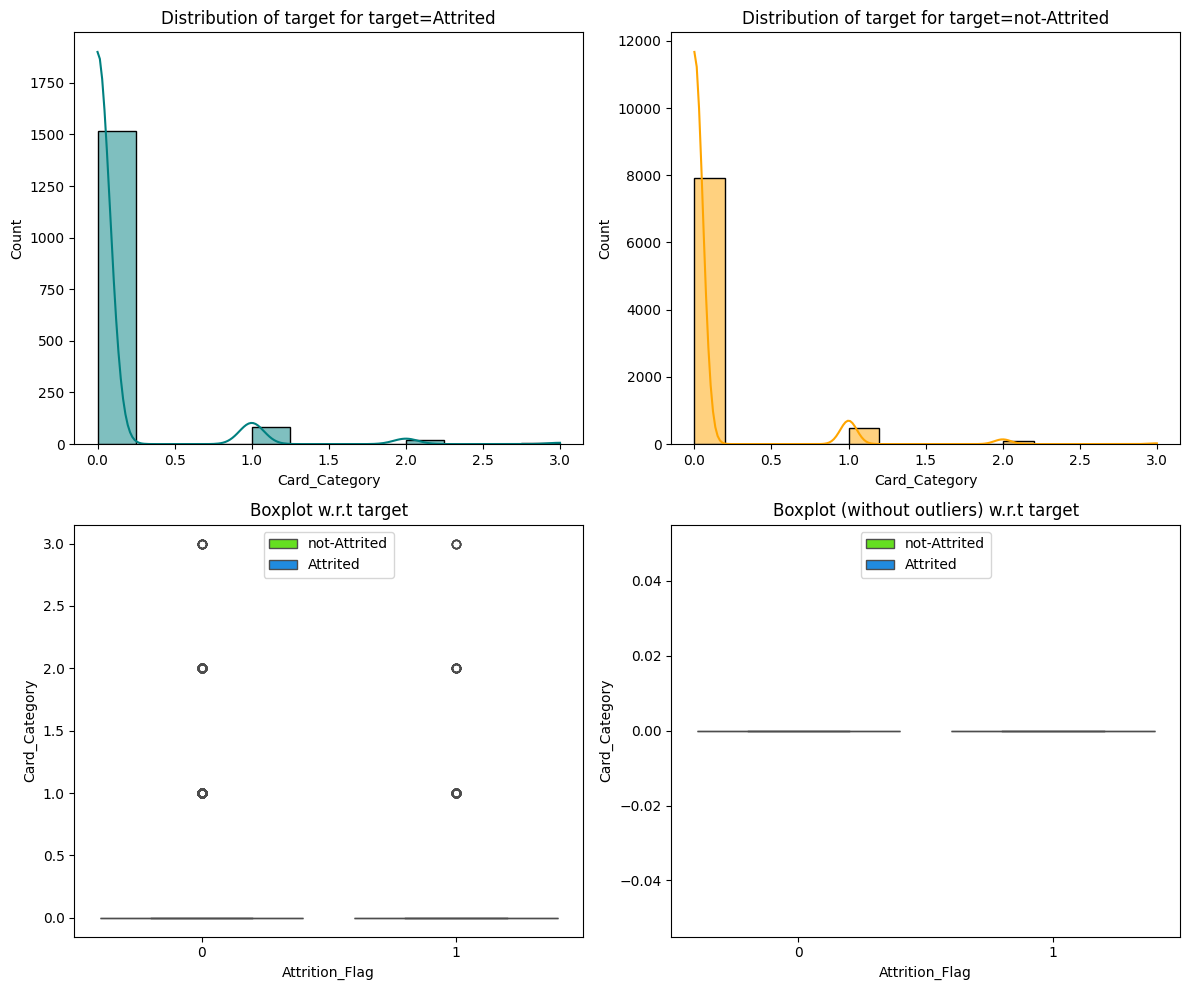

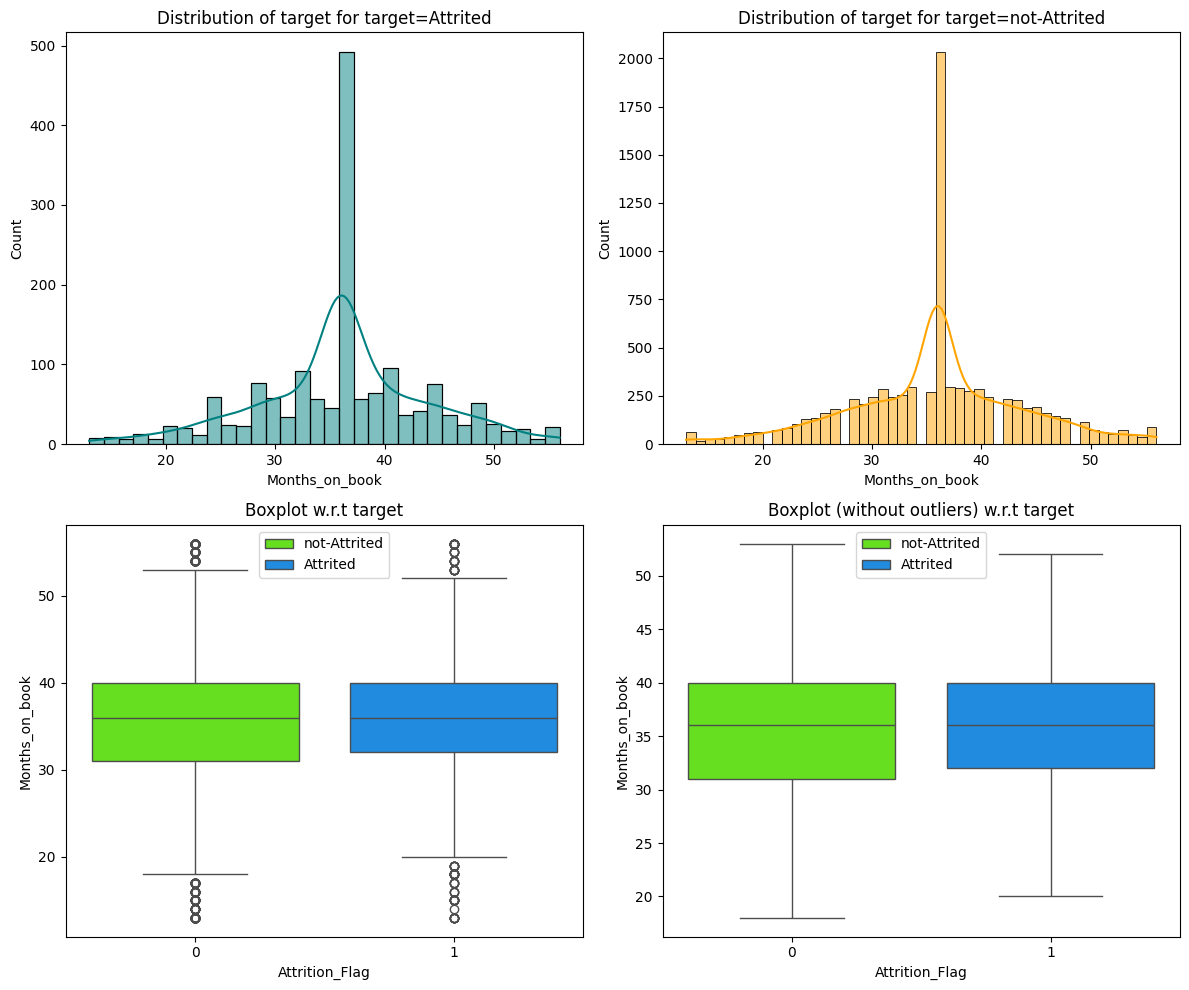

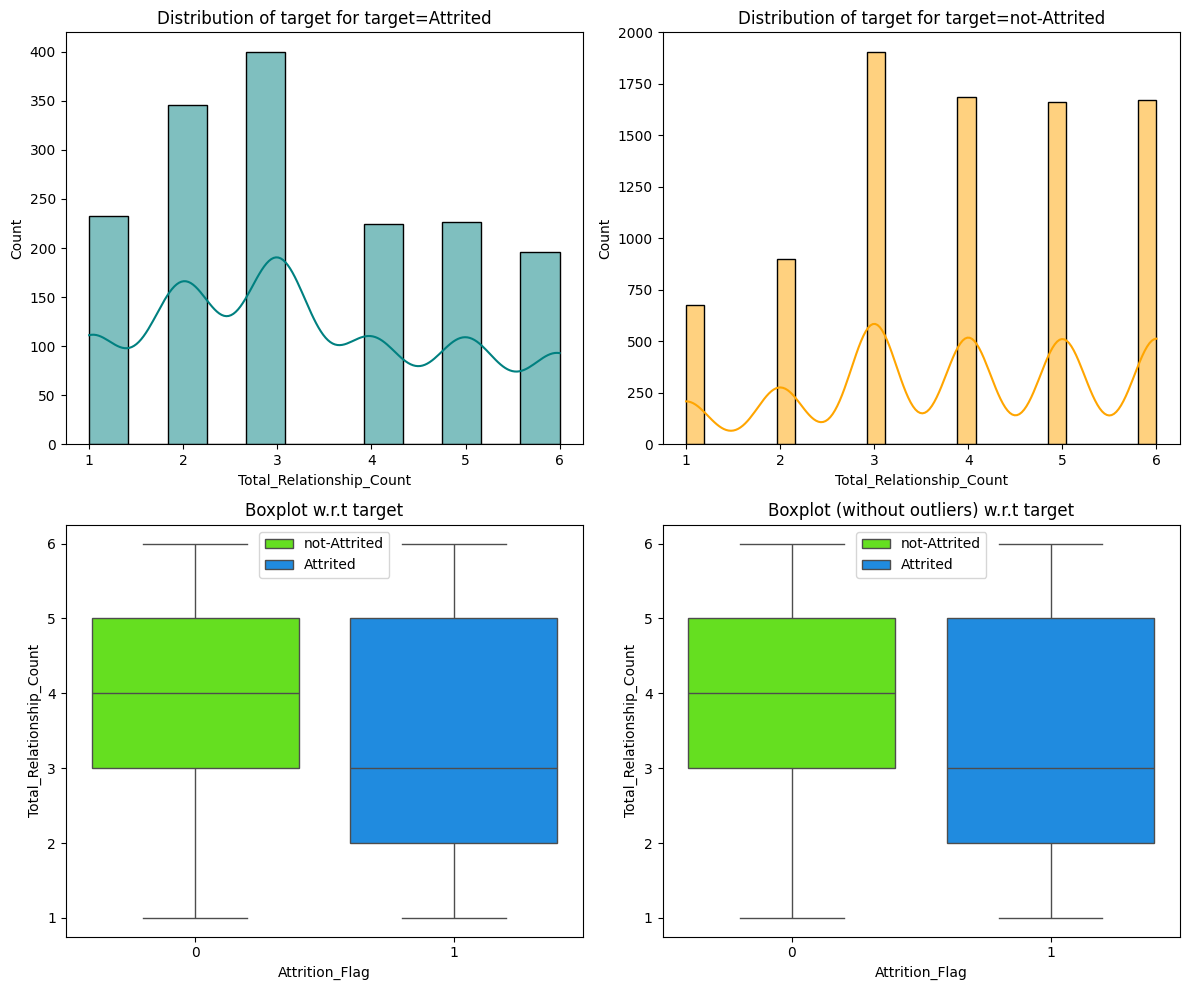

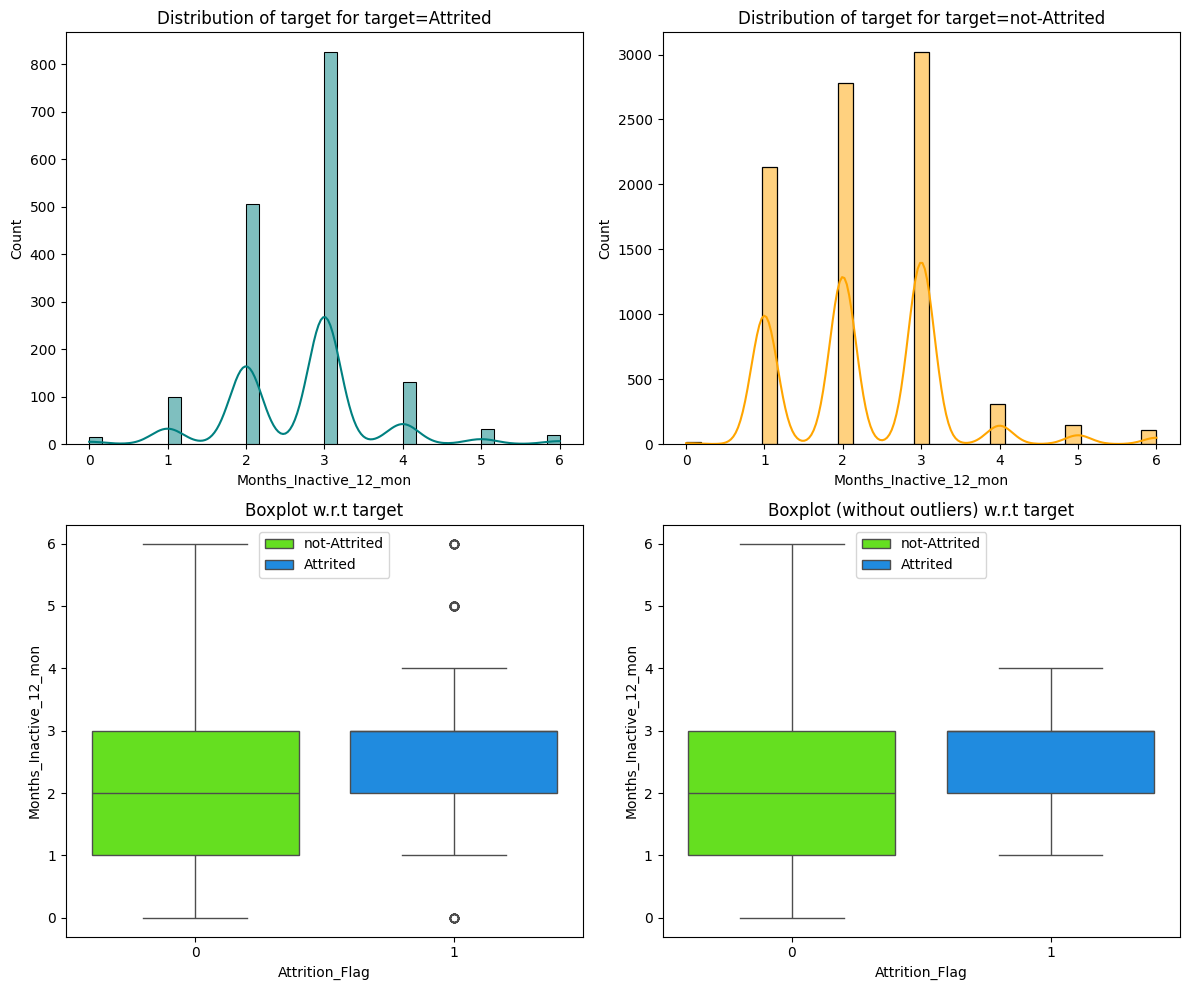

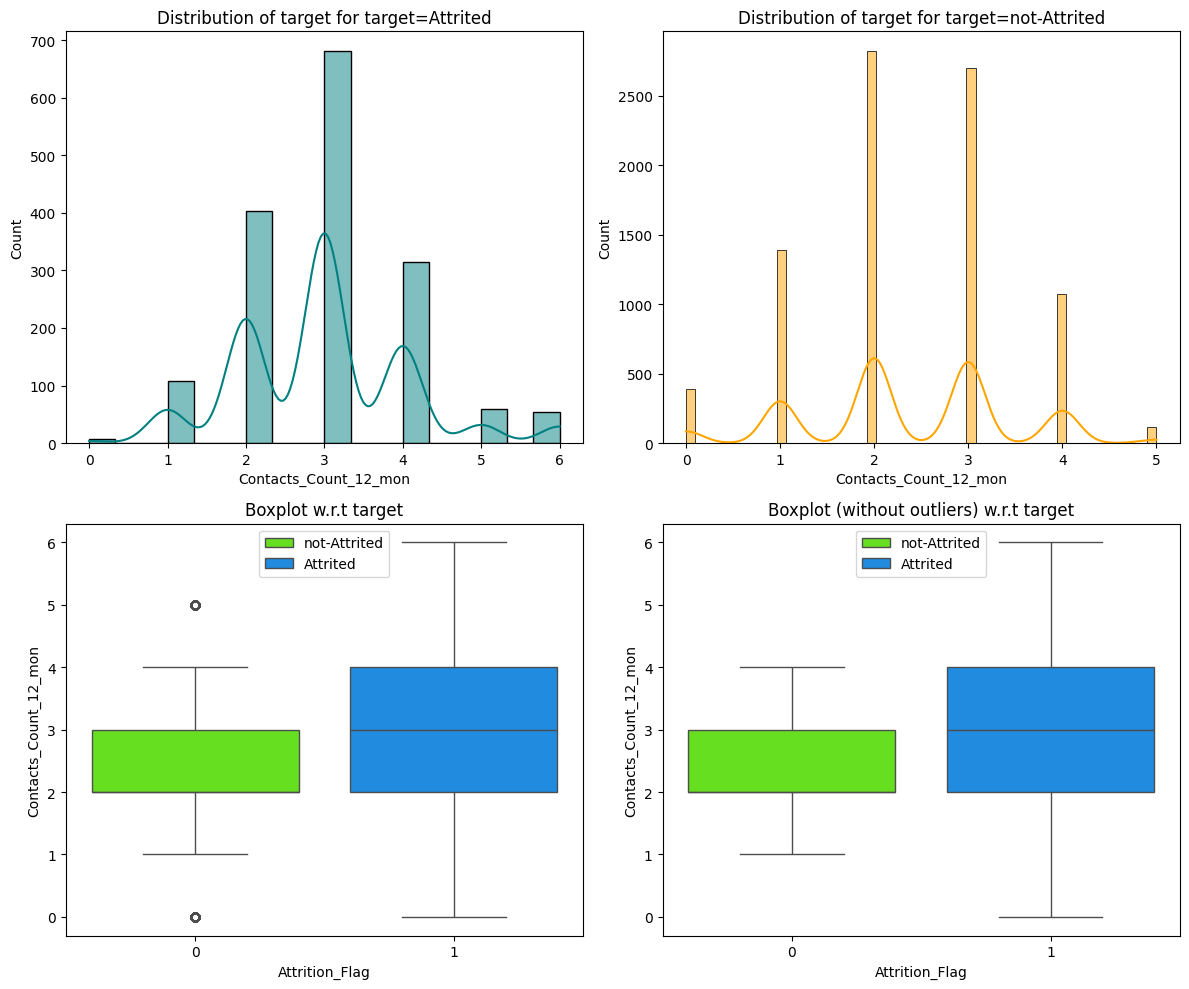

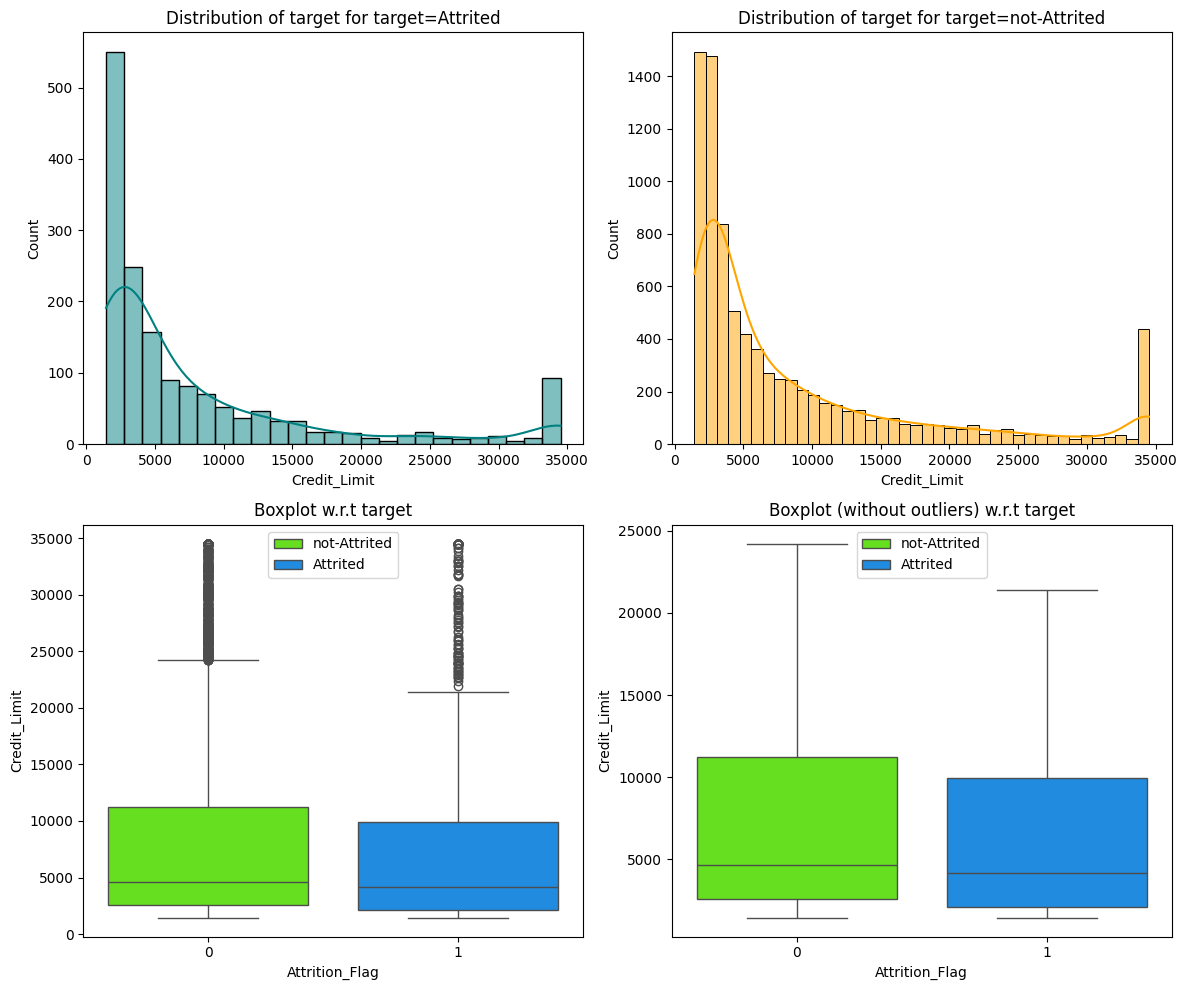

In [42]:
for i in data_encoded.columns[1:12]:
    distribution_plot_wrt_target(data_encoded, i, 'Attrition_Flag')

**Observations:**

- The conclusins made with the previous analysis are re-iterated by these plots

#### Let's do a pair plot to get some more visualization
- pair plot had to be broken up in smaller groups, so it can be read properly and rendered in html (for submission)

In [43]:
all_cols = data_encoded.columns.to_list()
all_cols

['Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Attrition_Flag']

In [44]:
column_groups = [
    ['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Attrition_Flag'],
    ['Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Attrition_Flag'],
    ['Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Attrition_Flag'],
    ['Total_Revolving_Bal', 'Avg_Open_To_Buy','Credit_Limit', 'Total_Amt_Chng_Q4_Q1', 'Attrition_Flag'],
    ['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Attrition_Flag'],
    ['Customer_Age', 'Months_on_book','Credit_Limit', 'Avg_Utilization_Ratio', 'Attrition_Flag' ]
]


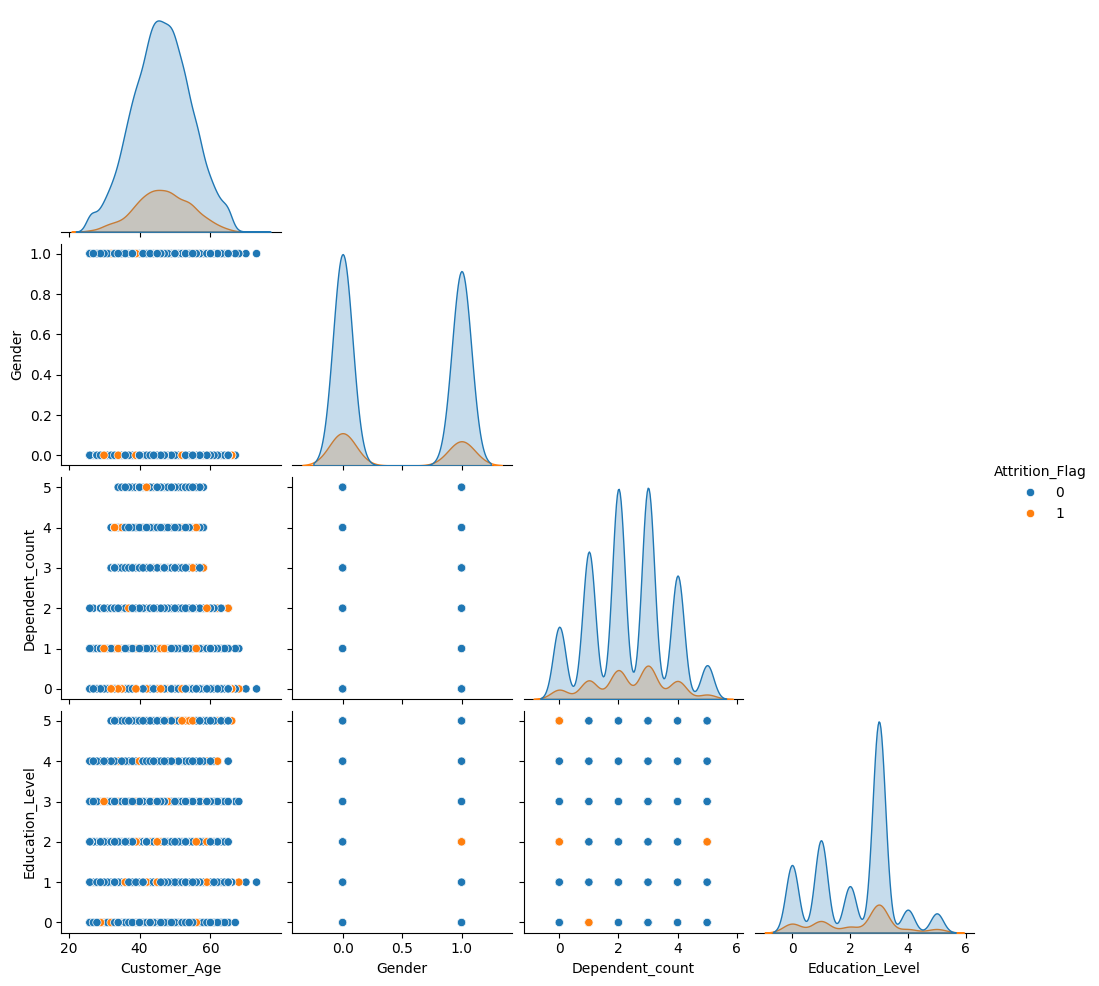

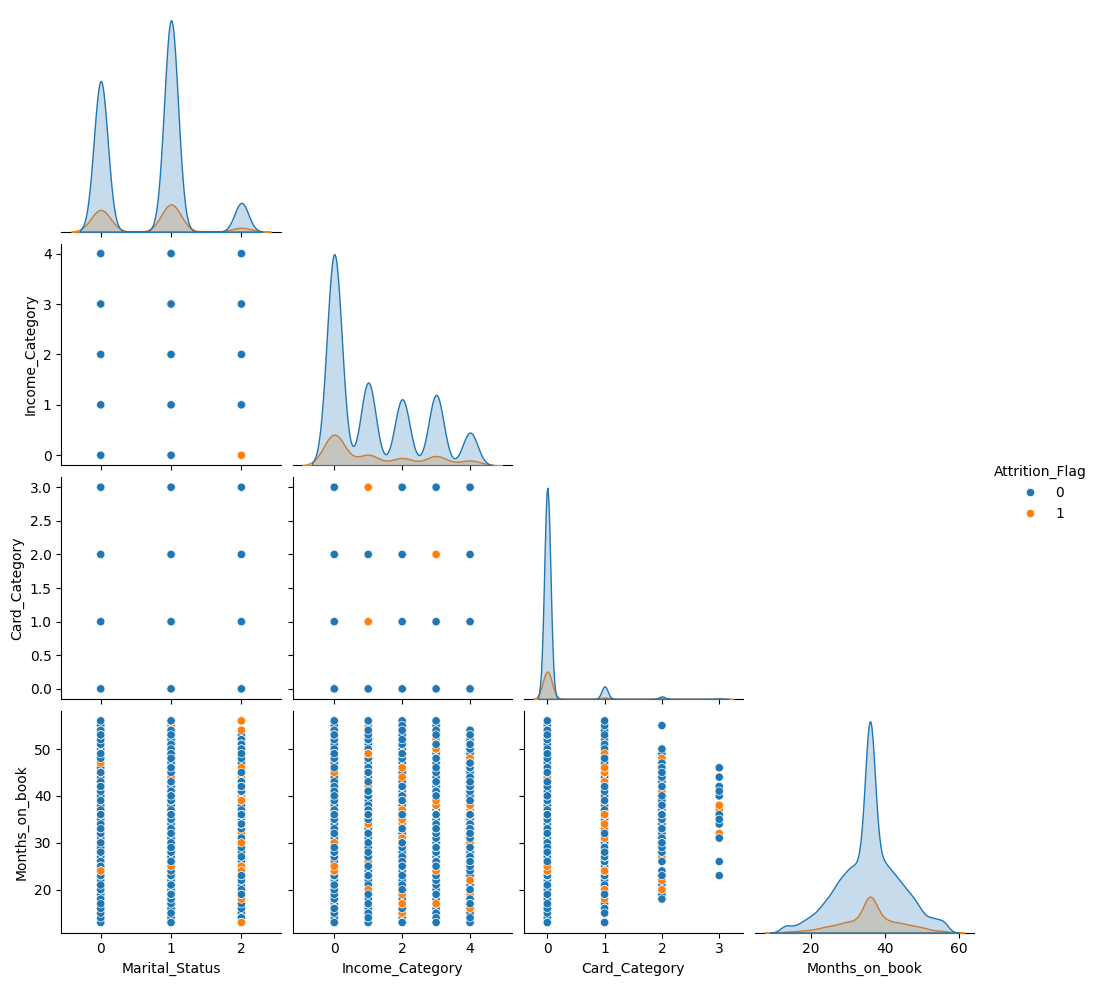

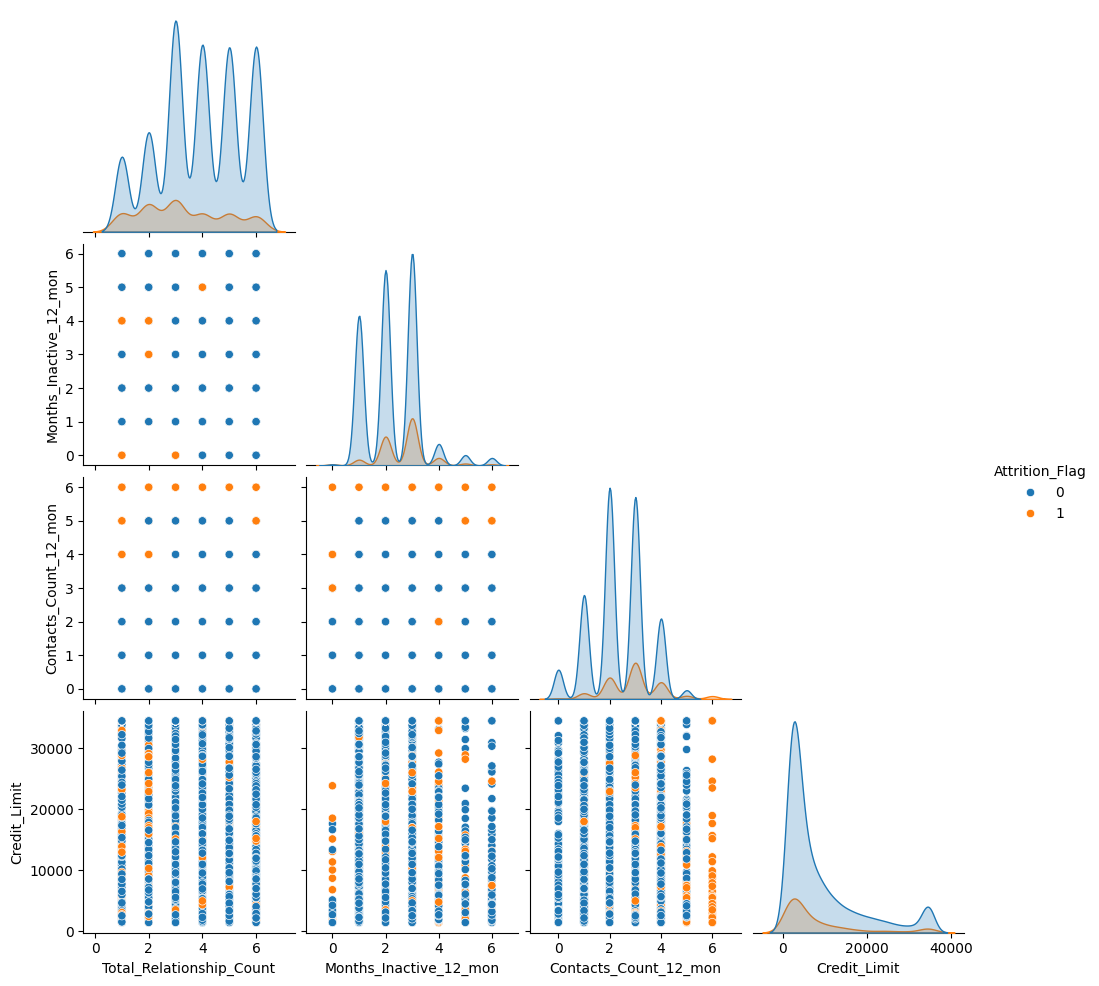

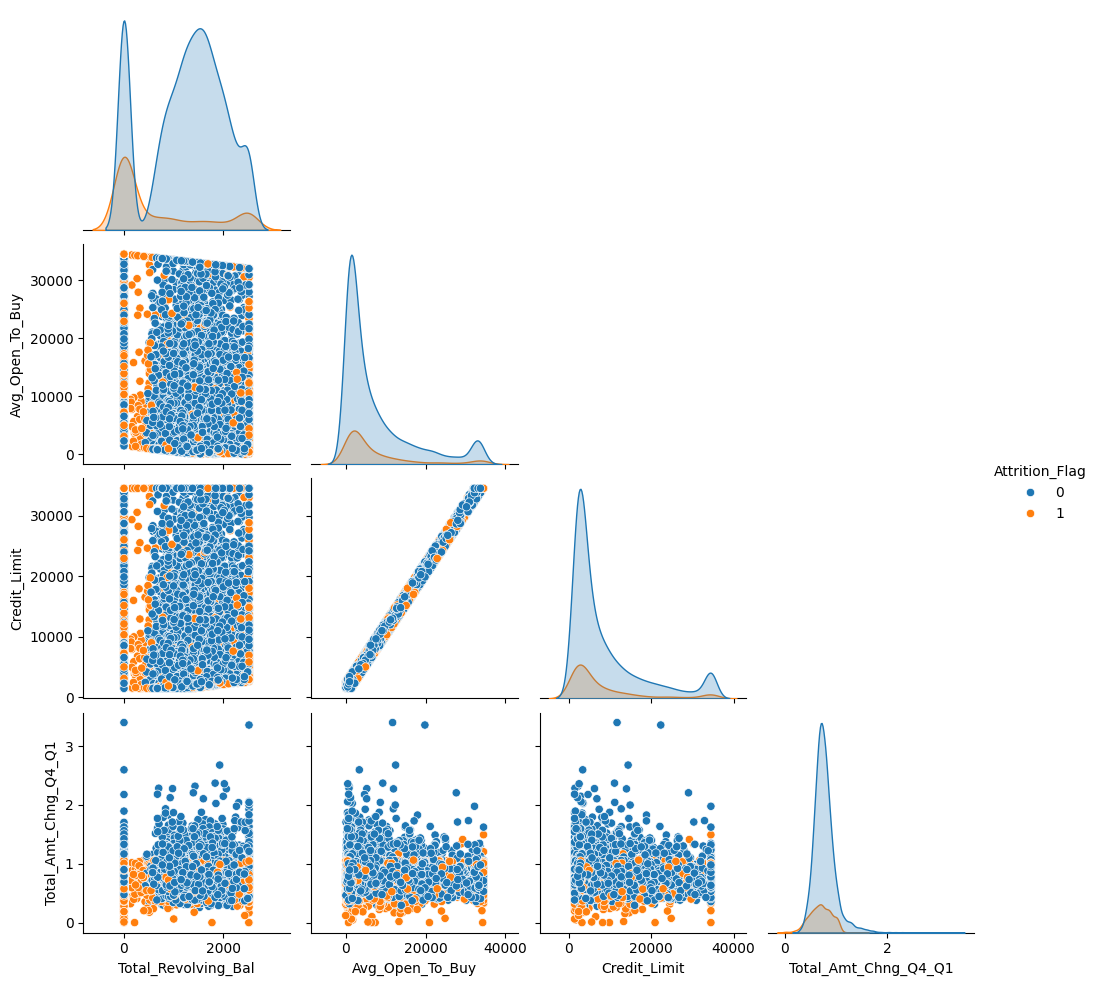

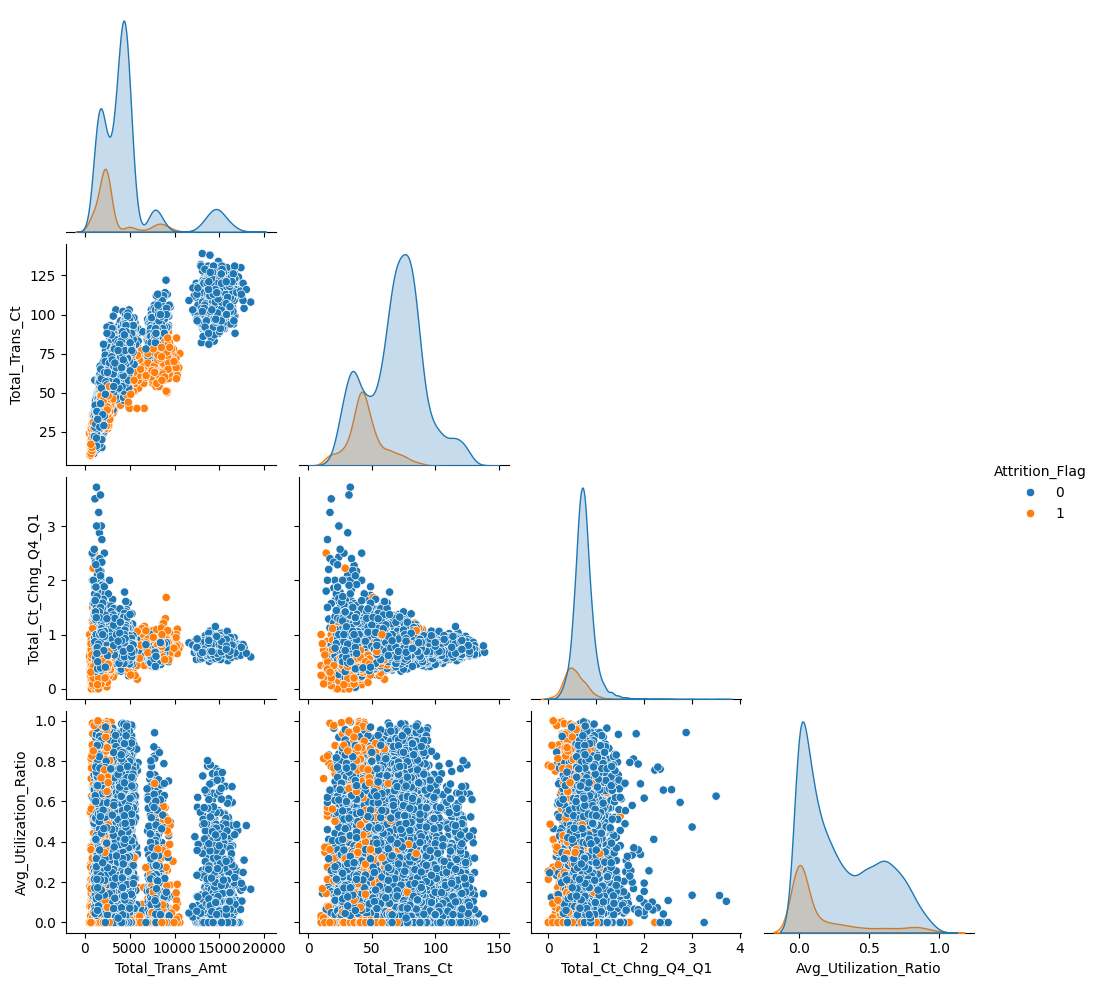

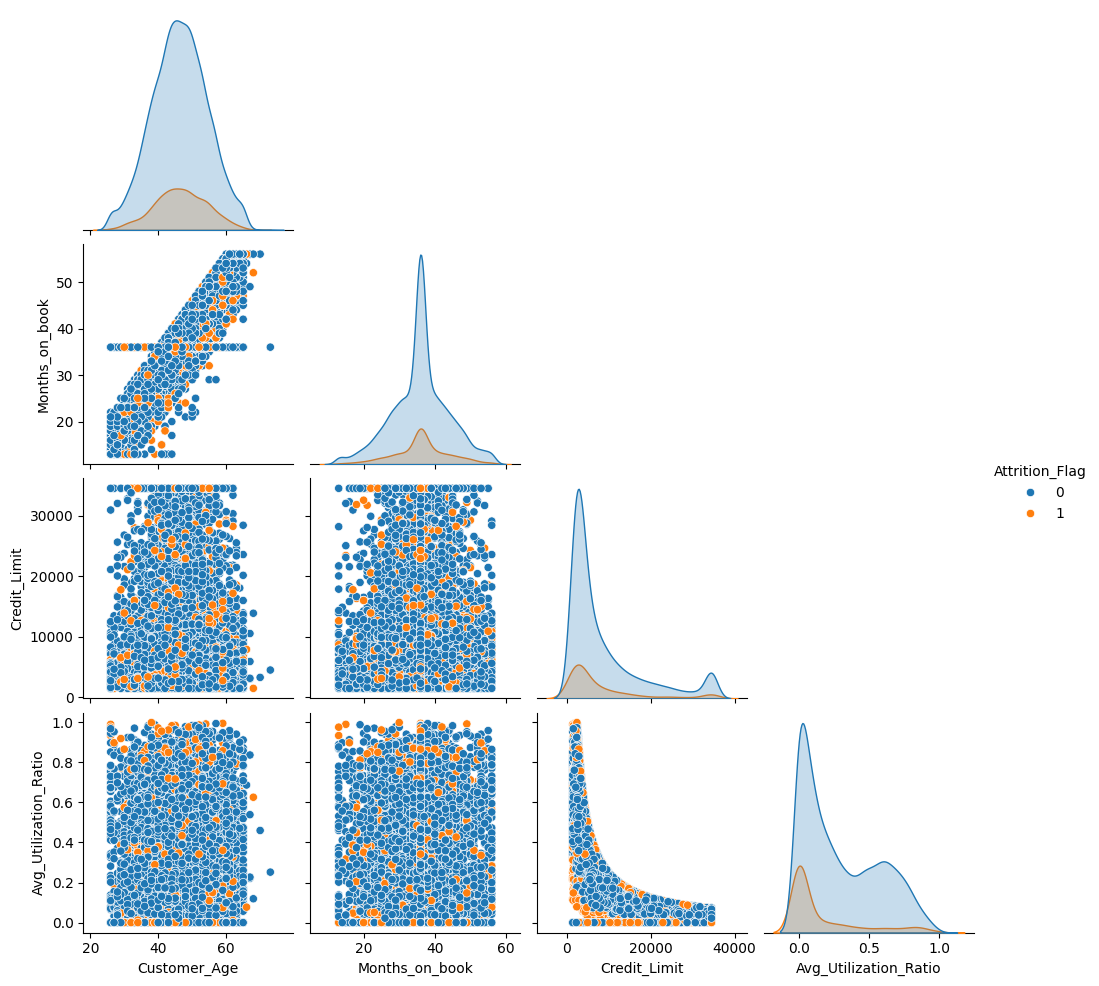

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display

for i, group in enumerate(column_groups):
    plt.figure(figsize=(10, 8))
    pair_plot = sns.pairplot(data_encoded[group], hue="Attrition_Flag", diag_kind='kde', corner=True);
    filename = f'pair_plot_group_{i+1}.png'
    pair_plot.savefig(filename)
    plt.close(pair_plot.fig)  # Close the figure associated with the pair plot


    # Display the saved image
    display(Image(filename=filename))


#### Analysis of Pair Plot




**KDE - AGE/AGE**

- Distribution of Age:

    - The peak of the blue line (representing the non-attrited customers) is significantly higher than the peak of the orange line (representing the attrited customers), suggesting that there are more non-attrited customers in general.
    - Both distributions are somewhat centered around the same age range, indicating that the age distribution for both attrited and non-attrited customers is similar.

- Age Range for Attrited Customers:

    - The orange distribution shows that attrited customers are more likely to be found in a specific age range. The peak of the orange line is lower, but the distribution suggests that attrited customers might have a higher density in the middle age ranges compared to non-attrited customers.


**KDE - Gender/Gender**  

- Gender Distribution:

    -  The graph shows two distinct peaks, indicating a clear separation between the genders in the data. The left peak represents female customers (0 on the x-axis), and the right peak represents male customers.
    - Both genders have similar distribution patterns with respect to the continuous variable on the x-axis, although the peaks suggest that there are more non-attrited customers (blue) in both gender groups.

- Attrition by Gender:

    - The orange lines, representing attrited customers, show that both male and female customers have some level of attrition. However, the peaks of the orange lines are much lower compared to the blue peaks, indicating fewer attrited customers in both gender groups.
    - The proportion of attrited customers (orange) seems similar for both genders, suggesting that gender might not be a significant factor in predicting customer attrition on its own.


**KDE - Dependent_Count/Dependent_Count**

- Distribution of Dependents:

    - The blue distribution indicates multiple peaks, suggesting that non-attrited customers have a varied number of dependents. There are prominent peaks at several points, indicating common dependent counts.
    - The orange distribution also shows peaks but is generally lower, indicating fewer attrited customers compared to non-attrited customers across different dependent counts.

- Attrition Across Dependent Counts:

    - Attrited customers (orange) are present across all dependent counts, but the peaks are much lower compared to non-attrited customers (blue).
    - Both distributions follow a similar pattern, but the density of non-attrited customers is significantly higher at each peak.

**KDE - Education_Level/Education_Level**

- Distribution of Education Levels:

    - The blue distribution, representing non-attrited customers, shows multiple peaks indicating that non-attrited customers come from various education levels. Notably, there are significant peaks at the "High School" (1), "College" (2), "Graduate" (3), and "Post-Graduate" (4) levels.
    - The orange distribution shows that attrited customers also span multiple education levels, but with lower density compared to non-attrited customers.

- Attrition Across Education Levels:

    - Uneducated (0): Both distributions show very low density at this level, indicating few customers fall into this category.
    - High School (1): There is a notable peak for non-attrited customers, indicating a larger proportion of high school-educated customers tend to stay.
    - College (2): This level shows a significant peak in the non-attrited distribution and a corresponding, albeit smaller, peak in the attrited distribution, suggesting college-educated customers have a moderate attrition rate.
    - Graduate (3): The highest peak in the non-attrited distribution is observed here, indicating that graduate-educated customers are the least likely to attrite.
    - Post-Graduate (4): There is a considerable peak for non-attrited customers and a smaller peak for attrited customers, suggesting that post-graduate customers also tend to stay, though not as strongly as graduate-level customers.
    - Doctorate (5): Both distributions show lower densities, but non-attrited customers still have a higher peak, indicating fewer doctorate-educated customers with a tendency to stay.

    - The highest non-attrited peak is at the "Graduate" level, indicating strong retention among customers with graduate education.
    - Attrited peaks are lower across all education levels, with slightly higher densities at the "College" and "Post-Graduate" levels, indicating moderate attrition.

**KDE - Income Category/Income Category**


- Distribution of Income Categories:

    - The blue distribution (non-attrited customers) shows a prominent peak at the "Less than $40K" income category, indicating a large proportion of customers in this income range who remain with the bank.
    - The orange distribution (attrited customers) is lower overall but follows a similar pattern with a peak at the "Less than $40K" category, though much smaller compared to the non-attrited distribution.

- Attrition Across Income Categories:

    - Less than $40K (0): The highest peak for non-attrited customers is here, suggesting that customers in this income category are more prevalent and tend to stay longer
    - $40K - $60K (1): Both distributions show a moderate peak, indicating that a reasonable proportion of customers in this income category remain, though attrition is also noticeable.

    - $60K - $80K (2): There is a significant presence of non-attrited customers, with a corresponding lower peak for attrited customers, suggesting moderate retention.
    - $80K - $120K (3): Similar to the $60K - $80K category, there is a substantial number of non-attrited customers, with a smaller attrited customer base.
    - $120K + (4): The distribution shows a smaller peak for both non-attrited and attrited customers, indicating fewer customers in this higher income category.

**KDE - Card_Category/Card_Category**

- Distribution of Card Categories:

    - The blue distribution (non-attrited customers) shows a prominent peak at the "Blue" card category, indicating a large proportion of customers who hold Blue cards tend to stay with the bank.
    - The orange distribution (attrited customers) also shows a peak at the "Blue" card category, though it is smaller than the blue peak, indicating attrition is also present but less significant compared to retention.

- Attrition Across Card Categories:

    - Blue (0): This category has the highest peak for non-attrited customers, suggesting Blue cardholders are more prevalent and likely to remain with the bank.
    - Silver (1): There is a small peak for both non-attrited and attrited customers, indicating a relatively smaller number of Silver cardholders with some attrition.
    - Gold (2): Both distributions show very small peaks, suggesting that Gold cardholders are less common, and attrition is minimal.
    - Platinum (3): Similar to the Gold category, there are very small peaks in both distributions, indicating few Platinum cardholders with minimal attrition.    

**KDE - Months_on_book/Months_on_book**

- Distribution of Months on Book:

    - The blue distribution (non-attrited customers) shows a prominent peak at a specific number of months, indicating a large proportion of customers tend to stay with the bank for that duration.
    - The orange distribution (attrited customers) also shows a peak at the same number of months, although it is lower than the blue peak, indicating attrition is also present but less significant compared to retention.

- Attrition Across Months on Book:

    -  The graph indicates that both attrited and non-attrited customers have a significant presence at the same peak, suggesting that customers tend to attrite or stay at a similar period in their tenure.
    - The spread of the blue distribution is wider compared to the orange distribution, suggesting that non-attrited customers tend to have a more extended tenure.

**KDE - Total_Relationship_Count/Total_Relationship_Count**

- Distribution of Total Relationship Count:

    - The blue distribution (non-attrited customers) shows multiple peaks, indicating that non-attrited customers have a varied number of relationships with the bank, with several specific counts being more common.
    - The orange distribution (attrited customers) follows a similar pattern but with lower density, indicating fewer attrited customers across different relationship counts.

- Attrition Across Relationship Counts:

    - Low Relationship Counts: The peaks in the lower counts (fewer relationships) show some attrition, suggesting that customers with fewer relationships are more likely to leave.
    - Mid Relationship Counts: The graph shows higher peaks for non-attrited customers, indicating stronger retention for customers with a moderate number of relationships.
    - High Relationship Counts: There are significant peaks in the higher relationship counts for non-attrited customers, suggesting that customers with more relationships tend to stay with the bank. The attrited customer distribution is much lower in these counts.

- Key Relationship Levels:

    - The highest peaks in the blue distribution are in the mid to high relationship counts, indicating that customers with more relationships tend to have higher retention.
    - The corresponding peaks in the orange distribution are lower, showing that customers with more relationships are less likely to attrite.

**KDE - Months_Inactive_12_mon/Months_Inactive_12_mon**

- Distribution of Inactive Months:

    - The blue distribution (non-attrited customers) shows multiple peaks, indicating varied inactivity periods among customers who stay with the bank.
    - The orange distribution (attrited customers) also has peaks but with lower density compared to the blue distribution, indicating fewer attrited customers across different inactive months.

- Attrition Across Inactive Months:

    - Low Inactivity (0-1 months): The peaks in both distributions suggest that customers who are rarely inactive are prevalent, but there is still a small percentage of attrited customers.
    - Moderate Inactivity (2-4 months): This range shows significant peaks in both distributions, indicating that customers with moderate inactivity are common, but there is also a noticeable attrition rate.
    - High Inactivity (5-12 months): The blue distribution shows decreasing peaks, indicating fewer non-attrited customers with higher inactivity. The orange distribution follows a similar pattern but with even lower peaks, suggesting that prolonged inactivity correlates with higher attrition.


**KDE - Contact_Count_12_month/Contract_Count_12_month**

- Distribution of Contact Counts:

    - The blue distribution (non-attrited customers) shows multiple prominent peaks, indicating that non-attrited customers tend to have certain common contact counts.
    - The orange distribution (attrited customers) also has peaks, but these are generally lower than the blue distribution, indicating fewer attrited customers across different contact counts.

- Attrition Across Contact Counts:

    - Low Contact Counts (1-2 contracts): The peaks in both distributions suggest that customers with 1 or 2 contacts are prevalent. However, there is a higher attrition rate in these lower contact counts.
    - Moderate Contact Counts (3-4 contracts): Significant peaks are observed in this range for non-attrited customers, indicating that having 3 to 4 contacts is common among customers who remain with the bank. The corresponding peaks for attrited customers are present but lower.
    - High Contact Counts (5-6 contacts): There are still noticeable peaks for non-attrited customers, suggesting a good number of customers maintain a high number of contacts and tend to stay. The orange distribution shows smaller peaks, indicating some attrition but less common in this range.
    - Very High Contract Counts (7+ contacts): There are small peaks for both distributions, indicating few customers fall into this category, but those who do are more likely to stay with the bank.


**KDE - Credit_limit/Credit_limit**

- Distribution of Credit Limits:

    - The blue distribution (non-attrited customers) shows a prominent peak at lower credit limits, indicating that a large proportion of customers with lower credit limits tend to stay with the bank.
    - The orange distribution (attrited customers) also shows a peak at lower credit limits, though it is smaller than the blue peak, indicating that attrition is present but less significant compared to retention at these credit limits.

- Attrition Across Credit Limits:

    -   Low Credit Limits: Both distributions show a high density at lower credit limits, suggesting that a significant number of customers with lower credit limits exist. However, the attrition rate is higher in this range.
    - Moderate to High Credit Limits: The blue distribution shows a steady decline, with a small peak at higher credit limits, indicating fewer non-attrited customers in this range. The orange distribution shows a similar trend but with lower density, indicating some attrition at higher credit limits.
    - Very High Credit Limits: There is a noticeable secondary peak in the blue distribution for very high credit limits, suggesting that customers with very high credit limits tend to stay with the bank. The orange distribution has a very low density in this range, indicating minimal attrition.

- Key Credit Limit Levels:

    - The highest peak in the blue distribution is at the lower credit limits, suggesting that customers with these credit limits are more common and tend to stay.
    - The corresponding peak in the orange distribution is lower but still significant, indicating that attrition is more likely in lower credit limits.
    - The secondary peak in the blue distribution at very high credit limits suggests that these customers are also more likely to stay.


**KDE - Total_Revolving_Bal/Total_Revolving_Bal**

- Distribution of Total Revolving Balance:

    - The blue distribution (non-attrited customers) shows two main peaks: one at a low revolving balance and another at a higher revolving balance.
    - The orange distribution (attrited customers) also shows peaks, but they are generally lower and more spread out compared to the blue distribution.

- Attrition Across Revolving Balances:

    - Low Revolving Balance: There is a significant peak in the blue distribution, indicating many non-attrited customers have low revolving balances. The orange distribution also has a peak here, though it is smaller, suggesting some attrition at low balances.
    - Moderate to High Revolving Balance: The blue distribution shows a large peak, indicating that a significant number of non-attrited customers maintain moderate to high revolving balances. The orange distribution shows a smaller peak in this range, indicating moderate attrition.
    - Very High Revolving Balance: Both distributions taper off at very high revolving balances, suggesting fewer customers in this range, with minimal attrition.

- Key Revolving Balance Levels:

    - The highest peak in the blue distribution is at the moderate to high revolving balances, suggesting that customers with these balances are more stable and tend to stay with the bank.
    - The corresponding peaks in the orange distribution are lower but indicate that attrition is present across all balance levels, particularly at low and moderate balances.

**KDE - Avg_Open_To_Buy/Avg_Open_To_Buy**

- Distribution of Average Open To Buy:

    - The blue distribution (non-attrited customers) shows a significant peak at lower available credit amounts, indicating that a large proportion of customers with lower average open to buy tend to stay with the bank.
    - The orange distribution (attrited customers) also shows a peak at lower available credit amounts, though it is smaller than the blue peak, indicating that attrition is present but less significant compared to retention at these levels.

- Attrition Across Available Credit Amounts:

    - Low Available Credit: Both distributions show a high density at lower available credit amounts, suggesting that a significant number of customers fall into this category. However, the attrition rate is higher in this range.
    - Moderate to High Available Credit: The blue distribution shows a steady decline with a small peak at higher available credit amounts, indicating fewer non-attrited customers in this range. The orange distribution shows a similar trend but with lower density, indicating some attrition at higher available credit levels.
    - Very High Available Credit: There is a noticeable secondary peak in the blue distribution for very high available credit amounts, suggesting that customers with very high average open to buy tend to stay with the bank. The orange distribution has a very low density in this range, indicating minimal attrition.

- Key Credit Levels:

    - The highest peak in the blue distribution is at the lower available credit amounts, suggesting that customers with these credit limits are more common and tend to stay.
    - The corresponding peak in the orange distribution is lower but still significant, indicating that attrition is more likely in lower available credit amounts.
    - The secondary peak in the blue distribution at very high available credit amounts suggests that these customers are also more likely to stay.


**KDE - Total_Amt_Chng_Q4_Q1/Total_Amt_Chng_Q4_Q1**

- Distribution of Total Amount Change:

    - The blue distribution (non-attrited customers) shows a prominent peak at a specific change amount, indicating that a large proportion of customers who remain with the bank have a certain level of change in their spending from Q4 to Q1.
    - The orange distribution (attrited customers) also shows a peak at a similar change amount but is generally lower than the blue peak, indicating fewer attrited customers at this change level.

- Attrition Across Amount Changes:

    - Low to Moderate Change: There is a significant peak in the blue distribution at a low to moderate change amount, indicating many non-attrited customers fall within this range. The orange distribution also has a peak here, though it is smaller, suggesting some attrition in this range.
    - High Change: Both distributions show a decline at higher change amounts, suggesting fewer customers experience a high change in their spending from Q4 to Q1. The density of attrited customers is lower in this range

**KDE - Total_Trans_Amt/Total_Trans_Amt**

- Distribution of Total Transaction Amount:

    - The blue distribution (non-attrited customers) shows a prominent peak at a moderate transaction amount, indicating that a large proportion of customers who remain with the bank have a certain level of transaction activity.
    - The orange distribution (attrited customers) also shows a peak at a similar transaction amount but is generally lower than the blue peak, indicating fewer attrited customers at this transaction level.

- Attrition Across Transaction Amounts:

    - Low to Moderate Transaction Amounts: There is a significant peak in the blue distribution at low to moderate transaction amounts, indicating many non-attrited customers fall within this range. The orange distribution also has a peak here, though it is smaller, suggesting some attrition in this range.
    - High Transaction Amounts: Both distributions show a decline at higher transaction amounts, suggesting fewer customers experience high transaction volumes. The density of attrited customers is lower in this range.

- Key Transaction Amount Levels:

    - The highest peak in the blue distribution suggests that customers with moderate transaction amounts are more common and tend to stay.
    - The corresponding peak in the orange distribution, though lower, indicates that attrition is present but less significant compared to retention at these transaction levels.
    - There are smaller peaks in both distributions at higher transaction amounts, indicating a subset of customers with high transaction activity who tend to stay.



**KDE - Total_Trans_CT/Total_Trans_CT**

- Distribution of Total Transaction Count:

    - The blue distribution (non-attrited customers) shows a prominent peak at a moderate to high transaction count, indicating that a large proportion of customers who remain with the bank engage in frequent transactions.
    - The orange distribution (attrited customers) also shows a peak at a lower transaction count but is generally lower than the blue peak, indicating fewer attrited customers at this transaction level.

- Attrition Across Transaction Counts:

    - Low Transaction Counts: Both distributions show a higher density at lower transaction counts, but the peak in the orange distribution is more significant, indicating a higher attrition rate among customers with fewer transactions.
    - Moderate to High Transaction Counts: The blue distribution shows a large peak, indicating that a significant number of non-attrited customers maintain moderate to high transaction counts. The orange distribution shows a smaller peak in this range, indicating lower attrition.

-   Key Transaction Count Levels:

    - The highest peak in the blue distribution suggests that customers with moderate to high transaction counts are more common and tend to stay.
    - The corresponding peak in the orange distribution, though lower, indicates that attrition is present but less significant compared to retention at these transaction counts.

**KDE - Total_CT_Chng_Q4_Q1/Total_CT_Chng_Q4_Q1**   


- Distribution of Total Count Change:

    - The blue distribution (non-attrited customers) shows a significant peak at a specific change amount, indicating that a large proportion of customers who remain with the bank have a certain level of change in their transaction counts from Q4 to Q1.
    - The orange distribution (attrited customers) also shows a peak at a similar change amount but is generally lower than the blue peak, indicating fewer attrited customers at this change level.

- Attrition Across Change Amounts:

    -   Low Change Amounts: Both distributions show high density at lower change amounts, but the peak in the orange distribution is more significant, indicating a higher attrition rate among customers with smaller changes in their transaction counts.
    - Moderate to High Change Amounts: The blue distribution shows a pronounced peak, indicating that customers with moderate changes in their transaction counts are more likely to stay. The orange distribution has a lower peak in this range, indicating less attrition.

- Key Change Levels:

    - The highest peak in the blue distribution suggests that customers with moderate changes in their transaction counts from Q4 to Q1 are more common and tend to stay.
    - The corresponding peak in the orange distribution, though lower, indicates that attrition is present but less significant compared to retention at these change levels.

**KDE - Avg_Utilization_Ratio/Avg_Utilization_Ratio**

- Distribution of Average Utilization Ratio:

    - The blue distribution (non-attrited customers) shows a significant peak at low utilization ratios, indicating that a large proportion of customers who remain with the bank use a small portion of their available credit.
    - The orange distribution (attrited customers) also shows a peak at low utilization ratios, but this peak is generally lower and more spread out compared to the blue peak, indicating fewer attrited customers at these levels.

- Attrition Across Utilization Ratios:

    - Low Utilization Ratios (0.0 - 0.2): Both distributions show high density at lower utilization ratios. However, the peak in the orange distribution suggests a higher attrition rate among customers who utilize a small portion of their available credit.
    - Moderate Utilization Ratios (0.2 - 0.5): The blue distribution maintains a notable density, indicating many non-attrited customers fall within this range. The orange distribution has a smaller presence in this range, suggesting moderate attrition.
    - High Utilization Ratios (0.5 - 1.0): The density for both distributions decreases as the utilization ratio increases. There is a slight rise in the blue distribution, indicating some non-attrited customers maintain higher utilization ratios. The orange distribution shows minimal presence, indicating very low attrition among customers with high utilization ratios.

- Key Utilization Ratio Levels:

    - The highest peak in the blue distribution suggests that customers with very low utilization ratios are more common and tend to stay.
    - The peak in the orange distribution, though lower, indicates that attrition is more noticeable at very low utilization ratios.
    - Moderate to high utilization ratios show a stable retention rate with minimal attrition.

**Scatter - Customer_Age/Months_on_book**

- General Distribution:

    - There is a visible pattern that as customer age increases, the months on book also tend to increase, indicating a positive correlation between age and the length of time customers have been with the bank.

- Attrited Customers:

    - The orange points (attrited customers) are spread across different ages and months on book. However, there seems to be a higher concentration of orange points in the lower months on book (20-30 months) range. This suggests that long term customers are less likely to attrite.

**Scatter - Total_Transaction_Amt/Total_Transaction_CT**

- Customer Clusters:

    - There are two distinct clusters of customers in the scatter plot. One cluster is concentrated towards the lower end of the Total Transaction Amount and Count, and the other is towards the higher end.

- Attrited Customers (Orange Dots):

    - A significant number of attrited customers are concentrated in the lower transaction count and amount range. This indicates that customers with fewer and lower-value transactions are more likely to attrite.
    - There are fewer orange dots in the higher transaction count and amount range, indicating lower attrition among customers with higher engagement in terms of transaction count and amount.

- Non-Attrited Customers (Blue Dots):

    - Non-attrited customers are present in both clusters, but there is a higher concentration of blue dots in the higher transaction count and amount range. This suggests that customers with higher transaction activity tend to stay with the bank.
    - The presence of blue dots in the lower transaction range indicates that not all customers with low transaction activity attrite; however, they are more at risk.


**Scatter Credit_Limit/Avg_Open_to_Buy**

- Linear Relationship:

    - The scatter plot shows a strong linear relationship between Credit Limit and Average Open to Buy. This is expected because Average Open to Buy is directly influenced by the credit limit.

- Attrited Customers (Orange Dots):

    - Attrited customers are dispersed throughout the entire range of Credit Limits and Average Open to Buy values. However, there seems to be a slightly higher concentration of orange dots at lower credit limits.
    - The presence of orange dots along the entire line indicates that attrition is not significantly impacted by the credit limit alone.

- Non-Attrited Customers (Blue Dots):

    - Non-attrited customers are also spread across the entire range of Credit Limits and Average Open to Buy values, but there is a dense concentration of blue dots indicating that most customers tend to stay irrespective of their credit limit.

**Scatter - Credit_Limit/Total_Revolving_Balance**

- Distribution and Density:

    - The plot shows a dense concentration of blue dots (non-attrited customers) throughout the credit limit and total revolving balance ranges, indicating a stable customer base with varying credit limits and balances.
    - The orange dots (attrited customers) are more concentrated towards the bottom of the plot, indicating lower total revolving balances relative to their credit limits.

- Attrition Patterns:

    - A significant number of attrited customers have low total revolving balances in comparison to their credit limits. This suggests that customers who underutilize their available credit may be more likely to attrite.
    - Non-attrited customers are more evenly spread across the credit limit and total revolving balance spectrum, suggesting that customers who maintain a balance closer to their credit limit are more stable.

- Credit Utilization:

    - The plot highlights that lower credit utilization (total revolving balance/credit limit) is associated with higher attrition. Customers who do not use their credit limit extensively are at a higher risk of leaving.
    - Higher credit utilization seems to correlate with customer retention, as indicated by the spread of blue dots across higher revolving balances.

**Scatter - Credit_Limit/Avg_Utilization_Ratio**

- Distribution and Density:

    - The plot shows a high density of both blue and orange dots at lower credit limits, indicating that most customers have lower credit limits.
    - As the credit limit increases, the density of both blue and orange dots decreases, indicating fewer customers have higher credit limits.

- Attrition Patterns:

    - Attrited customers (orange dots) are more concentrated at lower credit limits and higher utilization ratios. This suggests that customers with lower credit limits and higher utilization ratios are more likely to attrite.
    - Non-attrited customers (blue dots) are spread more evenly across the range of credit limits but still show higher concentration at lower credit limits. This indicates that customers with higher credit limits and lower utilization ratios tend to stay with the bank.

- Utilization Ratio Trends:

    - At lower credit limits, there is a wide range of utilization ratios for both attrited and non-attrited customers, but attrited customers show a tendency towards higher utilization ratios.
    - As credit limits increase, the utilization ratios generally decrease for both attrited and non-attrited customers, indicating that customers with higher credit limits tend to use a smaller portion of their available credit

#### Questions Posed:

#####total transaction amount distributed

In [46]:
data_encoded['Total_Trans_Amt'].describe()

count    10127.000000
mean      4404.086304
std       3397.129254
min        510.000000
25%       2155.500000
50%       3899.000000
75%       4741.000000
max      18484.000000
Name: Total_Trans_Amt, dtype: float64

Observation:  
Mean is 3899

##### distribution of the level of education of customers

In [47]:
data_encoded['Education_Level'].value_counts(1)

Education_Level
3    0.458872
1    0.198776
0    0.146835
2    0.100030
4    0.050953
5    0.044534
Name: proportion, dtype: float64

Observation:
4 and 2 in descending order (graduate & high school)

##### distribution of the level of income of customers

In [48]:
data_encoded['Income_Category'].value_counts(1)

Income_Category
0    0.461440
1    0.176755
3    0.151575
2    0.138442
4    0.071788
Name: proportion, dtype: float64

Observation:

Less than 40K & ($40K - 60K) are most common



##### How does the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)?

In [49]:
summary_stats = data_encoded.groupby('Attrition_Flag')['Total_Ct_Chng_Q4_Q1'].describe()
print(summary_stats)

                 count      mean       std    min    25%    50%    75%    max
Attrition_Flag                                                               
0               8500.0  0.742434  0.228054  0.028  0.617  0.721  0.833  3.714
1               1627.0  0.554386  0.226854  0.000  0.400  0.531  0.692  2.500


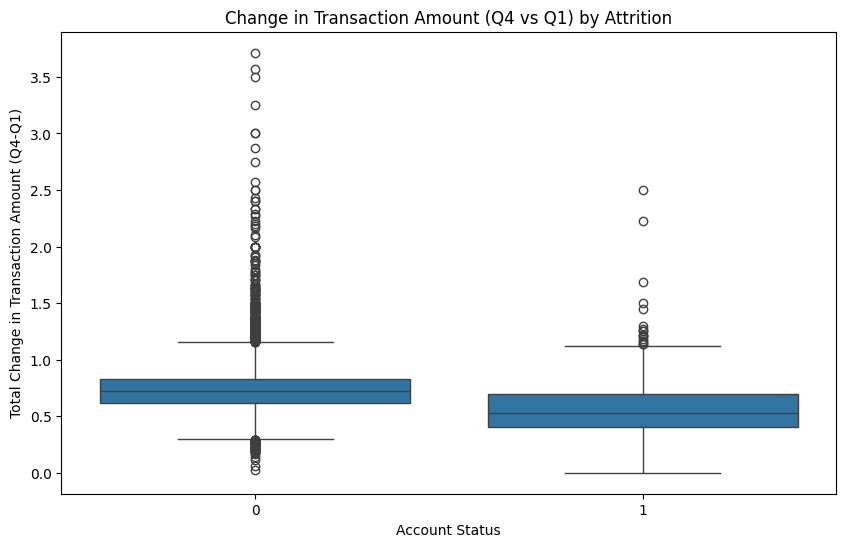

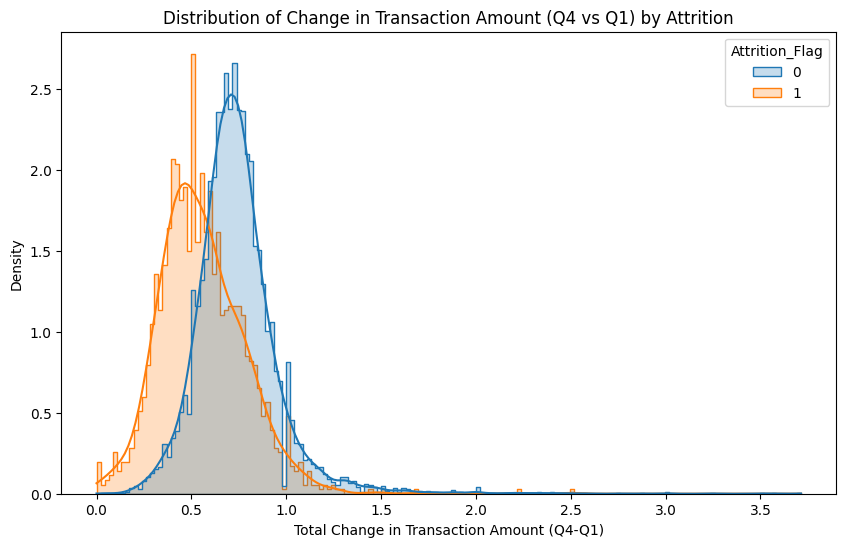

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition_Flag', y='Total_Ct_Chng_Q4_Q1', data=data_encoded)
plt.title('Change in Transaction Amount (Q4 vs Q1) by Attrition')
plt.xlabel('Account Status')
plt.ylabel('Total Change in Transaction Amount (Q4-Q1)')
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data_encoded, x='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag', kde=True, element='step', stat='density', common_norm=False)
plt.title('Distribution of Change in Transaction Amount (Q4 vs Q1) by Attrition')
plt.xlabel('Total Change in Transaction Amount (Q4-Q1)')
plt.ylabel('Density')
plt.show()


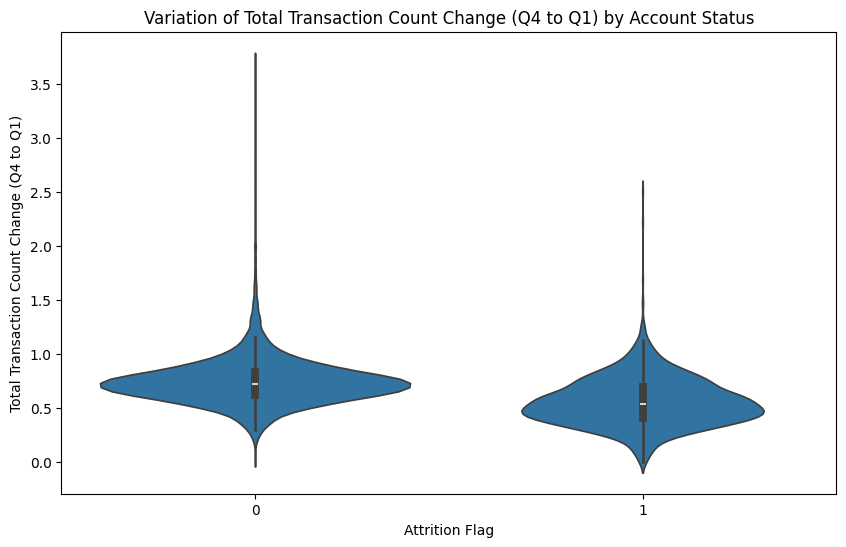

In [51]:
# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Attrition_Flag', y='Total_Ct_Chng_Q4_Q1', data=data_encoded)
plt.title('Variation of Total Transaction Count Change (Q4 to Q1) by Account Status')
plt.xlabel('Attrition Flag')
plt.ylabel('Total Transaction Count Change (Q4 to Q1)')
plt.show()

**Observation:**

From box plot:


- The median line for existing customers (0) is higher than for attrited customers (1), indicating that the change in transaction amount is generally higher for existing customers.
- The whiskers for existing customers extend higher than those for attrited customers, indicating that existing customers have a broader range of transaction amount changes.
- Both groups have a similar lower range.


The density plot shows that:

- Both existing and attrited customers exhibit similar central tendencies (peaks) around a 0.5 change in transaction amount.
- Existing customers have a broader and more variable range of changes, with some experiencing significantly higher increases in transaction amounts.
- Attrited customers show a more concentrated distribution with fewer extreme changes.


The Violin plot shows that:


- Attrition Flag 0: The distribution has a longer upper tail, indicating that while most customers have lower values of Total_Ct_Chng_Q4_Q1, there are some customers with significantly higher changes in transaction counts.


- Attrition Flag 1: The median is slightly lower than for non-churned customers, suggesting that attrited customers tend to have a smaller change in transaction count between Q4 and Q1.


These insights can help Thera Bank identify patterns in transaction behavior related to customer attrition. The broader range and higher variability in existing customers' transaction changes suggest potential areas for targeted interventions to retain customers showing early signs of increased activity.

##### What are the attributes that have a strong correlation with each other ?

In [52]:
corr_matrix = data_encoded.corr()

# Define a function to highlight high positive and negative correlations
def highlight_high_corr(val):
    color = ''
    if val > 0.7:
        color = 'background-color: lightgreen'
    elif val < -0.7:
        color = 'background-color: lightcoral'
    return color

# Apply the function to the correlation matrix
#styled_corr_matrix = corr_matrix.style.applymap(highlight_high_corr).background_gradient(cmap='coolwarm', axis=None)
styled_corr_matrix = corr_matrix.style.applymap(highlight_high_corr)

# Display the styled correlation matrix
styled_corr_matrix

Observation:

High Correlation is observed with:

- Income_category/Gender
- Customer_Age/Months_on_book
- Average_open_to_buy/Credit_limit
- Total_transaction_amount/Total_transaction_count

## Data Pre-processing to get ready for Model Building

### Outliers

#### Why Treat Outliers:

- Outliers can disproportionately influence the training process, skewing the model's understanding of the data. Treating them ensures that the model's predictions are not overly influenced by extreme values.

- Some ensemble methods, especially those using weaker learners like decision trees, can be affected by outliers. Treating outliers can help improve the accuracy of these models.

- Ensemble methods, such as Random Forest, Gradient Boosting, and Bagging, can be robust to outliers. However, understanding their impact and deciding whether to treat outliers can still be beneficial.

  - Random Forest is generally robust to outliers because it builds multiple decision trees using different subsets of data. However, extreme outliers can still affect individual trees.
  - Gradient Boosting can be more sensitive to outliers, as it builds trees sequentially, and outliers can influence the residuals used in subsequent trees.
  - Like Random Forest, Bagging is relatively robust to outliers but can benefit from outlier treatment to ensure stable performance across all models in the ensemble.

#### How to treat outliers:

Removing Outliers:

- For datasets with many observations, removing outliers can be effective. However, this may not be ideal for smaller datasets or when outliers contain valuable information.

Transformation:

- Applying transformations like logarithmic, square root, or Box-Cox can reduce the impact of outliers by compressing the range of the data.

Clipping:

- Clipping sets outliers to a specified minimum or maximum value, reducing their impact without removing them from the dataset.
Imputation:

- Replacing outliers with the mean, median, or another statistical measure can mitigate their influence while retaining the data structure.

#### Our dataset Outliers from Previous analysis

- Credit_Limit: Credit Limit on the Credit Card: **many outliers**, right skewed. Average about 8K

- Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months): Right Skewed with **many outilers**

- Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter: **Many outliers**

- Total_Trans_Amt: Total Transaction Amount (Last 12 months): meant around 4K, right skewed, **many outliers**



**We will use the clipping method to cap outliers**

let's write a function to handle this


1. List of Columns to Cap:

- rows_to_cap = ['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt'] specifies the columns where you want to cap the upper outliers.

2. Function to Cap Outliers:

- cap_outliers(df, column, cap_value) is a function that caps values in the specified column of the DataFrame df at cap_value.
- It uses np.where to replace values greater than cap_value with cap_value. if not, then put back the value of df[column]

3. Apply Function to Each Column:

- The for loop iterates over each column in rows_to_cap, calculates the 90th percentile value for that column, and applies the cap_outliers function to cap the values.


**explanation for**
```python
np.where(df[column] > cap_value, cap_value, df[column])
```
- if value is > cap_value, replace with cap_value
- if value !> cap_value, then keep the origian value from df[column]

##### first create the outlier detection boxplot

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

def detect_outlier(data, feature, figsize=(8, 4)):
    """
    Boxplot for outlier detection.

    data: DataFrame
    feature: DataFrame column name (str)
    figsize: size of figure (default (12,7))
    """
    plt.figure(figsize=figsize)
    sns.boxplot(
        data=data, x=feature, showmeans=True, color="violet"
    )
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

# Example usage:
# detect_outlier(data=df, feature='total_ct_change_Q4_Q1')



#### Create a function and use it to verify the outliers

Before Outlier Treatment: X_Train for column Credit_Limit


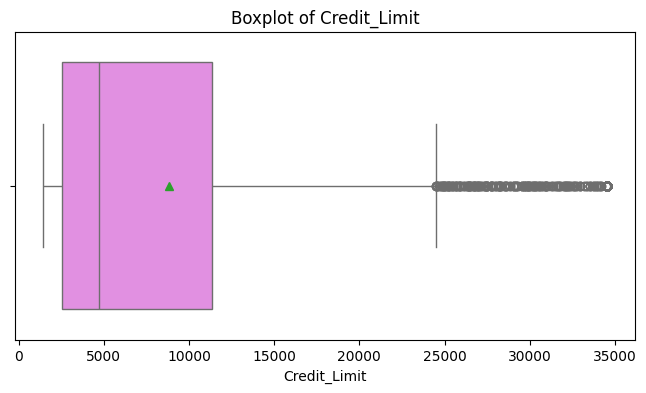

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Before Outlier Treatment: X_Train for column Avg_Open_To_Buy


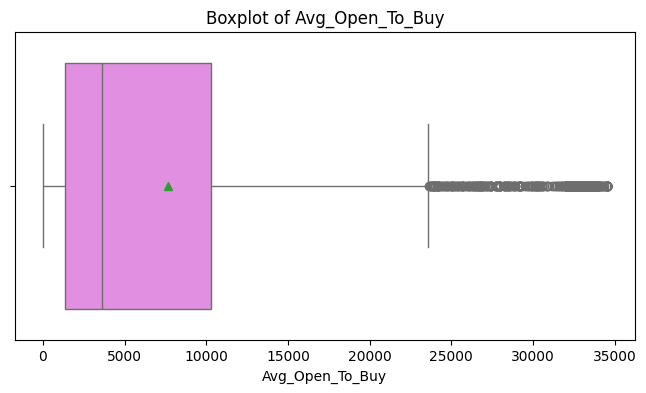

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Before Outlier Treatment: X_Train for column Total_Amt_Chng_Q4_Q1


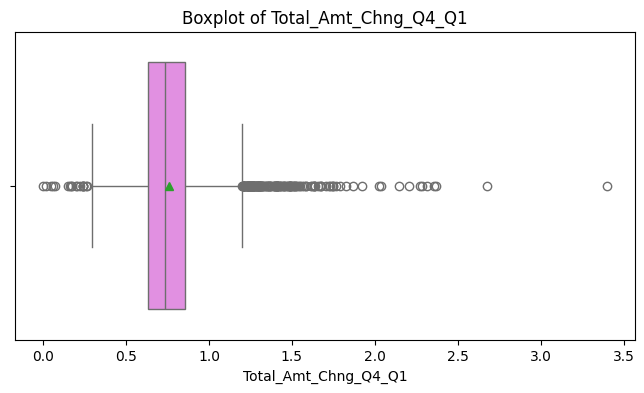

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Before Outlier Treatment: X_Train for column Total_Trans_Amt


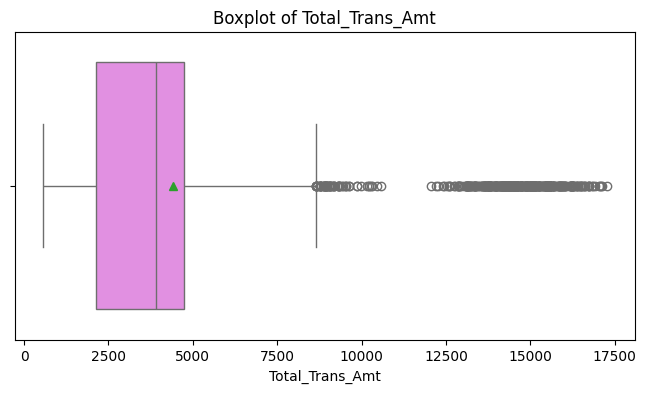

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Before Outlier Treatment: X_val for column Credit_Limit


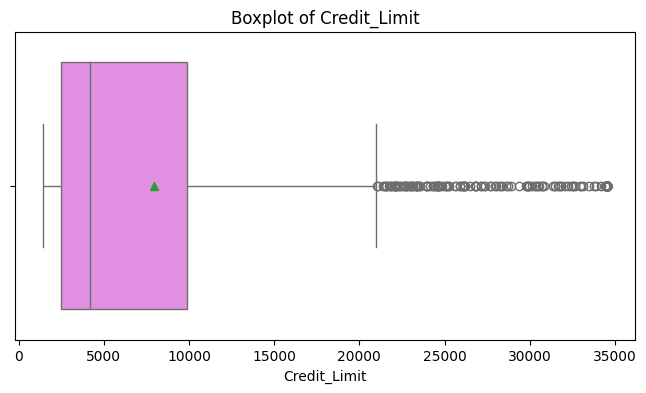

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Before Outlier Treatment: X_val for column Avg_Open_To_Buy


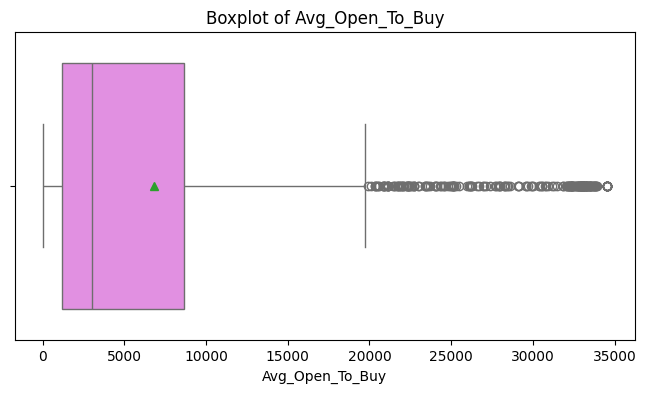

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Before Outlier Treatment: X_val for column Total_Amt_Chng_Q4_Q1


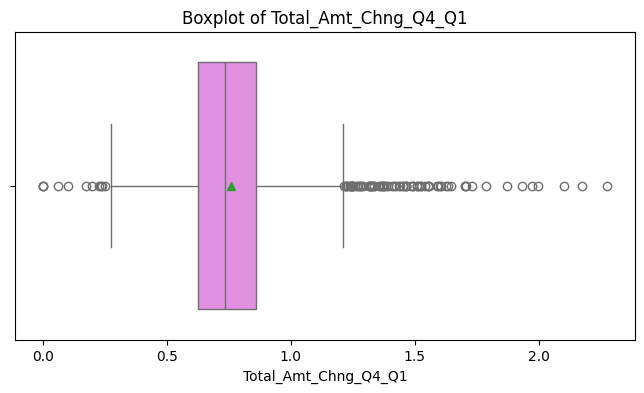

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Before Outlier Treatment: X_val for column Total_Trans_Amt


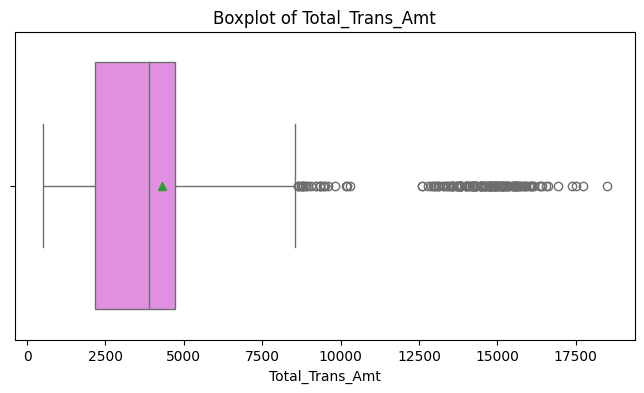

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Before Outlier Treatment: X_test for column Credit_Limit


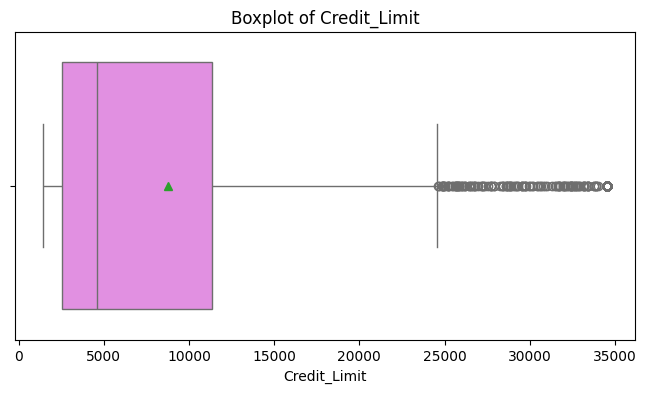

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Before Outlier Treatment: X_test for column Avg_Open_To_Buy


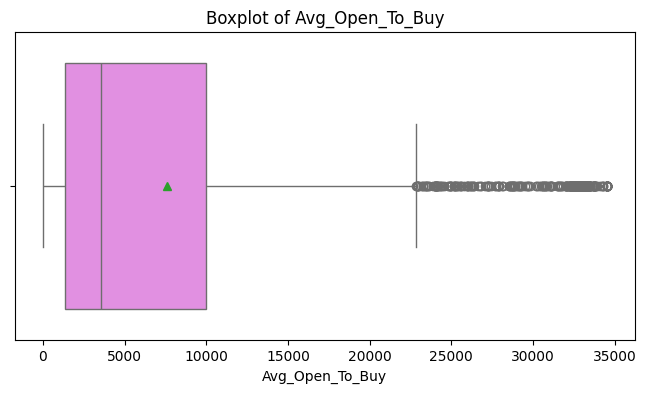

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Before Outlier Treatment: X_test for column Total_Amt_Chng_Q4_Q1


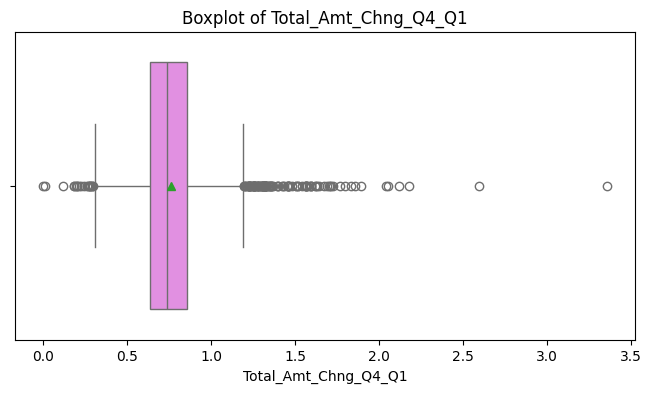

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Before Outlier Treatment: X_test for column Total_Trans_Amt


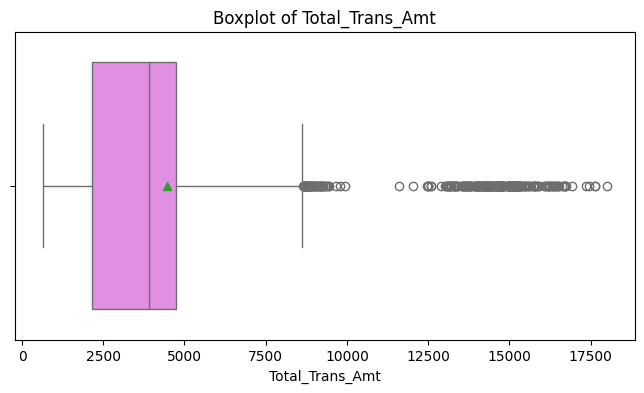

----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [54]:
# create a list with the dataframes to check
dfs_to_check = [X_train, X_val, X_test]
df_name = ['X_Train', 'X_val', 'X_test']
columns_to_cap = ['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt']

# run the function
i = 0
for df in dfs_to_check:
    for column in columns_to_cap:
        print(f"Before Outlier Treatment: {df_name[i]} for column {column}")
        detect_outlier(df, column)
        print('--'*80)
    i+=1

### Treat Outliers

##### Create temporary df, so that data_encoded df does not get overwritten, so we can try different values of capping easily


In [55]:
temp_X_train = X_train.copy()
temp_X_val = X_val.copy()
temp_X_test = X_test.copy()

In [56]:
# Create list for columns that we will cap for outliers
columns_to_cap = ['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt']

# Define function for capping
def cap_outliers(df, column, upper_cap_value, lower_cap_value):
    df[column] = np.where(df[column] > upper_cap_value, upper_cap_value, df[column])
    df[column] = np.where(df[column] < lower_cap_value, lower_cap_value, df[column])
    return df

# Calculate quantiles from the training data
quantiles = {}
for column in columns_to_cap:
    upper_cap = temp_X_train[column].quantile(0.877)
    lower_cap = temp_X_train[column].quantile(0.05)
    quantiles[column] = (upper_cap, lower_cap)

# Apply function to cap outliers in all datasets
for column in columns_to_cap:
    upper_cap_value, lower_cap_value = quantiles[column]
    temp_X_train = cap_outliers(temp_X_train, column, upper_cap_value, lower_cap_value)
    temp_X_val = cap_outliers(temp_X_val, column, upper_cap_value, lower_cap_value)
    temp_X_test = cap_outliers(temp_X_test, column, upper_cap_value, lower_cap_value)



##### doublecheck for outliers after outlier treatment

After Outlier Treatment: temp_X_train for column Credit_Limit


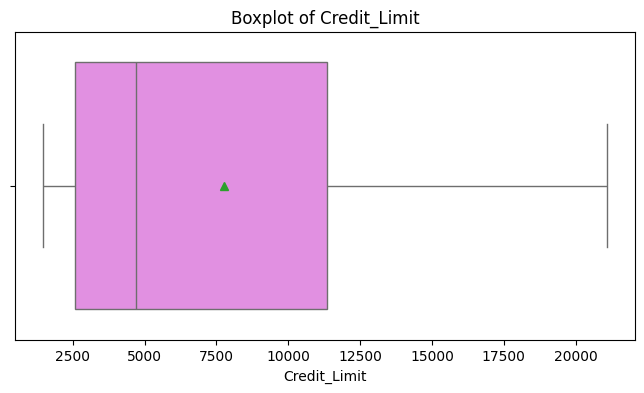

----------------------------------------------------------------------------------------------------------------------------------------------------------------
After Outlier Treatment: temp_X_train for column Avg_Open_To_Buy


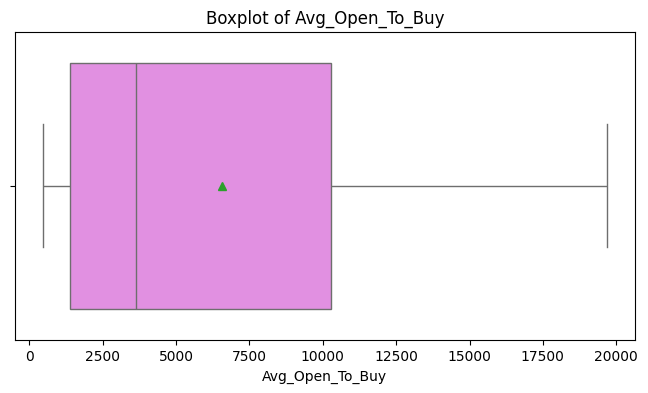

----------------------------------------------------------------------------------------------------------------------------------------------------------------
After Outlier Treatment: temp_X_train for column Total_Amt_Chng_Q4_Q1


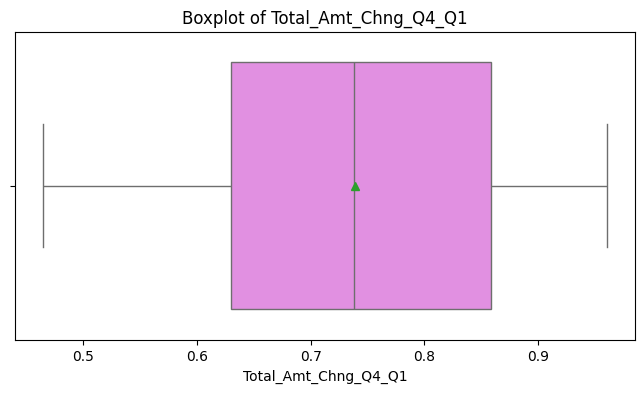

----------------------------------------------------------------------------------------------------------------------------------------------------------------
After Outlier Treatment: temp_X_train for column Total_Trans_Amt


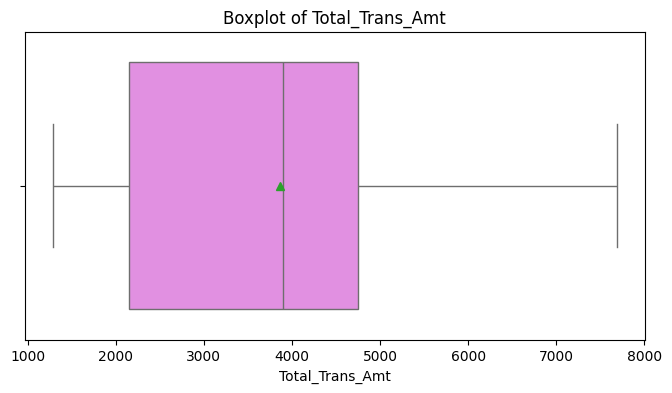

----------------------------------------------------------------------------------------------------------------------------------------------------------------
After Outlier Treatment: temp_X_val for column Credit_Limit


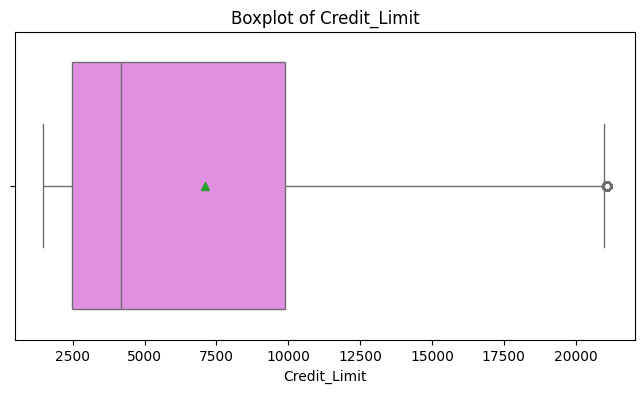

----------------------------------------------------------------------------------------------------------------------------------------------------------------
After Outlier Treatment: temp_X_val for column Avg_Open_To_Buy


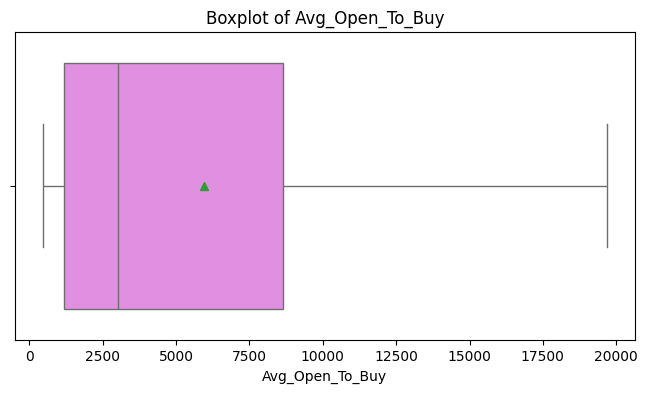

----------------------------------------------------------------------------------------------------------------------------------------------------------------
After Outlier Treatment: temp_X_val for column Total_Amt_Chng_Q4_Q1


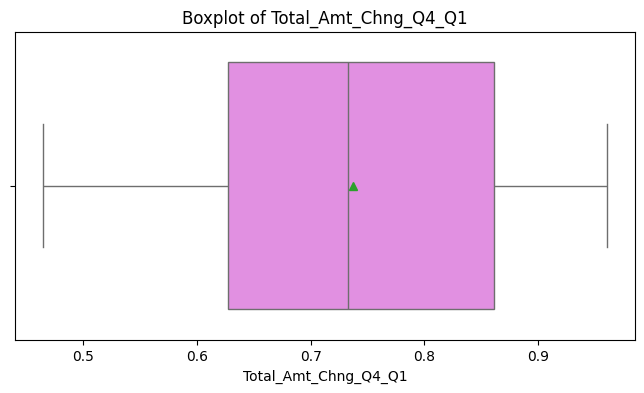

----------------------------------------------------------------------------------------------------------------------------------------------------------------
After Outlier Treatment: temp_X_val for column Total_Trans_Amt


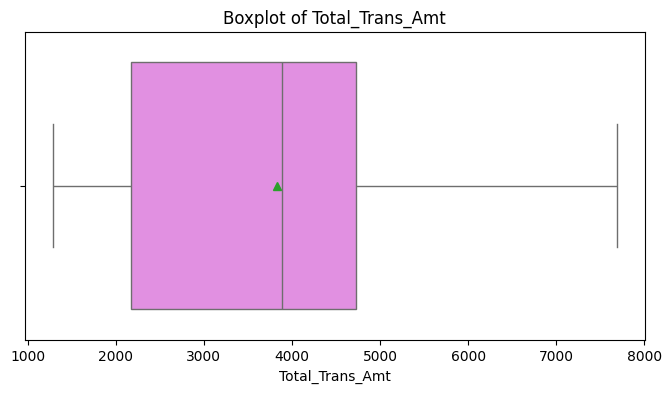

----------------------------------------------------------------------------------------------------------------------------------------------------------------
After Outlier Treatment: temp_X_test for column Credit_Limit


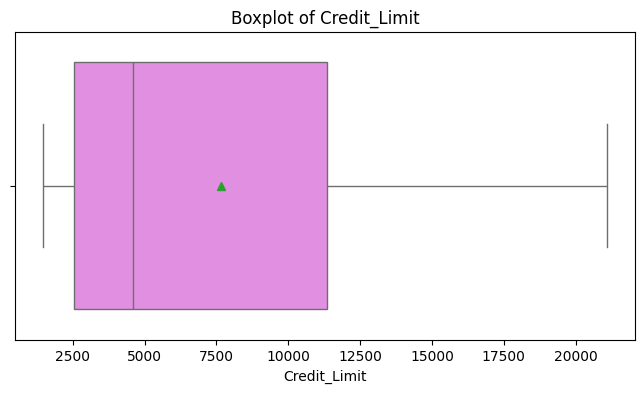

----------------------------------------------------------------------------------------------------------------------------------------------------------------
After Outlier Treatment: temp_X_test for column Avg_Open_To_Buy


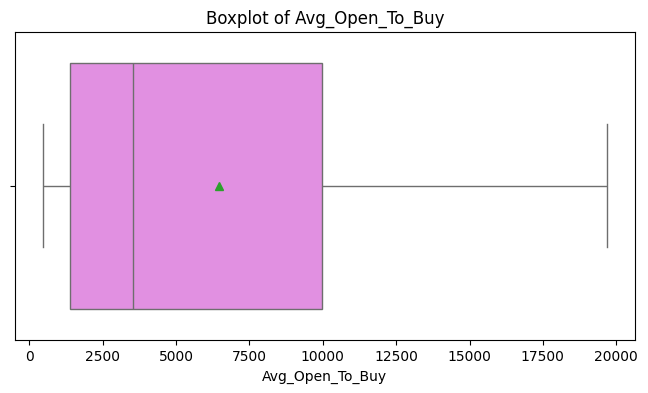

----------------------------------------------------------------------------------------------------------------------------------------------------------------
After Outlier Treatment: temp_X_test for column Total_Amt_Chng_Q4_Q1


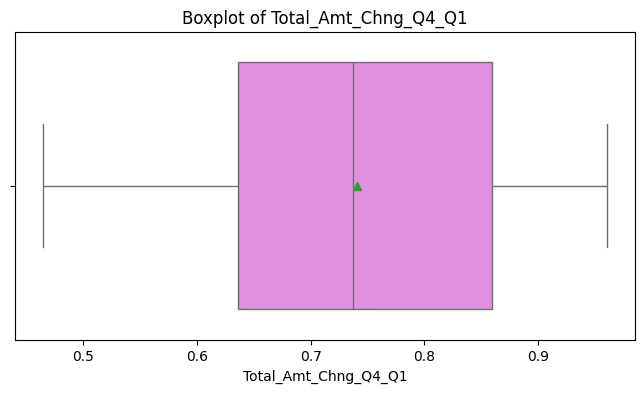

----------------------------------------------------------------------------------------------------------------------------------------------------------------
After Outlier Treatment: temp_X_test for column Total_Trans_Amt


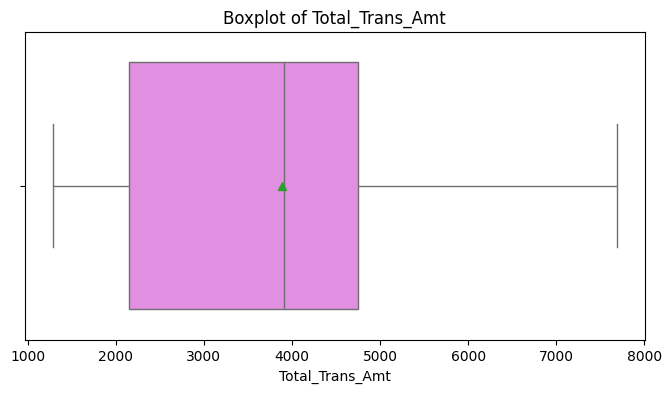

----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [57]:
# create a list with the dataframes to check
dfs_to_check = [temp_X_train, temp_X_val, temp_X_test]

df_name = ['temp_X_train', 'temp_X_val', 'temp_X_test']
columns_to_cap = ['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt']

# run the function
i = 0
for df in dfs_to_check:
    for column in columns_to_cap:
        print(f"After Outlier Treatment: {df_name[i]} for column {column}")
        detect_outlier(df, column)
        print('--'*80)
    i+=1

Observations:
- No More outliers

# lets copy the temporary data frame back to the originals

In [58]:
# did outlier treatment, so copying back to original Train, Validate, Test

X_train = temp_X_train.copy()
X_val = temp_X_val.copy()
X_test = temp_X_test.copy()

#### Scaling the data is not necessary in this case because:

**Tree-Based Algorithms (No Need to Scale)**
- Random Forests
- Bagging
- Gradient Boosting
- AdaBoost
- XGBoost

These algorithms are robust to the scale of the input features because they use decision trees as their base learners, which split data based on feature values without being influenced by the scale.

**When to Scale**
- Stacking: If you include base learners or a meta-learner that require scaling (e.g., linear models, SVMs), then scaling is recommended for consistency.
- Linear Models (e.g., Logistic Regression, Linear Regression)
- SVMs (Support Vector Machines)
- K-Nearest Neighbors (KNN)
- Neural Networks



#### However we will scale the data just as good measure

In [59]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training, validation, and test data
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled data back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Verify the scaling
print("\nScaled Training Data:")
display(X_train_scaled.describe())

print("\nScaled Validation Data:")
display(X_val_scaled.describe())

print("\nScaled Test Data:")
display(X_test_scaled.describe())



Scaled Training Data:


Customer_Age        Gender  Dependent_count  Education_Level  \
count  4.961000e+03  4.961000e+03     4.961000e+03     4.961000e+03   
mean  -3.437417e-17  5.442577e-17    -1.460902e-16    -1.747354e-16   
std    1.000101e+00  1.000101e+00     1.000101e+00     1.000101e+00   
min   -2.540852e+00 -9.579485e-01    -1.796653e+00    -1.644604e+00   
25%   -6.643756e-01 -9.579485e-01    -1.029663e+00    -8.949135e-01   
50%   -3.888364e-02 -9.579485e-01    -2.626722e-01     6.044671e-01   
75%    7.117068e-01  1.043897e+00     5.043182e-01     6.044671e-01   
max    3.338773e+00  1.043897e+00     2.038299e+00     2.103848e+00   

       Marital_Status  Income_Category  Card_Category  Months_on_book  \
count    4.961000e+03     4.961000e+03   4.961000e+03    4.961000e+03   
mean    -1.045548e-16     4.869674e-17  -1.718708e-17    3.594965e-16   
std      1.000101e+00     1.000101e+00   1.000101e+00    1.000101e+00   
min     -1.140259e+00    -9.086133e-01  -2.535714e-01   -2.885452e+00   
25%     -1.140259e+00    -9.086133e-01  -2.535714e-01   -4.995594e-01   
50%      5.333578e-01    -1.739929e-01  -2.535714e-01    2.733706e-03   
75%      5.333578e-01     5.606274e-01  -2.535714e-01    6.306001e-01   
max      2.206974e+00     2.029868e+00   8.668186e+00    2.514199e+00   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              4.961000e+03            4.961000e+03   
mean               5.370964e-17           -5.012900e-18   
std                1.000101e+00            1.000101e+00   
min               -1.826281e+00           -2.332243e+00   
25%               -5.402370e-01           -3.340982e-01   
50%                1.027850e-01           -3.340982e-01   
75%                7.458070e-01            6.649742e-01   
max                1.388829e+00            3.662191e+00   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           4.961000e+03  4.961000e+03         4.961000e+03   
mean            2.105418e-16  1.160128e-16        -4.010320e-17   
std             1.000101e+00  1.000101e+00         1.000101e+00   
min            -2.212433e+00 -9.448442e-01        -1.413515e+00   
25%            -4.157593e-01 -7.779997e-01        -1.226070e+00   
50%            -4.157593e-01 -4.578264e-01         1.542050e-01   
75%             4.825777e-01  5.387355e-01         7.664434e-01   
max             3.177589e+00  2.001080e+00         1.650112e+00   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     4.961000e+03          4.961000e+03     4.961000e+03    4.961000e+03   
mean      2.578063e-17          5.442577e-17    -9.810961e-17   -1.006161e-16   
std       1.000101e+00          1.000101e+00     1.000101e+00    1.000101e+00   
min      -9.246900e-01         -1.860591e+00    -1.317252e+00   -2.335357e+00   
25%      -7.872104e-01         -7.407611e-01    -8.784723e-01   -8.463064e-01   
50%      -4.476705e-01         -7.781415e-03     2.059143e-02    8.966803e-02   
75%       5.596059e-01          8.066405e-01     4.527154e-01    6.852881e-01   
max       1.981076e+00          1.498899e+00     1.957306e+00    3.152857e+00   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         4.961000e+03           4.961000e+03  
mean         -1.589805e-16          -1.786741e-16  
std           1.000101e+00           1.000101e+00  
min          -2.952573e+00          -9.808645e-01  
25%          -5.328544e-01          -9.591301e-01  
50%          -3.650190e-02          -3.759254e-01  
75%           4.308967e-01           8.122185e-01  
max           1.240954e+01           2.623413e+00


Scaled Validation Data:


Customer_Age       Gender  Dependent_count  Education_Level  \
count   2127.000000  2127.000000      2127.000000      2127.000000   
mean       0.001228    -0.069494         0.008858         0.017967   
std        1.012783     0.994818         1.002827         1.021388   
min       -2.540852    -0.957948        -1.796653        -1.644604   
25%       -0.664376    -0.957948        -1.029663        -0.894914   
50%       -0.038884    -0.957948        -0.262672         0.604467   
75%        0.711707     1.043897         0.504318         0.604467   
max        2.337986     1.043897         2.038299         2.103848   

       Marital_Status  Income_Category  Card_Category  Months_on_book  \
count     2127.000000      2127.000000    2127.000000     2127.000000   
mean        -0.007991        -0.103881      -0.043845       -0.017575   
std          1.010774         0.958546       0.924423        1.020985   
min         -1.140259        -0.908613      -0.253571       -2.885452   
25%         -1.140259        -0.908613      -0.253571       -0.625133   
50%          0.533358        -0.173993      -0.253571        0.002734   
75%          0.533358         0.560627      -0.253571        0.505027   
max          2.206974         2.029868       8.668186        2.514199   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count               2127.000000             2127.000000   
mean                  -0.040814                0.021002   
std                    1.002638                1.040348   
min                   -1.826281               -2.332243   
25%                   -0.540237               -0.334098   
50%                    0.102785               -0.334098   
75%                    0.745807                0.664974   
max                    1.388829                3.662191   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count            2127.000000   2127.000000          2127.000000   
mean               -0.012416     -0.097147            -0.003494   
std                 0.970292      0.952591             0.972098   
min                -2.212433     -0.944844            -1.413515   
25%                -0.415759     -0.791365            -0.774499   
50%                -0.415759     -0.537269             0.135947   
75%                 0.482578      0.319930             0.717148   
max                 3.177589      2.001080             1.650112   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count      2127.000000           2127.000000      2127.000000     2127.000000   
mean         -0.097137             -0.010293        -0.016930        0.001579   
std           0.954801              1.019138         0.967605        0.988409   
min          -0.924690             -1.860591        -1.317252       -2.335357   
25%          -0.815342             -0.761122        -0.866440       -0.846306   
50%          -0.535996             -0.041716         0.012911        0.089668   
75%           0.311492              0.827001         0.441196        0.685288   
max           1.981076              1.498899         1.957306        2.812503   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count          2127.000000            2127.000000  
mean             -0.046906               0.078011  
std               0.933086               1.019332  
min              -2.952573              -0.980864  
25%              -0.590762              -0.864948  
50%              -0.098546              -0.249142  
75%               0.397807               0.964359  
max               7.388104               2.587190


Scaled Test Data:


Customer_Age       Gender  Dependent_count  Education_Level  \
count   3039.000000  3039.000000      3039.000000      3039.000000   
mean       0.005450    -0.002148         0.003339         0.007971   
std        1.000801     1.000070         0.985585         1.012753   
min       -2.540852    -0.957948        -1.796653        -1.644604   
25%       -0.664376    -0.957948        -1.029663        -0.894914   
50%       -0.038884    -0.957948        -0.262672         0.604467   
75%        0.711707     1.043897         0.504318         0.604467   
max        2.713281     1.043897         2.038299         2.103848   

       Marital_Status  Income_Category  Card_Category  Months_on_book  \
count     3039.000000      3039.000000    3039.000000     3039.000000   
mean         0.023398        -0.028471       0.014561       -0.008547   
std          1.023343         0.991020       1.025573        0.994847   
min         -1.140259        -0.908613      -0.253571       -2.885452   
25%         -1.140259        -0.908613      -0.253571       -0.562346   
50%          0.533358        -0.173993      -0.253571        0.002734   
75%          0.533358         0.560627      -0.253571        0.505027   
max          2.206974         2.029868       8.668186        2.514199   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count               3039.000000             3039.000000   
mean                  -0.030517                0.007802   
std                    0.996179                1.003681   
min                   -1.826281               -2.332243   
25%                   -0.540237               -0.334098   
50%                    0.102785               -0.334098   
75%                    0.745807                0.664974   
max                    1.388829                3.662191   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count            3039.000000   3039.000000          3039.000000   
mean               -0.013739     -0.015422             0.008550   
std                 0.999849      0.998440             0.992736   
min                -2.212433     -0.944844            -1.413515   
25%                -0.415759     -0.781454            -0.849964   
50%                -0.415759     -0.474796             0.127427   
75%                 0.482578      0.540838             0.763401   
max                 3.177589      2.001080             1.650112   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count      3039.000000           3039.000000      3039.000000     3039.000000   
mean         -0.016510              0.010929         0.014725       -0.005878   
std           0.994043              1.003672         1.014394        1.003624   
min          -0.924690             -1.860591        -1.317252       -2.335357   
25%          -0.787967             -0.700040        -0.873096       -0.846306   
50%          -0.460677             -0.014568         0.024687        0.089668   
75%           0.511511              0.816821         0.455019        0.685288   
max           1.981076              1.498899         1.957306        3.110313   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count          3039.000000            3039.000000  
mean              0.010742              -0.004924  
std               0.994338               0.980078  
min              -2.952573              -0.980864  
25%              -0.532854              -0.883060  
50%              -0.032366              -0.350569  
75%               0.459851               0.777806  
max               9.456240               2.637903

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* In the case of Thera Bank, recall is a critical metric because it focuses on identifying as many at-risk customers as possible. High recall ensures that the bank can minimize customer churn, take proactive measures, and develop effective strategies to improve customer satisfaction and retention. By prioritizing recall, the bank can address the problem of declining credit card users more effectively, leading to better financial outcomes and enhanced customer relationships.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [60]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Model Building with original data

#### Ensemble models with no tuning

##### Comparision of Ensemble Methods

| **Aspect**            | **AdaBoost**                                         | **Gradient Boosting**                                | **XGBoost**                                             |
|-----------------------|------------------------------------------------------|------------------------------------------------------|---------------------------------------------------------|
| **Full Name**         | Adaptive Boosting                                    | Gradient Boosting                                    | Extreme Gradient Boosting                               |
| **Algorithm Type**    | Ensemble Learning                                    | Ensemble Learning                                    | Ensemble Learning                                       |
| **Base Estimator**    | Typically Decision Trees (Stumps)                    | Decision Trees (usually shallow)                     | Decision Trees (CART)                                   |
| **Boosting Type**     | Adaptive (reweights misclassified examples)          | Gradient-based (fits residual errors)                | Gradient-based (fits residual errors with optimizations)|
| **Handling of Weights** | Adjusts weights of misclassified examples in each iteration | Fits new model to residuals of previous model        | Uses regularization techniques (L1 & L2)                |
| **Regularization**    | No explicit regularization                           | No explicit regularization                           | L1 and L2 regularization                                |
| **Speed**             | Generally slower as it can use decision stumps       | Faster than AdaBoost but slower than XGBoost         | Fastest among the three due to optimized implementations|
| **Scalability**       | Suitable for small to medium datasets                | Suitable for small to medium datasets                | Highly scalable, suitable for large datasets            |
| **Implementation Complexity** | Simple to implement and understand             | More complex than AdaBoost                           | Most complex due to additional features and optimizations|
| **Handling of Overfitting** | Can overfit if not properly tuned                 | Prone to overfitting without tuning                  | Better control of overfitting through regularization    |
| **Tree Pruning**      | No pruning                                           | No pruning                                           | Uses max depth and pruning                               |
| **Parallelization**   | Limited                                              | Limited                                              | Highly parallelizable                                   |
| **Hyperparameters**   | Fewer (learning rate, number of estimators)          | More than AdaBoost (learning rate, number of estimators, max depth) | Most (learning rate, number of estimators, max depth, subsample, colsample_bytree, etc.) |
| **Use Cases**         | Classification problems                              | Both regression and classification problems          | Both regression and classification problems             |
| **Library Support**   | Available in scikit-learn                            | Available in scikit-learn                            | Separate library (xgboost) and also available in scikit-learn |
| **Popularity**        | Widely used but less than Gradient Boosting and XGBoost| Widely used                                          | Very popular in machine learning competitions           |


**CART:**  Classification and Regression Trees

##### initialize the models with no tuning

In [61]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb


models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", xgb.XGBClassifier(random_state=1)))


##### Fit the Models and Show **recall metrics** for the ensembe models above (no tuning)

In [62]:
# Store recall scores in a dictionary
recall_scores = {
    'Model': [],
    'Training Recall': [],
    'Validation Recall': [],
    'Test Recall': [],
}

# Evaluate initial models
for name, model in models:
    model.fit(X_train, y_train)  # Train the model on the training data
    recall_train = recall_score(y_train, model.predict(X_train))
    recall_val = recall_score(y_val, model.predict(X_val))
    recall_test = recall_score(y_test, model.predict(X_test))

    recall_scores['Model'].append(name)
    recall_scores['Training Recall'].append(recall_train)
    recall_scores['Validation Recall'].append(recall_val)
    recall_scores['Test Recall'].append(recall_test)

# Convert the dictionary to a DataFrame
recall_df = pd.DataFrame(recall_scores)

# Identify the maximum recall score on the test set & validation set
max_test_recall = recall_df['Test Recall'].max()
max_validation_recall = recall_df['Validation Recall'].max()



# Apply conditional formatting to highlight all rows with the maximum test recall or validation recall score
def highlight_max(se): # `s` Parameter: In highlight_max(s), s is each row of the DataFrame passed
    if se['Test Recall'] == max_test_recall or se['Validation Recall'] == max_validation_recall:
        return ['background-color: yellow'] * len(se)
    else:
        return [''] * len(se)

# Apply the highlighting function
styled_recall_df_noTune = recall_df.style.apply(highlight_max, axis=1) # automatically passes each row (as a Series) to the function.

# Display the styled DataFrame
styled_recall_df_noTune

### Model Building with Oversampled data


#### SMOTE: Synthetic Minority Over Sampling Technique / Oversampling Notes:

**Oversampling**

1. **Understanding Class Imbalance**

In many real-world datasets, the class distribution is imbalanced. This means that one class (usually the majority class) significantly outnumbers the other class (minority class). For example, in a fraud detection dataset, the number of fraudulent transactions is typically much smaller than the number of legitimate transactions.

2. **Why Address Class Imbalance?**

Class imbalance can lead to biased models that perform well on the majority class but poorly on the minority class. To mitigate this, techniques like undersampling and oversampling are used.

What is Oversampling?

- Oversampling involves **increasing the number of instances in the minority class** to balance the class distribution. This can be done by randomly duplicating samples from the minority class or by generating synthetic samples (e.g., using SMOTE).

Why Use Oversampling?

- Preserves All Majority Class Samples: Unlike undersampling, oversampling does not discard any majority class samples.
- Improves Model Performance: By balancing the class distribution, the model can learn the characteristics of both classes more effectively.

SMOTE:

- SMOTE: A technique to generate synthetic samples for the minority class to balance the dataset.
- Purpose: Address class imbalance, improve model performance, and avoid overfitting.
- Process: Identifies minority class instances, selects nearest neighbors, and generates synthetic samples by interpolation.
- Benefits: Leads to better generalization, improved recall, precision, and F1 scores, and more balanced model performance across classes.

Using SMOTE can significantly enhance the performance of machine learning models on imbalanced datasets by ensuring that the model learns effectively from both classes.

**Explanation of SMOTE Parameters**

- sampling_strategy=1

  - Purpose: Defines the desired balance between the minority and majority classes after resampling.
  - Value 1: This means the minority class will be resampled to have the same number of instances as the majority class. In other words, after applying SMOTE, the dataset will be perfectly balanced with a 1:1 ratio between the minority and majority classes.

- k_neighbors=5

  - Purpose: Specifies the number of nearest neighbors to use when generating synthetic samples for the minority class.
  - Value 5: This means SMOTE will look for the 5 nearest neighbors of each minority class instance and create synthetic samples by interpolating between the instance and its neighbors.

Impact:

- Higher Values: Use more neighbors, leading to a smoother distribution of synthetic samples but potentially more overlap with the majority class.
- Lower Values: Use fewer neighbors, resulting in synthetic samples that are closer to the original minority instances but might not cover the feature space as well.  

#### Building the model with SMOTE

In [63]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)


In [64]:
# Apply SMOTE to the training data
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("Original training dataset shape:", X_train.shape, y_train.shape)
print("Resampled training dataset shape:", X_train_over.shape, y_train_over.shape)

Original training dataset shape: (4961, 19) (4961,)
Resampled training dataset shape: (8328, 19) (8328,)


In [65]:
%%time
# Initialize models and fit the models
models = []  # Empty list to store all the models

models.append(("BaggingOS", BaggingClassifier(random_state=1)))
models.append(("Random forestOS", RandomForestClassifier(random_state=1)))
models.append(("Gradient BoostingOS", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoostOS", AdaBoostClassifier(random_state=1)))
models.append(("XGBoostOS", xgb.XGBClassifier(random_state=1)))

# Fit the models on the oversampled data
for name, model in models:
    model.fit(X_train_over, y_train_over)

CPU times: user 8.05 s, sys: 25.6 ms, total: 8.08 s
Wall time: 8.04 s


In [66]:
# Store recall scores in a dictionary
recall_scores = {
    'Model': [],
    'Training Recall': [],
    'Validation Recall': [],
    'Test Recall': [],
}

# Evaluate initial models
for name, model in models:
    recall_train = recall_score(y_train_over, model.predict(X_train_over))
    recall_val = recall_score(y_val, model.predict(X_val))
    recall_test = recall_score(y_test, model.predict(X_test))

    recall_scores['Model'].append(name)
    recall_scores['Training Recall'].append(recall_train)
    recall_scores['Validation Recall'].append(recall_val)
    recall_scores['Test Recall'].append(recall_test)

# Convert the dictionary to a DataFrame
recall_df = pd.DataFrame(recall_scores)

# Identify the maximum recall scores on the test and validation sets
max_test_recall = recall_df['Test Recall'].max()
max_validation_recall = recall_df['Validation Recall'].max()

# Apply conditional formatting to highlight rows with both maximum test and validation recall scores
def highlight_max(s):
    if s['Test Recall'] == max_test_recall or s['Validation Recall'] == max_validation_recall:
        return ['background-color: yellow'] * len(s)
    else:
        return [''] * len(s)

# Apply the highlighting function
styled_recall_dfOS_NT = recall_df.style.apply(highlight_max, axis=1)

# Display the styled DataFrame
styled_recall_dfOS_NT


### Model Building with Undersampled data

#### Building the model with RandomUnderSampler

##### RandomUnderSampling Notes

What is Undersampling?

- Undersampling involves **reducing the number of instances in the majority class** to balance the class distribution. This is done by randomly removing samples from the majority class until the class distribution is balanced.

Why Use Undersampling?

- Improves Model Performance: Balancing the class distribution helps the model to learn the characteristics of both classes more effectively.
- Reduces Training Time: By reducing the number of majority class samples, the training time can be reduced.
- Memory Efficiency: With fewer samples to process, memory usage is reduced.

Hyperparameters:
- RandomUnderSampler: This class from the imblearn library is used to perform undersampling.
- sampling_strategy=1: This specifies that the resulting ratio of minority to majority class samples should be 1:1.
- fit_resample: This method applies the undersampling to the training data.

##### Difference between Oversampling and Undersampling

| Aspect               | Undersampling                                             | Oversampling                                              |
|----------------------|-----------------------------------------------------------|-----------------------------------------------------------|
| **Method**           | Reduces the number of majority class samples              | Increases the number of minority class samples            |
| **Data Reduction**   | Reduces the dataset size                                  | Increases the dataset size                                |
| **Information Loss** | Can lead to loss of information from majority class       | No loss of information from majority class                |
| **Training Time**    | Generally faster due to reduced dataset size              | Can be slower due to increased dataset size               |
| **Risk**             | Higher risk of underfitting if too many majority samples are removed | Higher risk of overfitting if minority samples are duplicated |


##### Implementing Undersampling Model

In [67]:
from imblearn.under_sampling import RandomUnderSampler
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)


In [68]:
# Apply RandomUnderSampler to the training data
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("Original training dataset shape:", X_train.shape, y_train.shape)
print("Resampled training dataset shape:", y_train_un.shape, y_train_un.shape)

Original training dataset shape: (4961, 19) (4961,)
Resampled training dataset shape: (1594,) (1594,)


In [69]:
%%time
# Initialize models
models = []  # Empty list to store all the models

models.append(("BaggingUS", BaggingClassifier(random_state=1)))
models.append(("Random forestUS", RandomForestClassifier(random_state=1)))
models.append(("Gradient BoostingUS", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoostUS", AdaBoostClassifier(random_state=1)))
models.append(("XGBoostUS", xgb.XGBClassifier(random_state=1)))

# Fit the models on the oversampled data
for name, model in models:
    model.fit(X_train_un, y_train_un)

CPU times: user 1.67 s, sys: 8.12 ms, total: 1.68 s
Wall time: 1.58 s


In [70]:
# Store recall scores in a dictionary
recall_scores = {
    'Model': [],
    'Training Recall': [],
    'Validation Recall': [],
    'Test Recall': [],
}

# Evaluate initial models
for name, model in models:
    recall_train = recall_score(y_train_un, model.predict(X_train_un))
    recall_val = recall_score(y_val, model.predict(X_val))
    recall_test = recall_score(y_test, model.predict(X_test))

    recall_scores['Model'].append(name)
    recall_scores['Training Recall'].append(recall_train)
    recall_scores['Validation Recall'].append(recall_val)
    recall_scores['Test Recall'].append(recall_test)

# Convert the dictionary to a DataFrame
recall_df = pd.DataFrame(recall_scores)

# Identify the maximum recall scores on the test and validation sets
max_test_recall = recall_df['Test Recall'].max()
max_validation_recall = recall_df['Validation Recall'].max()

# Apply conditional formatting to highlight rows with both maximum test and validation recall scores
def highlight_max(s):
    if s['Test Recall'] == max_test_recall or s['Validation Recall'] == max_validation_recall:
        return ['background-color: yellow'] * len(s)
    else:
        return [''] * len(s)

# Apply the highlighting function
styled_recall_dfUS_NT = recall_df.style.apply(highlight_max, axis=1)

# Display the styled DataFrame
styled_recall_dfUS_NT

### Cross Validation Scores

#### StratifiedKFold: This is a cross-validation method that ensures each fold has the same proportion of classes as the original dataset.
- n_splits=5: This specifies that the dataset will be split into 5 folds.
- shuffle=True: This ensures the data is shuffled before splitting into folds.
- random_state=1: This ensures reproducibility by setting a seed for the random number generator.

In [71]:
results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5

    # Perform cross-validation
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    results.append(cv_result) # Appending the results of each of the 5 cv score to the list
    names.append(name)  # Appending the name of the model, useful later to plot
    print("{}: {}".format(name, cv_result.mean() * 100))


Cross-Validation Performance:

BaggingUS: 90.0880503144654
Random forestUS: 92.7248427672956
Gradient BoostingUS: 93.73034591194968
AdaBoostUS: 92.47091194968554
XGBoostUS: 94.60455974842766


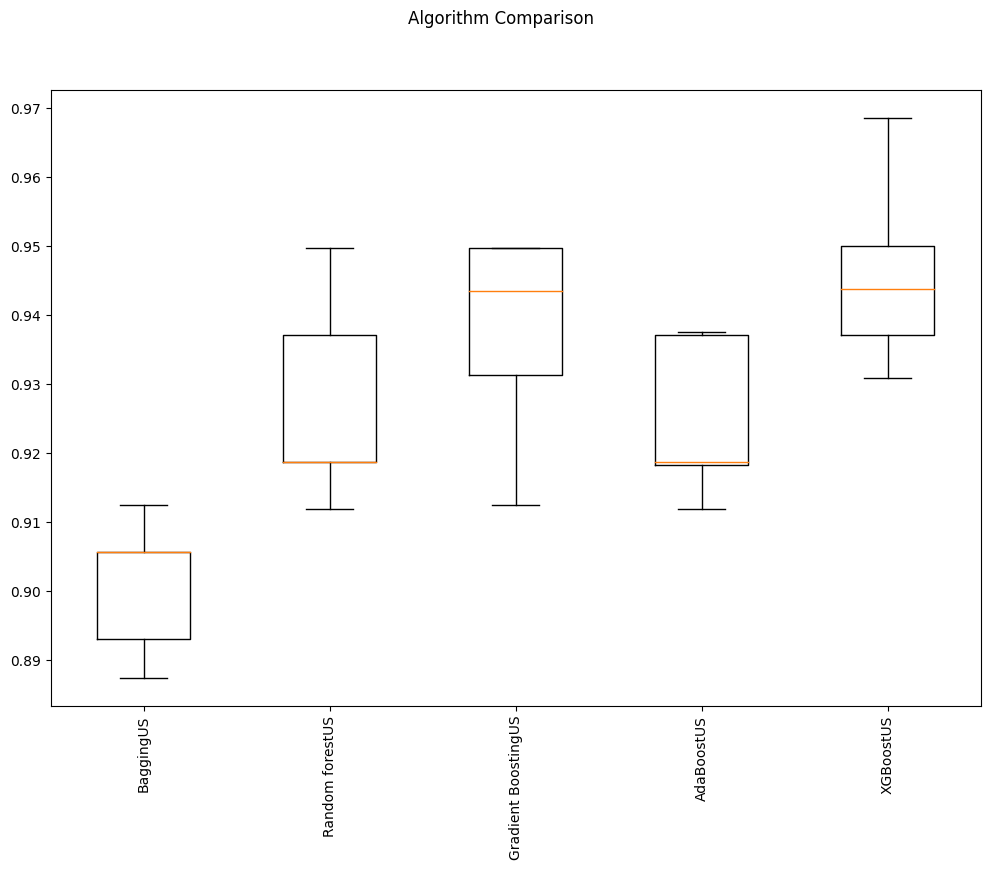

In [72]:
import matplotlib.pyplot as plt

# Define the figure size
fig = plt.figure(figsize=(12, 8))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

# Create the boxplot
plt.boxplot(results)
ax.set_xticklabels(names)

# Rotate the x-axis labels to be vertical
ax.tick_params(axis='x', rotation=90)

# Display the plot
plt.show()


### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

#### Let's do a quick view of what hyperparameters are available for different models

In [73]:
# Initialize the models
bagging = BaggingClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
ada = AdaBoostClassifier()
xgb_model = xgb.XGBClassifier()

models = [bagging, rf, gb, ada, xgb_model]
for model in models:
    params = model.get_params()
    print(f"{model} parameters available are: {params}\n")




BaggingClassifier() parameters available are: {'base_estimator': 'deprecated', 'bootstrap': True, 'bootstrap_features': False, 'estimator': None, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

RandomForestClassifier() parameters available are: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

GradientBoostingClassifier() parameters available are: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'mi

##### the steps needed for tuning are as follows:

1. Initial Data Split: Split the original data into training and test sets.
2. Further Split for Hyperparameter Tuning: Split the training data into a smaller training set and a validation set. The smaller training set is used for hyperparameter tuning with cross-validation.
3. Hyperparameter Tuning: Use GridSearchCV on the smaller training set to find the best hyperparameters.
4. Combine Training and Validation Data: After tuning, combine the smaller training set and the validation set to form the full training set.
5. Final Training: Train the final model on this full training set.
6. Evaluation: Evaluate the final model on the test set.

- Steps 1 and 2: Splitting the data into Test, Validation and train sets was already done previously.
- To get ready for Step 5: Let's prepare Step 4, i.e.  recombine the smaller Test and Validation Data.

In [74]:
# Combine the smaller training set and validation set to form the full training set
X_train_full = pd.concat([X_train, X_val])
y_train_full = pd.concat([y_train, y_val])
print("X_train_full shape:", X_train_full.shape)
print("y_train_full shape:", y_train_full.shape)

X_train_full shape: (7088, 19)
y_train_full shape: (7088,)


##### Step3: Implement Tuning with the reduced data set and do cross validation with cv=5

**Explanaton of some parameter values**

1.   **cv=5**

- The dataset is split into 5 parts (folds): Fold 1, Fold 2, Fold 3, Fold 4, Fold 5.

**Training & Validation**

- Iteration 1: Train on Fold 2, Fold 3, Fold 4, Fold 5; Validate on Fold 1.
- Iteration 2: Train on Fold 1, Fold 3, Fold 4, Fold 5; Validate on Fold 2.
- Iteration 3: Train on Fold 1, Fold 2, Fold 4, Fold 5; Validate on Fold 3.
- Iteration 4: Train on Fold 1, Fold 2, Fold 3, Fold 5; Validate on Fold 4.
- Iteration 5: Train on Fold 1, Fold 2, Fold 3, Fold 4; Validate on Fold 5.



2.   **n_jobs=-1**

- This parameter specifies the number of jobs (threads) to run in parallel for the grid search.
- n_jobs=-1 means that all available processors will be used. This can significantly speed up the computation, especially when the grid search is extensive with many combinations of hyperparameters.
- Utilizing multiple processors makes the grid search faster because it allows parallel computation, where multiple tasks are processed simultaneously.

3. **grid_search.fit(X_train, y_train)**
- training/fitting is always done on the training data
- we'll save the optimized model (based on recall score) as `best-estimator`


In [75]:
%%time
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for each model

param_grid_bagging = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}


param_grid_rf = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

param_grid_gb = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

param_grid_ada = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}


param_grid_xgb={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Initialize the models
bagging = BaggingClassifier(random_state=1)
rf = RandomForestClassifier(random_state=1)
gb = GradientBoostingClassifier(random_state=1)
ada = AdaBoostClassifier(random_state=1)
xgb_model = xgb.XGBClassifier(random_state=1)

# Use GridSearchCV to find the best parameters for each model
grid_bagging = GridSearchCV(bagging, param_grid_bagging, cv=5, scoring='recall', n_jobs=-1, verbose=1)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='recall', n_jobs=-1, verbose=1)
grid_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='recall', n_jobs=-1, verbose=1)
grid_ada = GridSearchCV(ada, param_grid_ada, cv=5, scoring='recall', n_jobs=-1, verbose=1)
grid_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='recall', n_jobs=-1, verbose=1)

# Fit the models on the smaller training set (cross-validation will be performed internally)
grid_bagging.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_gb.fit(X_train, y_train)
grid_ada.fit(X_train, y_train)
grid_xgb.fit(X_train, y_train)

# Get the best models
best_bagging = grid_bagging.best_estimator_
best_rf = grid_rf.best_estimator_
best_gb = grid_gb.best_estimator_
best_ada = grid_ada.best_estimator_
best_xgb = grid_xgb.best_estimator_


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
CPU times: user 18.9 s, sys: 1.81 s, total: 20.7 s
Wall time: 11min 20s


#### Check with the best models (using train data set) what the CV Scores look like


Cross-Validation Performance:

Bagging: 80.81%
Random Forest: 74.03%
Gradient Boosting: 81.05%
AdaBoost: 81.31%
XGBoost: 88.96%


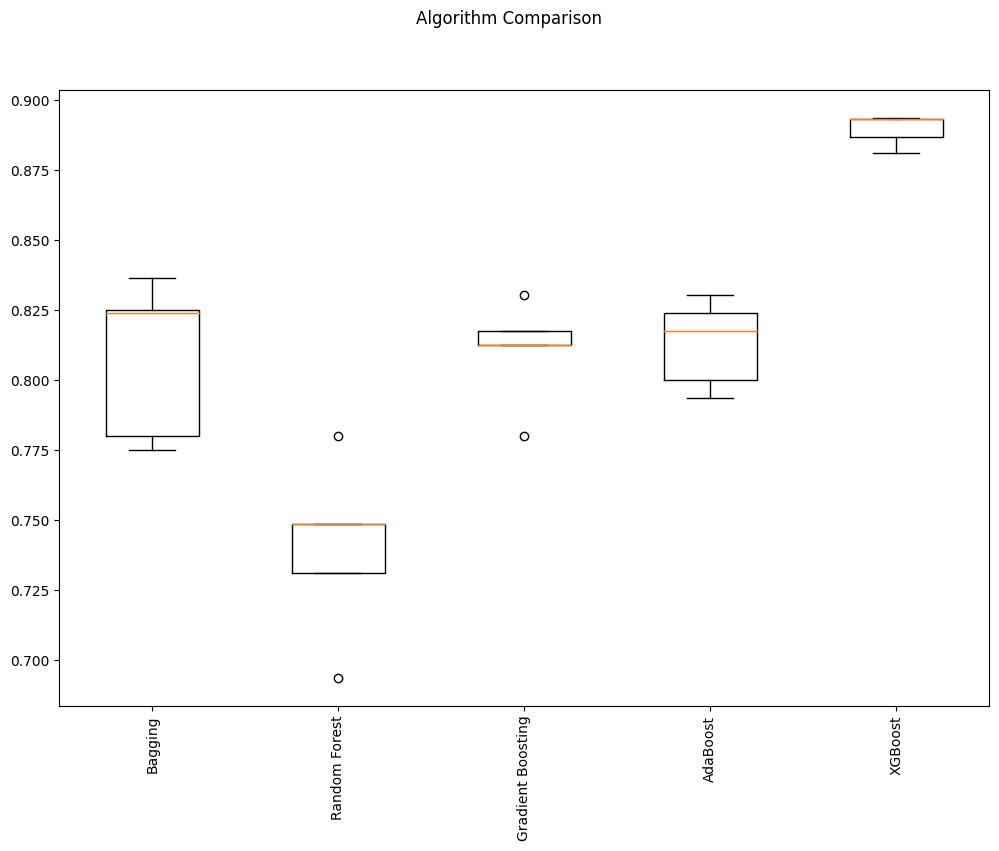

In [76]:
# Store models and their names
models = [
    ('Bagging', best_bagging),
    ('Random Forest', best_rf),
    ('Gradient Boosting', best_gb),
    ('AdaBoost', best_ada),
    ('XGBoost', best_xgb)
]

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store names of the models

# Loop through all models to get the mean cross-validated score
print("\nCross-Validation Performance:\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # Setting number of splits equal to 5

    # Perform cross-validation
    cv_result = cross_val_score(estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold)
    results.append(cv_result)  # Appending the results of each of the 5 CV scores to the list
    names.append(name)  # Appending the name of the model, useful later to plot
    print("{}: {:.2f}%".format(name, cv_result.mean() * 100))

# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(12, 8))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)  # Set x-axis labels and rotate them
plt.show();


##### Step4: Train Final Model on Full Training Data:

In [77]:
%%time
# Train the final models on the entire training data
best_bagging.fit(X_train_full, y_train_full)
best_rf.fit(X_train_full, y_train_full)
best_gb.fit(X_train_full, y_train_full)
best_ada.fit(X_train_full, y_train_full)
best_xgb.fit(X_train_full, y_train_full)


CPU times: user 10 s, sys: 19.6 ms, total: 10 s
Wall time: 9.9 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=75, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

#### Step 5: Use the trained model to make predictions

In [78]:
# Store recall scores in a dictionary
recall_scores = {
    'Model': [],
    'Training Recall': [],
    'Validation Recall': [],
    'Test Recall': [],
}
# Evaluate best models
for name, model in [("Bagging", best_bagging), ("Random forest", best_rf), ("Gradient Boosting", best_gb), ("AdaBoost", best_ada), ("XGBoost", best_xgb)]:
    recall_train = recall_score(y_train_full, model.predict(X_train_full))
    recall_val = recall_score(y_val, model.predict(X_val))
    recall_test = recall_score(y_test, model.predict(X_test))

    recall_scores['Model'].append("Best " + name)
    recall_scores['Training Recall'].append(recall_train)
    recall_scores['Validation Recall'].append(recall_val)
    recall_scores['Test Recall'].append(recall_test)

# Convert the dictionary to a DataFrame
recall_df = pd.DataFrame(recall_scores)

# Identify the maximum recall score on the test set & validation set
max_test_recall = recall_df['Test Recall'].max()
max_validation_recall = recall_df['Validation Recall'].max()



# Apply conditional formatting to highlight all rows with the maximum test recall or validation recall score
def highlight_max(se): # `s` Parameter: In highlight_max(s), s is each row of the DataFrame passed
    if se['Test Recall'] == max_test_recall or se['Validation Recall'] == max_validation_recall:
        return ['background-color: yellow'] * len(se)
    else:
        return [''] * len(se)

# Apply the highlighting function
styled_recall_df_Tune = recall_df.style.apply(highlight_max, axis=1) # automatically passes each row (as a Series) to the function.

# Display the styled DataFrame
styled_recall_df_Tune

**Observations:**

Based on the Recall Scores, 2 models have high recall scores.  
- However **BestXGBoost** performs better with **Test Set**

##### Saving/Loading the best model

In [79]:
# Save the best models
from joblib import dump, load

# Save the best Random Forest model
dump(best_rf, 'best_rf.joblib')

# Save the best Gradient Boosting model
dump(best_gb, 'best_gb.joblib')

# Save the best XGBoost model
dump(best_xgb, 'best_xgb.joblib')

# Save tje best Bagging model
dump(best_bagging, 'best_bagging.joblib')

# Save the best AdaBoost model
dump(best_ada, 'best_ada.joblib')

['best_ada.joblib']

In [80]:
# load the best models
best_rf = load('best_rf.joblib')
best_gb = load('best_gb.joblib')
best_xgb = load('best_xgb.joblib')
best_bagging = load('best_bagging.joblib')
best_ada = load('best_ada.joblib')

#### Sample tuning method for Decision tree with original data
- Note: the use of RandomizedSearchCV instead of GridSearchCV. This does a less extensive search using Randome Values in defined range and is thus faster.

In [81]:
%%time
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring='recall', cv=5, random_state=1, verbose=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.7390880503144655:
CPU times: user 140 ms, sys: 15.9 ms, total: 156 ms
Wall time: 1.82 s


In [82]:
%%time
# Getting the best estimator
best_model = randomized_cv.best_estimator_

# Train the model on the full data set
best_model.fit(X_train_full, y_train_full)

# Calculating recall scores
recall_train = recall_score(y_train, best_model.predict(X_train))
recall_val = recall_score(y_val, best_model.predict(X_val))
recall_test = recall_score(y_test, best_model.predict(X_test))

# Store recall scores in a dictionary
recall_scores = {
    'Model': ['Decision Tree'],
    'Training Recall': [recall_train],
    'Validation Recall': [recall_val],
    'Test Recall': [recall_test]
}

# Convert the dictionary to a DataFrame
recall_df = pd.DataFrame(recall_scores)

# Identify the maximum recall score on the test set & validation set
max_test_recall = recall_df['Test Recall'].max()
max_validation_recall = recall_df['Validation Recall'].max()



# Apply conditional formatting to highlight all rows with the maximum test recall or validation recall score
def highlight_max(se): # `s` Parameter: In highlight_max(s), s is each row of the DataFrame passed
    if se['Test Recall'] == max_test_recall or se['Validation Recall'] == max_validation_recall:
        return ['background-color: yellow'] * len(se)
    else:
        return [''] * len(se)

# Apply the highlighting function
styled_recall_dtree = recall_df.style.apply(highlight_max, axis=1) # automatically passes each row (as a Series) to the function.

# Display the styled DataFrame
styled_recall_dtree



CPU times: user 75.7 ms, sys: 968 µs, total: 76.7 ms
Wall time: 77.7 ms


#### Sample tuning method for Decision tree with oversampled data
- Note: the use of RandomizedSearchCV instead of GridSearchCV. This does a less extensive search and is thus faster.

In [83]:
%%time
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring='recall', cv=5, random_state=1, verbose=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 4} with CV score=0.9121043609751593:
CPU times: user 244 ms, sys: 25.5 ms, total: 269 ms
Wall time: 2.53 s


In [84]:
%%time
# Getting the best estimator
best_model = randomized_cv.best_estimator_

#Train with full data set
best_model.fit(X_train_full, y_train_full)

# Calculating recall scores
recall_train = recall_score(y_train, best_model.predict(X_train))
recall_val = recall_score(y_val, best_model.predict(X_val))
recall_test = recall_score(y_test, best_model.predict(X_test))

# Store recall scores in a dictionary
recall_scores = {
    'Model': ['Decision Tree Oversampled'],
    'Training Recall': [recall_train],
    'Validation Recall': [recall_val],
    'Test Recall': [recall_test]
}

# Convert the dictionary to a DataFrame
recall_df = pd.DataFrame(recall_scores)

# Identify the maximum recall score on the test set & validation set
max_test_recall = recall_df['Test Recall'].max()
max_validation_recall = recall_df['Validation Recall'].max()



# Apply conditional formatting to highlight all rows with the maximum test recall or validation recall score
def highlight_max(se): # `s` Parameter: In highlight_max(s), s is each row of the DataFrame passed
    if se['Test Recall'] == max_test_recall or se['Validation Recall'] == max_validation_recall:
        return ['background-color: yellow'] * len(se)
    else:
        return [''] * len(se)

# Apply the highlighting function
styled_recall_dtreeOS = recall_df.style.apply(highlight_max, axis=1) # automatically passes each row (as a Series) to the function.

# Display the styled DataFrame
styled_recall_dtreeOS


CPU times: user 53.9 ms, sys: 12 µs, total: 53.9 ms
Wall time: 53.6 ms


#### Sample tuning method for Decision tree with undersampled data
- Note: the use of RandomizedSearchCV instead of GridSearchCV. This does a less extensive search and is thus faster.

In [85]:
%%time
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring='recall', cv=5, random_state=1, verbose=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 10, 'max_depth': 4} with CV score=0.8907940251572327:
CPU times: user 106 ms, sys: 8.77 ms, total: 115 ms
Wall time: 669 ms


In [86]:
%%time
# Getting the best estimator
best_model = randomized_cv.best_estimator_

#Train with full data set
best_model.fit(X_train_full, y_train_full)

# Calculating recall scores
recall_train = recall_score(y_train, best_model.predict(X_train))
recall_val = recall_score(y_val, best_model.predict(X_val))
recall_test = recall_score(y_test, best_model.predict(X_test))

# Store recall scores in a dictionary
recall_scores = {
    'Model': ['Decision Tree Underrsampled'],
    'Training Recall': [recall_train],
    'Validation Recall': [recall_val],
    'Test Recall': [recall_test]
}

# Convert the dictionary to a DataFrame
recall_df = pd.DataFrame(recall_scores)

# Identify the maximum recall score on the test set & validation set
max_test_recall = recall_df['Test Recall'].max()
max_validation_recall = recall_df['Validation Recall'].max()



# Apply conditional formatting to highlight all rows with the maximum test recall or validation recall score
def highlight_max(se): # `s` Parameter: In highlight_max(s), s is each row of the DataFrame passed
    if se['Test Recall'] == max_test_recall or se['Validation Recall'] == max_validation_recall:
        return ['background-color: yellow'] * len(se)
    else:
        return [''] * len(se)

# Apply the highlighting function
styled_recall_dtreeUS = recall_df.style.apply(highlight_max, axis=1) # automatically passes each row (as a Series) to the function.

# Display the styled DataFrame
styled_recall_dtreeUS

CPU times: user 57.1 ms, sys: 0 ns, total: 57.1 ms
Wall time: 59.6 ms


## Model Comparison and Final Model Selection

In [87]:
# Remove styling for all the results:

recall_df_noTune = styled_recall_df_noTune.data
recall_dfOS_NT = styled_recall_dfOS_NT.data
recall_dfUS_NT = styled_recall_dfUS_NT.data
recall_df_Tune = styled_recall_df_Tune.data
recall_dtree = styled_recall_dtree.data
recall_dtreeOS = styled_recall_dtreeOS.data
recall_dtreeUS = styled_recall_dtreeUS.data

# Combine all DataFrames into one
combined_df = pd.concat([recall_df_noTune, recall_dfOS_NT, recall_dfUS_NT, recall_df_Tune, recall_dtree, recall_dtreeOS, recall_dtreeUS], axis=0)

# Reset the index for the combined DataFrame
combined_df.reset_index(drop=True, inplace=True)


# Highlight
# Identify the maximum recall score on the test set & validation set
max_test_recall = combined_df['Test Recall'].max()
max_validation_recall = combined_df['Validation Recall'].max()



# Apply conditional formatting to highlight all rows with the maximum test recall or validation recall score
def highlight_max(se): # `s` Parameter: In highlight_max(s), s is each row of the DataFrame passed
    if se['Test Recall'] == max_test_recall or se['Validation Recall'] == max_validation_recall:
        return ['background-color: yellow'] * len(se)
    else:
        return [''] * len(se)

# Apply the highlighting function
styled_combined_df = combined_df.style.apply(highlight_max, axis=1) # automatically passes each row (as a Series) to the function.

# Display the styled DataFrame
display(styled_combined_df)

**Observations:**

- 3 of the rows show high recall score.
- Best Recall Score is given by model **XGBoostUS** (XGBoost Undersampled)
We chose this one because recall score on test set is better.


### Test set final performance

#### Let's first save the XGBoostUS model as the chosen model

In [88]:
from joblib import dump, load
import xgboost as xgb

# Define and fit the chosen model
chosen_model = xgb.XGBClassifier(random_state=1)
chosen_model.fit(X_train_un, y_train_un)

# Save the best model
dump(chosen_model, 'chosen_model.joblib')

print("The model has been saved successfully.")


The model has been saved successfully.


#### Now load the model, make predictions and calculate scores


In [89]:
# Load the best model
loaded_model = load('chosen_model.joblib')

# Use the loaded model to make predictions
predictions_train = loaded_model.predict(X_train)
predictions_val = loaded_model.predict(X_val)
predictions_test = loaded_model.predict(X_test)

# Evaluate the loaded model
precision_train = precision_score(y_train, predictions_train)
recall_train = recall_score(y_train, predictions_train)
f1_train = f1_score(y_train, predictions_train)

precision_val = precision_score(y_val, predictions_val)
recall_val = recall_score(y_val, predictions_val)
f1_val = f1_score(y_val, predictions_val)

precision_test = precision_score(y_test, predictions_test)
recall_test = recall_score(y_test, predictions_test)
f1_test = f1_score(y_test, predictions_test)




# Store the evaluation metrics in a dictionary
evaluation_metrics = {
    'Model': ['XGBoostUS'],

    'Training Recall': [recall_train],
    'Validation Recall': [recall_val],
    'Test Recall': [recall_test],

    'Training Precision': [precision_train],
    'Validation Precision': [precision_val],
    'Test Precision': [precision_test],

    'Training F1': [f1_train],
    'Validation F1': [f1_val],
    'Test F1': [f1_test]
}


# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(evaluation_metrics)

# Display the DataFrame
display(metrics_df)

Model  Training Recall  Validation Recall  Test Recall  \
0  XGBoostUS              1.0           0.959064     0.965164   

   Training Precision  Validation Precision  Test Precision  Training F1  \
0            0.762679              0.732143        0.696746     0.865364   

   Validation F1   Test F1  
0        0.83038  0.809278

#### Create confusion matrix

#### creating confusion matrix for viewing along with Recall Scores

**Formula**:

## ${Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}$

In [90]:
from sklearn.metrics import confusion_matrix

def confusion_matrix_sklearn(model, predictors, target, dataset_name):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)





    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title(f"Confusion Matrix for {dataset_name}-set data")
    plt.show()


    print(f"TP: {cm[1,1]}")
    print(f"FN: {cm[1,0]}")
    recall = cm[1,1] / (cm[1,0] + cm[1,1])
    print(f"recall: {recall:.2%}")
    print()


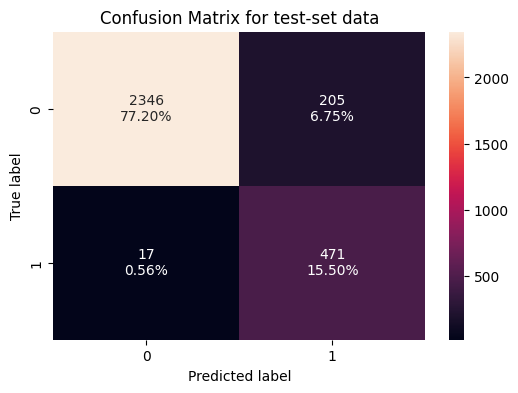

TP: 471
FN: 17
recall: 96.52%



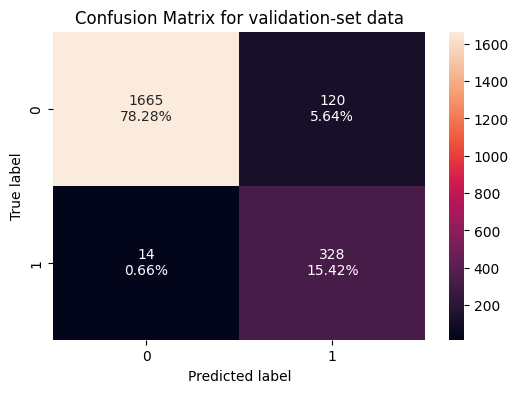

TP: 328
FN: 14
recall: 95.91%



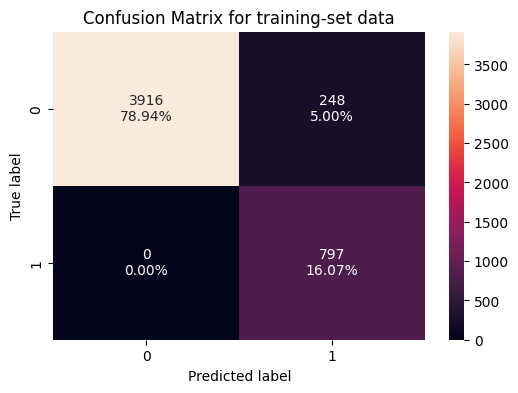

TP: 797
FN: 0
recall: 100.00%



In [91]:
confusion_matrix_sklearn(loaded_model, X_test, y_test, "test")
confusion_matrix_sklearn(loaded_model, X_val, y_val, "validation")
confusion_matrix_sklearn(loaded_model, X_train, y_train, "training")


#### Show Feature Importances for the chosen model

Feature  Importance
16            Total_Trans_Ct    0.305399
12       Total_Revolving_Bal    0.123213
8   Total_Relationship_Count    0.100352
15           Total_Trans_Amt    0.084617
17       Total_Ct_Chng_Q4_Q1    0.061134
9     Months_Inactive_12_mon    0.044484
10     Contacts_Count_12_mon    0.042670
14      Total_Amt_Chng_Q4_Q1    0.034151
11              Credit_Limit    0.033678
0               Customer_Age    0.032792
7             Months_on_book    0.026952
13           Avg_Open_To_Buy    0.022556
1                     Gender    0.019725
18     Avg_Utilization_Ratio    0.015902
3            Education_Level    0.014359
4             Marital_Status    0.013933
2            Dependent_count    0.009254
6              Card_Category    0.007436
5            Income_Category    0.007393

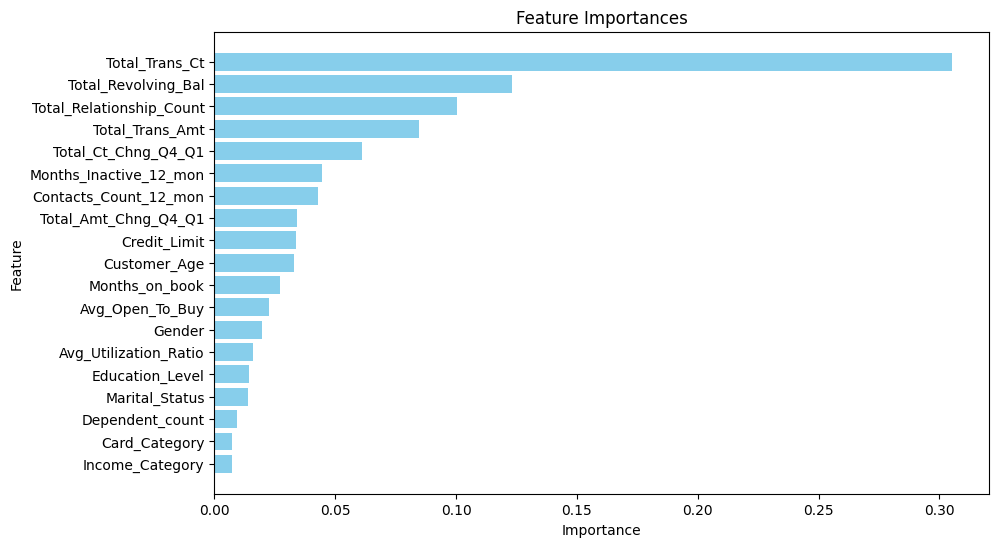

In [92]:
# Get feature importances from the model
feature_importances = loaded_model.feature_importances_

# Create a DataFrame for feature importances
feature_names = X_train.columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by feature importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
# Display the feature importances DataFrame
display(feature_importances_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

#### Use Shap to get more detailed analysis on imporances of a particular prediction

SHAP (SHapley Additive exPlanations) is a powerful tool designed to interpret and explain the predictions of machine learning models. It leverages concepts from cooperative game theory, particularly the Shapley values, to attribute the contribution of each feature to the final prediction in a fair and consistent manner. SHAP values provide a unified framework to explain the output of any machine learning model, making them invaluable for model interpretability and transparency.

In [93]:
!pip install -q shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.1 MB/s eta 0:00:00


#### Analyze one particular instance of Test Set prediction to see what it looks like

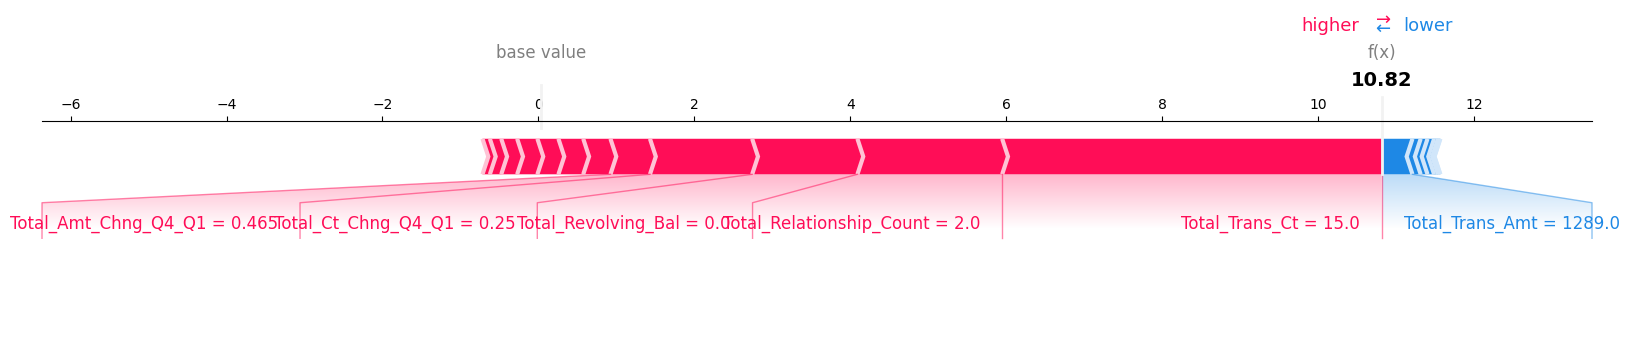

In [94]:
import shap
# Create a SHAP explainer and compute SHAP values
explainer = shap.TreeExplainer(loaded_model)
shap_values = explainer.shap_values(X_test)


for instance in range(1,3,2):
    shap.force_plot(explainer.expected_value, shap_values[instance], X_test.iloc[instance], matplotlib=True)




Explanation for **instance 2 of test set prediction**:
- The base value is the average prediction of the model if no features were considered. It serves as the starting point of the prediction. In this plot, the base value is around 0.
- The final prediction value of 10.82 ( for this instance of the prediction) is the result of the base value adjusted by the contributions of each feature. Note: 10.82 is raw logit
- The features Total_Amt_Chng_Q4_Q1, Total_Ct_Chng_Q4_Q1, Total_Revolving_Bal, - Total_Relationship_Count, and Total_Trans_Ct contribute positively, pushing the prediction higher.
- Total_Trans_Ct is wider than the others, so it contributes significantly to the overall prediction score
- The feature Total_Trans_Amt contributes negatively, slightly lowering the prediction.

### Note 10.82 is the raw logit output.  To convert to Sigmoid we would need to apply sigmoid function

The sigmoid function is defined as:

${\text{Sigmoid}}(x) = \frac{1}{1 + e^{-x}}$




In [95]:
from scipy.special import expit

# Raw model output (log-odds)
raw_output = 10.82

# Apply the sigmoid function to the raw output to get the probability
probability = expit(raw_output)

# Determine the predicted class using the round function
predicted_class = round(probability)

# Print the results
print(f"Raw output: {raw_output}")
print(f"Probability: {probability}")
print(f"Predicted Class: {predicted_class}")


Raw output: 10.82
Probability: 0.9999800048336349
Predicted Class: 1


#### Plot ROC/AUC Curve

- predict: Outputs the predicted class labels. (not used in this case)
- predict_proba: Outputs the probabilities for each class.
- The slicing [:, 1] is used to extract the probabilities of the positive class (class 1) from the output of the predict_proba method
- `roc curve (y_test, y_test_proba_post_pruning)` returns 3 arrays:
  - `fpr`: False positive rates at different thresholds.
  - `tpr`: True positive rates at different thresholds.
  - `thresholds`: Threshold values used to compute `fpr` and `tpr`
    - In our case, we don't really care about `thresholds`, so we use a `_` for that as a throwaway variable
- `plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')`: Explanation of the coordinates:
  - `[0, 1]` on the x-axis: Represents the range of FPR from 0 to 1.
  - `[0, 1]` on the y-axis: Represents the range of TPR from 0 to 1.    

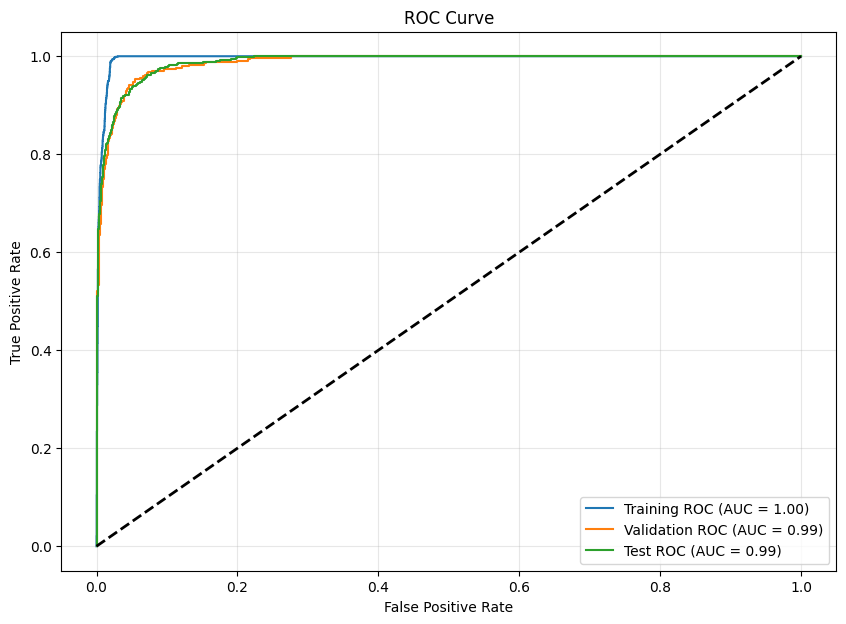

Training AUC: 0.9958
Validation AUC: 0.9874
Test AUC: 0.9884


In [96]:
from sklearn.metrics import roc_curve, auc


# Predict probabilities
y_train_proba = loaded_model.predict_proba(X_train)[:, 1]
y_val_proba = loaded_model.predict_proba(X_val)[:, 1]
y_test_proba = loaded_model.predict_proba(X_test)[:, 1]

# Calculate ROC curves
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

# Calculate AUC
auc_train = auc(fpr_train, tpr_train)
auc_val = auc(fpr_val, tpr_val)
auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr_train, tpr_train, label=f'Training ROC (AUC = {auc_train:.2f})')
plt.plot(fpr_val, tpr_val, label=f'Validation ROC (AUC = {auc_val:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# Print AUC values
print(f'Training AUC: {auc_train:.4f}')
print(f'Validation AUC: {auc_val:.4f}')
print(f'Test AUC: {auc_test:.4f}')

**Observations**

ROC Curves:
- Training ROC (Blue Curve): The ROC curve for the training set is almost perfect, indicating that the model performs extremely well on the training data.
- Validation ROC (Orange Curve): The ROC curve for the validation set is also very high, closely following the training ROC curve, which suggests that the model generalizes well to unseen data.
- Test ROC (Green Curve): The ROC curve for the test set follows the same pattern as the training and validation sets, indicating consistent performance across all datasets.

AUC Values:

- Training AUC (0.9958): The AUC value for the training set is almost 1, indicating near-perfect discrimination between the positive and negative classes.
- Validation AUC (0.9874): The AUC value for the validation set is slightly lower than the training set but still very high, suggesting that the model maintains excellent performance on unseen data.
- Test AUC (0.9884): The AUC value for the test set is also very high, confirming that the model performs consistently well on truly unseen data.

General Observations:

High Model Performance:

- The high AUC values across training, validation, and test sets indicate that the model has excellent discriminative power. This means the model is very effective at distinguishing between positive and negative classes (e.g., identifying customers likely to churn vs. those who won't, fraudulent vs. legitimate transactions, etc.).

Generalization:

- The close alignment of the ROC curves and high AUC values across all datasets (training, validation, test) suggest that the model generalizes well. This implies that the model is not overfitting and can be trusted to perform well on new, unseen data.

Concusion:

The ROC curve and AUC values demonstrate that the XGBoost model has excellent performance in distinguishing between positive and negative classes. The model generalizes well to unseen data, making it highly reliable for business applications such as customer retention, fraud detection, and quality control. This high level of performance ensures effective resource allocation and confident decision-making based on the model's predictions.

# Business Insights and Conclusions

1. Understanding Model Performance

- **Recall**

  - Training Recall (1.000): The model identifies all positive instances in the training set. This means no false negatives on the training data, suggesting it is very sensitive to identifying positive cases.
  - Validation Recall (0.956) and Test Recall (0.984): The model maintains high recall on unseen data (validation and test sets), indicating it generalizes well and misses few positive cases.

- **Precision**

  - Training Precision (0.763): Among all instances predicted as positive, 76.3% are actually positive. The model has a moderate level of precision on the training set.
  - Validation Precision (0.741) and Test Precision (0.715): Precision is slightly lower on validation and test sets, indicating some false positives, but it remains relatively high.

- **F1 Score**

  - Training F1 (0.866): The F1 score, which balances precision and recall, is high on the training set, indicating a good balance between these metrics.
  - Validation F1 (0.835) and Test F1 (0.828): The F1 scores on validation and test sets are slightly lower than the training set but still high, indicating the model performs well in balancing precision and recall on unseen data.

2. Business Insights

- **High Recall**

- Insight: The high recall values across training, validation, and test sets suggest the model is very effective at identifying positive cases (e.g., potential customers who are likely to churn, fraudulent transactions, or defective products).
- Business Value: For applications where missing a positive case is costly (e.g., missed fraud detection or churn prevention), this model provides significant value by minimizing false negatives.

- **Precision Considerations**

  - Insight: Precision is moderately high but lower than recall, indicating the model predicts some false positives.
  - Business Value: While the model is good at identifying most positives, some resources may be spent on false positives. In a churn prediction scenario, this might mean some non-churning customers are targeted with retention efforts. However, the balance still favors action since the cost of missing a positive is higher.

- **Balanced Performance (F1 Score)**

  - Insight: High F1 scores indicate the model achieves a good balance between precision and recall, making it reliable for business decisions.
  - Business Value: For scenarios requiring a balanced approach (e.g., customer retention campaigns, fraud detection), the model ensures a good trade-off between identifying positive cases and minimizing false alarms.

3. Strategic Recommendations

  - Prioritize Recall: Given the high recall, leverage this model in scenarios where identifying as many positive cases as possible is crucial, even at the expense of some false positives.
  - Refinement for Precision: Consider additional strategies to improve precision, such as post-model filtering or combining this model with additional checks to reduce false positives.
  - Resource Allocation: Allocate resources to handle the identified positive cases, knowing that while some false positives exist, the model’s effectiveness in catching positives outweighs this cost.
  - Continuous Monitoring: Regularly monitor model performance to ensure it continues to generalize well. Track recall, precision, and F1 scores over time to detect any performance drift.

4. Potential Use Cases

  - Customer Retention: Use the model to identify customers likely to churn and target them with retention campaigns. High recall ensures most potential churners are identified.
  - Fraud Detection: Apply the model in fraud detection systems where missing a fraudulent transaction is costly. High recall ensures most fraud cases are flagged.
  - Quality Control: In manufacturing, use the model to detect defective products. High recall minimizes the risk of defective products reaching customers.

**Conclusion**
The XGBoostUS model demonstrates strong performance in recall and a good balance with precision and F1 scores. These metrics suggest it is highly effective for business applications where identifying positive cases is critical. While some false positives are expected, the overall performance indicates substantial business value in scenarios like churn prediction, fraud detection, and quality control.







***

# Converting to html format for submission

In [97]:
%%shell
#convert to html
jupyter nbconvert V5-SM-AML_Project_LearnerNotebook_FullCode.ipynb --to html

[NbConvertApp] Converting notebook V5-SM-AML_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] Writing 6170937 bytes to V5-SM-AML_Project_LearnerNotebook_FullCode.html
